In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import ee
import geemap
Map= geemap.Map()

In [2]:
# Create a point geometry for the lake
import ee
import geemap 
ee.Initialize()
Map= geemap.Map()

# Set latitude and longitude values for specified SITE_ID ------------ AWI
latitude_AWI_BigMooseLake = 43.8349136
longitude_AWI_BigMooseLake = -74.8359591

# Set latitude and longitude values for specified SITE_ID ------------ ALTM 
latitude_ALTM_BigMooseLake = 43.819986046
longitude_ALTM_BigMooseLake = -74.85369

lake_point_AWI=  ee.Geometry.Point(longitude_AWI_BigMooseLake, latitude_AWI_BigMooseLake)
lake_point_ALTM=  ee.Geometry.Point(longitude_ALTM_BigMooseLake, latitude_ALTM_BigMooseLake)

lake_bbox_AWI = lake_point_AWI.buffer(100).bounds()
lake_bbox_ALTM = lake_point_ALTM.buffer(100).bounds()



Map.addLayer(lake_bbox_AWI)
Map.addLayer(lake_bbox_ALTM)

Map.centerObject(lake_point_AWI, 16)
Map.centerObject(lake_point_ALTM, 16)



Map

Map(center=[43.81998604599999, -74.85369], controls=(WidgetControl(options=['position', 'transparent_bg'], wid…

In [3]:
# Create a point geometry for the lake
import ee
import geemap 
ee.Initialize()
Map= geemap.Map()

# Set latitude and longitude values for specified SITE_ID ------------ AWI
latitude_AWI_MossLake = 43.7850205
longitude_AWI_MossLake = -74.8483467

	
# Set latitude and longitude values for specified SITE_ID ------------ ALTM 
latitude_ALTM_MossLake = 43.784041537077364
longitude_ALTM_MossLake = -74.85253910144142


lake_point_AWI_MossLake=  ee.Geometry.Point(longitude_AWI_MossLake, latitude_AWI_MossLake)
lake_point_ALTM_MossLake=  ee.Geometry.Point(longitude_ALTM_MossLake, latitude_ALTM_MossLake)

lake_bbox_AWI_MossLake = lake_point_AWI_MossLake.buffer(80).bounds()
lake_bbox_ALTM_MossLake = lake_point_ALTM_MossLake.buffer(80).bounds()



# Map.addLayer(lake_bbox_AWI_MossLake)
# Map.addLayer(lake_bbox_ALTM_MossLake)

Map.addLayer(lake_point_AWI_MossLake)
# Map.addLayer(lake_point_ALTM_MossLake)

Map.centerObject(lake_point_AWI_MossLake, 16)
# Map.centerObject(lake_point_ALTM_MossLake, 16)



Map

Map(center=[43.7850205, -74.8483467], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=S…

In [4]:
import pandas as pd

data_excel = pd.read_excel("LTM_Data_2023_3_9.xlsx", usecols=['DOC_MG_L', 'SITE_ID', 'DATE_SMP'])
data_excel_site = pd.read_excel("Site_Information_2022_8_1.xlsx", usecols=['SITE_ID', 'PROGRAM_ID', 'SITE_NAME','LAKE_DEPTH_MEAN'])

merged_data_excel = pd.merge(data_excel, data_excel_site, on=['SITE_ID'])
merged_data_excel



,SITE_ID,DATE_SMP,DOC_MG_L,PROGRAM_ID,SITE_NAME,LAKE_DEPTH_MEAN
0,040850,1997-09-22,3.100,LTM_ALTM,Squaw Lake,3.4
1,040850,1997-09-22,3.100,LTM_ME,Squaw Lake,3.4
2,040850,1995-03-02,3.031,LTM_ALTM,Squaw Lake,3.4
3,040850,1995-03-02,3.031,LTM_ME,Squaw Lake,3.4
4,040850,1996-08-19,3.595,LTM_ALTM,Squaw Lake,3.4
...,...,...,...,...,...,...
40963,VT53,1998-02-02,NaN,VTSSS,Twomile Run,NaN
40964,VT53,2017-07-25,1.180,VTSSS,Twomile Run,NaN
40965,VT53,2019-04-29,NaN,VTSSS,Twomile Run,NaN
40966,VT53,2019-07-26,NaN,VTSSS,Twomile Run,NaN


In [5]:
filtered_df = merged_data_excel[merged_data_excel['SITE_ID'].isin(['1A1-103', '1A1-109','1A1-106'])]
filtered_df= filtered_df[filtered_df['PROGRAM_ID'] == 'LTM_ALTM']
# Assuming 'DATE_SMP' is the name of the datetime column
filtered_df['DATE_SMP'] = pd.to_datetime(filtered_df['DATE_SMP'])

# Filter rows where 'DATE_SMP' is greater than a specific date in 2015
filtered_df = filtered_df[filtered_df['DATE_SMP'] > '2015-01-01']
filtered_df

,SITE_ID,DATE_SMP,DOC_MG_L,PROGRAM_ID,SITE_NAME,LAKE_DEPTH_MEAN
5709,1A1-103,2019-09-04,5.505700,LTM_ALTM,Big Moose Lake,6.8
5710,1A1-103,2021-05-04,6.989800,LTM_ALTM,Big Moose Lake,6.8
5721,1A1-103,2020-11-05,5.042800,LTM_ALTM,Big Moose Lake,6.8
5747,1A1-103,2017-09-07,6.113200,LTM_ALTM,Big Moose Lake,6.8
5748,1A1-103,2017-11-02,5.406800,LTM_ALTM,Big Moose Lake,6.8
...,...,...,...,...,...,...
7418,1A1-109,2015-11-04,3.735484,LTM_ALTM,Moss Lake,5.7
7419,1A1-109,2017-03-02,6.651700,LTM_ALTM,Moss Lake,5.7
7420,1A1-109,2017-07-19,5.105700,LTM_ALTM,Moss Lake,5.7
7421,1A1-109,2019-07-09,5.746200,LTM_ALTM,Moss Lake,5.7


In [6]:
AWI_ADK_Excel = pd.read_excel("AWI-ADK.xlsx", usecols=['AWI Site ID', 'AWI Waterbody ID', 'Waterbody Name', 'Sample Location',	'Latitude_AWI',	'Latitude_AWI', 'Parameter','Sample Date AWI','Reported Value','Units'])
AWI_ADK_Excel = AWI_ADK_Excel[AWI_ADK_Excel['Parameter'] == 'Dissolved Organic Carbon']
AWI_ADK_Excel.rename(columns={'AWI Waterbody ID': 'SITE_ID' }, inplace=True)
AWI_ADK_Excel.rename(columns={'Waterbody Name': 'SITE_NAME' }, inplace=True)
AWI_ADK_Excel.rename(columns={'Reported Value': 'DOC_MG_L'}, inplace=True)
AWI_ADK_Excel.rename(columns={'Sample Date AWI': 'DATE_SMP'}, inplace=True)
AWI_ADK_Excel

,AWI Site ID,SITE_ID,SITE_NAME,Sample Location,Latitude_AWI,DATE_SMP,Parameter,DOC_MG_L,Units
62,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,2017-06-21,Dissolved Organic Carbon,4.510,mg/L
65,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,2017-07-21,Dissolved Organic Carbon,6.060,mg/L
68,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,2017-08-03,Dissolved Organic Carbon,6.110,mg/L
71,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,2017-08-30,Dissolved Organic Carbon,5.970,mg/L
74,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,2017-09-27,Dissolved Organic Carbon,5.600,mg/L
...,...,...,...,...,...,...,...,...,...
8720,AWI00318.1,AWI00318,Green Lake,Deep Hole,43.175716,2022-07-20,Dissolved Organic Carbon,2.671,mg/L
8723,AWI00318.1,AWI00318,Green Lake,Deep Hole,43.175716,2022-08-15,Dissolved Organic Carbon,2.782,mg/L
8726,AWI00319.1,AWI00319,Ragged Lake,Main,44.718620,2022-08-12,Dissolved Organic Carbon,11.710,mg/L
8729,AWI00319.1,AWI00319,Ragged Lake,Main,44.718620,2022-09-17,Dissolved Organic Carbon,11.500,mg/L


In [7]:
filtered_df_AWI = AWI_ADK_Excel[AWI_ADK_Excel['SITE_ID'].isin(['AWI00063', 'AWI00065'])]
# Assuming 'DATE_SMP' is the name of the datetime column
filtered_df_AWI['DATE_SMP'] = pd.to_datetime(filtered_df_AWI['DATE_SMP'])

# Filter rows where 'DATE_SMP' is greater than a specific date in 2015
filtered_df_AWI = filtered_df_AWI[filtered_df_AWI['DATE_SMP'] > '2015-01-01']
filtered_df_AWI

,AWI Site ID,SITE_ID,SITE_NAME,Sample Location,Latitude_AWI,DATE_SMP,Parameter,DOC_MG_L,Units
4643,AWI00063.1,AWI00063,Big Moose Lake,Deep Hole,43.834914,2018-08-25,Dissolved Organic Carbon,3.970,mg/L
4646,AWI00063.1,AWI00063,Big Moose Lake,Deep Hole,43.834914,2019-07-27,Dissolved Organic Carbon,5.580,mg/L
4649,AWI00063.1,AWI00063,Big Moose Lake,Deep Hole,43.834914,2019-08-18,Dissolved Organic Carbon,4.620,mg/L
4652,AWI00063.1,AWI00063,Big Moose Lake,Deep Hole,43.834914,2019-09-16,Dissolved Organic Carbon,5.040,mg/L
4655,AWI00063.1,AWI00063,Big Moose Lake,Deep Hole,43.834914,2020-08-26,Dissolved Organic Carbon,4.940,mg/L
4658,AWI00063.1,AWI00063,Big Moose Lake,Deep Hole,43.834914,2021-06-12,Dissolved Organic Carbon,4.990,mg/L
4661,AWI00063.1,AWI00063,Big Moose Lake,Deep Hole,43.834914,2021-07-22,Dissolved Organic Carbon,6.050,mg/L
4664,AWI00063.1,AWI00063,Big Moose Lake,Deep Hole,43.834914,2021-08-22,Dissolved Organic Carbon,6.960,mg/L
4667,AWI00063.1,AWI00063,Big Moose Lake,Deep Hole,43.834914,2022-06-25,Dissolved Organic Carbon,5.806,mg/L
4670,AWI00063.1,AWI00063,Big Moose Lake,Deep Hole,43.834914,2022-07-24,Dissolved Organic Carbon,5.272,mg/L


In [8]:
ALTM_AWI_DATA = pd.concat([filtered_df, filtered_df_AWI], axis=0, ignore_index=True)

# Specify the columns to be removed
columns_to_remove = ['PROGRAM_ID',  'AWI Site ID','Sample Location', 'Latitude_AWI', 'Parameter',	'Units']

# Remove the specified columns
filtered_df_AWI_ALTM = ALTM_AWI_DATA.drop(columns=columns_to_remove)



filtered_df_AWI_ALTM

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN
0,1A1-103,2019-09-04,5.5057,Big Moose Lake,6.8
1,1A1-103,2021-05-04,6.9898,Big Moose Lake,6.8
2,1A1-103,2020-11-05,5.0428,Big Moose Lake,6.8
3,1A1-103,2017-09-07,6.1132,Big Moose Lake,6.8
4,1A1-103,2017-11-02,5.4068,Big Moose Lake,6.8
...,...,...,...,...,...
171,AWI00065,2019-08-20,4.2200,Moss Lake,NaN
172,AWI00065,2020-08-19,5.3700,Moss Lake,NaN
173,AWI00065,2022-06-27,4.5120,Moss Lake,NaN
174,AWI00065,2022-07-15,4.9250,Moss Lake,NaN


In [9]:
# Set latitude and longitude values for specified SITE_ID
latitude = 43.8349136
longitude = -74.8359591
SITE_ID = 'AWI00063'

# Update DataFrame with latitude and longitude values for SITE_ID
filtered_df_AWI_ALTM.loc[filtered_df_AWI_ALTM['SITE_ID'] == SITE_ID, 'LATITUDE'] = latitude
filtered_df_AWI_ALTM.loc[filtered_df_AWI_ALTM['SITE_ID'] == SITE_ID, 'LONGITUDE'] = longitude
filtered_df_AWI_ALTM

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,LATITUDE,LONGITUDE
0,1A1-103,2019-09-04,5.5057,Big Moose Lake,6.8,NaN,NaN
1,1A1-103,2021-05-04,6.9898,Big Moose Lake,6.8,NaN,NaN
2,1A1-103,2020-11-05,5.0428,Big Moose Lake,6.8,NaN,NaN
3,1A1-103,2017-09-07,6.1132,Big Moose Lake,6.8,NaN,NaN
4,1A1-103,2017-11-02,5.4068,Big Moose Lake,6.8,NaN,NaN
...,...,...,...,...,...,...,...
171,AWI00065,2019-08-20,4.2200,Moss Lake,NaN,NaN,NaN
172,AWI00065,2020-08-19,5.3700,Moss Lake,NaN,NaN,NaN
173,AWI00065,2022-06-27,4.5120,Moss Lake,NaN,NaN,NaN
174,AWI00065,2022-07-15,4.9250,Moss Lake,NaN,NaN,NaN


In [10]:
# Set latitude and longitude values for specified SITE_ID
latitude = 43.819986046
longitude = -74.85369
SITE_ID = '1A1-103'

# Update DataFrame with latitude and longitude values for SITE_ID
filtered_df_AWI_ALTM.loc[filtered_df_AWI_ALTM['SITE_ID'] == SITE_ID, 'LATITUDE'] = latitude
filtered_df_AWI_ALTM.loc[filtered_df_AWI_ALTM['SITE_ID'] == SITE_ID, 'LONGITUDE'] = longitude
filtered_df_AWI_ALTM.sort_values(by='DATE_SMP', inplace=True)
filtered_df_AWI_ALTM

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,LATITUDE,LONGITUDE
114,1A1-109,2015-01-05,5.071256,Moss Lake,5.7,NaN,NaN
21,1A1-103,2015-01-05,6.579407,Big Moose Lake,6.8,43.819986,-74.853690
99,1A1-109,2015-02-04,4.397457,Moss Lake,5.7,NaN,NaN
17,1A1-103,2015-02-04,6.327517,Big Moose Lake,6.8,43.819986,-74.853690
75,1A1-106,2015-02-11,6.636604,Dart Lake,7.3,NaN,NaN
...,...,...,...,...,...,...,...
173,AWI00065,2022-06-27,4.512000,Moss Lake,NaN,NaN,NaN
174,AWI00065,2022-07-15,4.925000,Moss Lake,NaN,NaN,NaN
166,AWI00063,2022-07-24,5.272000,Big Moose Lake,NaN,43.834914,-74.835959
175,AWI00065,2022-08-13,4.986000,Moss Lake,NaN,NaN,NaN


In [11]:
# Set latitude and longitude values for specified SITE_ID
latitude = 43.7850205
longitude = -74.8483467
SITE_ID = 'AWI00065'

# Update DataFrame with latitude and longitude values for SITE_ID
filtered_df_AWI_ALTM.loc[filtered_df_AWI_ALTM['SITE_ID'] == SITE_ID, 'LATITUDE'] = latitude
filtered_df_AWI_ALTM.loc[filtered_df_AWI_ALTM['SITE_ID'] == SITE_ID, 'LONGITUDE'] = longitude
filtered_df_AWI_ALTM

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,LATITUDE,LONGITUDE
114,1A1-109,2015-01-05,5.071256,Moss Lake,5.7,NaN,NaN
21,1A1-103,2015-01-05,6.579407,Big Moose Lake,6.8,43.819986,-74.853690
99,1A1-109,2015-02-04,4.397457,Moss Lake,5.7,NaN,NaN
17,1A1-103,2015-02-04,6.327517,Big Moose Lake,6.8,43.819986,-74.853690
75,1A1-106,2015-02-11,6.636604,Dart Lake,7.3,NaN,NaN
...,...,...,...,...,...,...,...
173,AWI00065,2022-06-27,4.512000,Moss Lake,NaN,43.785021,-74.848347
174,AWI00065,2022-07-15,4.925000,Moss Lake,NaN,43.785021,-74.848347
166,AWI00063,2022-07-24,5.272000,Big Moose Lake,NaN,43.834914,-74.835959
175,AWI00065,2022-08-13,4.986000,Moss Lake,NaN,43.785021,-74.848347


In [12]:
# Set latitude and longitude values for specified SITE_ID
latitude = 43.784041537077364
longitude = -74.85253910144142
SITE_ID = '1A1-109'

# Update DataFrame with latitude and longitude values for SITE_ID
filtered_df_AWI_ALTM.loc[filtered_df_AWI_ALTM['SITE_ID'] == SITE_ID, 'LATITUDE'] = latitude
filtered_df_AWI_ALTM.loc[filtered_df_AWI_ALTM['SITE_ID'] == SITE_ID, 'LONGITUDE'] = longitude
filtered_df_AWI_ALTM.sort_values(by='DATE_SMP', inplace=True)
filtered_df_AWI_ALTM

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,LATITUDE,LONGITUDE
114,1A1-109,2015-01-05,5.071256,Moss Lake,5.7,43.784042,-74.852539
21,1A1-103,2015-01-05,6.579407,Big Moose Lake,6.8,43.819986,-74.853690
99,1A1-109,2015-02-04,4.397457,Moss Lake,5.7,43.784042,-74.852539
17,1A1-103,2015-02-04,6.327517,Big Moose Lake,6.8,43.819986,-74.853690
75,1A1-106,2015-02-11,6.636604,Dart Lake,7.3,NaN,NaN
...,...,...,...,...,...,...,...
173,AWI00065,2022-06-27,4.512000,Moss Lake,NaN,43.785021,-74.848347
174,AWI00065,2022-07-15,4.925000,Moss Lake,NaN,43.785021,-74.848347
166,AWI00063,2022-07-24,5.272000,Big Moose Lake,NaN,43.834914,-74.835959
175,AWI00065,2022-08-13,4.986000,Moss Lake,NaN,43.785021,-74.848347


In [13]:
latitude = 43.79548
longitude = -74.86409
SITE_ID = '1A1-106'

# Update DataFrame with latitude and longitude values for SITE_ID
filtered_df_AWI_ALTM.loc[filtered_df_AWI_ALTM['SITE_ID'] == SITE_ID, 'LATITUDE'] = latitude
filtered_df_AWI_ALTM.loc[filtered_df_AWI_ALTM['SITE_ID'] == SITE_ID, 'LONGITUDE'] = longitude
filtered_df_AWI_ALTM.sort_values(by='DATE_SMP', inplace=True)
filtered_df_AWI_ALTM

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,LATITUDE,LONGITUDE
114,1A1-109,2015-01-05,5.071256,Moss Lake,5.7,43.784042,-74.852539
21,1A1-103,2015-01-05,6.579407,Big Moose Lake,6.8,43.819986,-74.853690
99,1A1-109,2015-02-04,4.397457,Moss Lake,5.7,43.784042,-74.852539
17,1A1-103,2015-02-04,6.327517,Big Moose Lake,6.8,43.819986,-74.853690
75,1A1-106,2015-02-11,6.636604,Dart Lake,7.3,43.795480,-74.864090
...,...,...,...,...,...,...,...
173,AWI00065,2022-06-27,4.512000,Moss Lake,NaN,43.785021,-74.848347
174,AWI00065,2022-07-15,4.925000,Moss Lake,NaN,43.785021,-74.848347
166,AWI00063,2022-07-24,5.272000,Big Moose Lake,NaN,43.834914,-74.835959
175,AWI00065,2022-08-13,4.986000,Moss Lake,NaN,43.785021,-74.848347


In [14]:
LAKE_DEPTH_MEAN = 15
SITE_ID = 'AWI00065'

# Update DataFrame with latitude and longitude values for SITE_ID
filtered_df_AWI_ALTM.loc[filtered_df_AWI_ALTM['SITE_ID'] == SITE_ID, 'LAKE_DEPTH_MEAN'] = LAKE_DEPTH_MEAN
filtered_df_AWI_ALTM.sort_values(by='DATE_SMP', inplace=True)
filtered_df_AWI_ALTM

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,LATITUDE,LONGITUDE
114,1A1-109,2015-01-05,5.071256,Moss Lake,5.7,43.784042,-74.852539
21,1A1-103,2015-01-05,6.579407,Big Moose Lake,6.8,43.819986,-74.853690
99,1A1-109,2015-02-04,4.397457,Moss Lake,5.7,43.784042,-74.852539
17,1A1-103,2015-02-04,6.327517,Big Moose Lake,6.8,43.819986,-74.853690
75,1A1-106,2015-02-11,6.636604,Dart Lake,7.3,43.795480,-74.864090
...,...,...,...,...,...,...,...
173,AWI00065,2022-06-27,4.512000,Moss Lake,15.0,43.785021,-74.848347
174,AWI00065,2022-07-15,4.925000,Moss Lake,15.0,43.785021,-74.848347
166,AWI00063,2022-07-24,5.272000,Big Moose Lake,NaN,43.834914,-74.835959
175,AWI00065,2022-08-13,4.986000,Moss Lake,15.0,43.785021,-74.848347


In [15]:
LAKE_DEPTH_MEAN = 24.5
SITE_ID = 'AWI00063'

# Update DataFrame with latitude and longitude values for SITE_ID
filtered_df_AWI_ALTM.loc[filtered_df_AWI_ALTM['SITE_ID'] == SITE_ID, 'LAKE_DEPTH_MEAN'] = LAKE_DEPTH_MEAN
filtered_df_AWI_ALTM.sort_values(by='DATE_SMP', inplace=True)
filtered_df_AWI_ALTM

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,LATITUDE,LONGITUDE
114,1A1-109,2015-01-05,5.071256,Moss Lake,5.7,43.784042,-74.852539
21,1A1-103,2015-01-05,6.579407,Big Moose Lake,6.8,43.819986,-74.853690
99,1A1-109,2015-02-04,4.397457,Moss Lake,5.7,43.784042,-74.852539
17,1A1-103,2015-02-04,6.327517,Big Moose Lake,6.8,43.819986,-74.853690
75,1A1-106,2015-02-11,6.636604,Dart Lake,7.3,43.795480,-74.864090
...,...,...,...,...,...,...,...
173,AWI00065,2022-06-27,4.512000,Moss Lake,15.0,43.785021,-74.848347
174,AWI00065,2022-07-15,4.925000,Moss Lake,15.0,43.785021,-74.848347
166,AWI00063,2022-07-24,5.272000,Big Moose Lake,24.5,43.834914,-74.835959
175,AWI00065,2022-08-13,4.986000,Moss Lake,15.0,43.785021,-74.848347


In [16]:
import ee
import geemap
import pandas as pd

ee.Authenticate()

# Initialize Earth Engine
ee.Initialize()

Map = geemap.Map()

S2_BANDS = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B11', 'B12', 'QA60']
STD_NAMES = ['Aerosols', 'Blue', 'Green', 'Red',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR', 'SWIR1',
            'SWIR2', 'Cloudmask']

# Define the function to mask clouds and cloud shadows from Sentinel-2 imagery
def maskS2clouds(image):
    qa = image.select('QA60')
    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11

    # Create the cloud mask
    cloudMask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))

    # Apply the cloud mask to the image
    maskedImage = image.updateMask(cloudMask)

    return maskedImage

# Define the function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=20).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# Loop through each lake in the DataFrame
for index, row in filtered_df_AWI_ALTM.iterrows():
    # Extract lake information
    pondId = row['SITE_ID']
    pondname = row['SITE_NAME']
    date = row['DATE_SMP']
    doc = row['DOC_MG_L']
    
    LAKE_DEPTH_MEAN = row['LAKE_DEPTH_MEAN']
 
    # Create a 2-day window around the current date
    date_window_start = date - pd.Timedelta(days=3)
    date_window_end = date + pd.Timedelta(days=3)

    # print(date_window_start)
    # print(date_window_end)

    # Create a point geometry for the lake
    lake_point = ee.Geometry.Point(row['LONGITUDE'], row['LATITUDE'])

    # Create a 100-meter buffered box around the lake point
    lake_bbox = lake_point.buffer(80)

    # Retrieve Sentinel-2 images within the bounding box and filter by date
    s2 = ee.ImageCollection("COPERNICUS/S2") \
        .filterBounds(lake_bbox) \
        .filter(ee.Filter.calendarRange(2015, 2024, 'year')) \
        .filter(ee.Filter.calendarRange(4, 12, 'month')) \
        .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 50)) \
        .filterDate(date_window_start, date_window_end) \
        .map(maskS2clouds) \
        .select(S2_BANDS, STD_NAMES)

    # Map the reflectance function over the Sentinel-2 ImageCollection
    map_reflectance = s2.map(lambda img: reflectance(img, lake_bbox))

    # Resample the image to 20 meters
    map_resampled = map_reflectance.map(lambda img: img.reproject(crs=img.projection(), scale=20))

    # Reduce the mapped image collection to get reflectance values for the lake
    list_reflectance = map_resampled.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v/10000 for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)
    


    # Add lake information to DataFrame
    df_reflectance['SITE_ID'] = pondId
    df_reflectance['SITE_NAME'] = pondname
    df_reflectance['DOC_MG_L'] = doc
    df_reflectance['DATE'] = date
    df_reflectance['LAKE_DEPTH_MEAN'] = LAKE_DEPTH_MEAN

    # Add the DataFrame to the list
    dfs.append(df_reflectance)

# Concatenate all DataFrames into a single DataFrame
df_BIG_MOSS_lakes_ALTM_AWI = pd.concat(dfs, ignore_index=True)


# S2_BANDS = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B11', 'B12', 'QA60']
# STD_NAMES = ['Aerosols', 'Blue', 'Green', 'Red',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR', 'SWIR1',
#             'SWIR2', 'Cloudmask']

df_BIG_MOSS_lakes_ALTM_AWI['DOC_Formula_input1'] = df_BIG_MOSS_lakes_ALTM_AWI['RedEdge2'] - df_BIG_MOSS_lakes_ALTM_AWI['RedEdge3']
df_BIG_MOSS_lakes_ALTM_AWI['DOC_Formula_input2'] = df_BIG_MOSS_lakes_ALTM_AWI['RedEdge2'] / df_BIG_MOSS_lakes_ALTM_AWI['RedEdge3']
df_BIG_MOSS_lakes_ALTM_AWI['DOC_Formula_input3'] = (df_BIG_MOSS_lakes_ALTM_AWI['RedEdge3'] - df_BIG_MOSS_lakes_ALTM_AWI['RedEdge2']) / (df_BIG_MOSS_lakes_ALTM_AWI['RedEdge2'] + df_BIG_MOSS_lakes_ALTM_AWI['RedEdge3'])
df_BIG_MOSS_lakes_ALTM_AWI['DOC_Formula_input4'] = df_BIG_MOSS_lakes_ALTM_AWI['Aerosols'] * ((1 / df_BIG_MOSS_lakes_ALTM_AWI['RedEdge3']) - (1 / df_BIG_MOSS_lakes_ALTM_AWI['RedEdge2']))

# Calculate the minimum value within the visible and near-infrared bands
df_BIG_MOSS_lakes_ALTM_AWI['min_vis_nir'] = df_BIG_MOSS_lakes_ALTM_AWI[['Blue', 'Green', 'Red', 'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR']].min(axis=1)

# Subtract the minimum value from Band 11
df_BIG_MOSS_lakes_ALTM_AWI['shortwave_infrared_adjusted'] = df_BIG_MOSS_lakes_ALTM_AWI['SWIR1'] - df_BIG_MOSS_lakes_ALTM_AWI['min_vis_nir']

df_BIG_MOSS_lakes_ALTM_AWI['shortwave_infrared_adjusted'] /= np.pi

# Drop the intermediate column 'min_vis_nir' if needed
df_BIG_MOSS_lakes_ALTM_AWI.drop(columns=['min_vis_nir'], inplace=True)


# Sort the DataFrame by 'DATE_SMP' in ascending order
df_BIG_MOSS_lakes_ALTM_AWI.sort_values(by='DATE_SMP', inplace=True)

# Display the DataFrame
df_BIG_MOSS_lakes_ALTM_AWI

,DATE_SMP,reflectance,SITE_ID,SITE_NAME,DOC_MG_L,DATE,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,...,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2,DOC_Formula_input1,DOC_Formula_input2,DOC_Formula_input3,DOC_Formula_input4,shortwave_infrared_adjusted
0,2017-07-30,NaN,1A1-103,Big Moose Lake,6.117400,2017-08-02,6.8,0.104340,0.073986,0.0,...,0.030190,0.033679,0.034309,0.014992,0.010288,-0.000631,0.981611,0.009280,-0.056971,-0.004838
1,2017-08-04,NaN,1A1-103,Big Moose Lake,6.117400,2017-08-02,6.8,0.166181,0.115279,0.0,...,0.064974,0.085232,0.100016,0.048381,0.040542,-0.014784,0.852185,0.079806,-0.288200,-0.004692
2,2017-10-03,NaN,1A1-109,Moss Lake,4.544700,2017-10-04,5.7,0.107261,0.072062,0.0,...,0.023873,0.025914,0.026538,0.008374,0.004578,-0.000624,0.976481,0.011900,-0.097351,-0.004490
3,2018-05-01,NaN,1A1-109,Moss Lake,4.696000,2018-05-02,5.7,0.232080,0.213861,0.0,...,0.178573,0.150652,0.136254,0.027898,0.020646,0.014398,1.105671,-0.050184,0.162785,-0.028362
4,2018-05-01,NaN,1A1-103,Big Moose Lake,6.637400,2018-05-02,6.8,0.275463,0.262460,0.0,...,0.226914,0.192381,0.173441,0.022142,0.016198,0.018940,1.109202,-0.051774,0.156362,-0.040444
5,2018-07-10,NaN,1A1-106,Dart Lake,4.748500,2018-07-10,7.3,0.117350,0.083353,0.0,...,0.035410,0.048871,0.052440,0.016848,0.012359,-0.003569,0.931946,0.035225,-0.163412,-0.005908
6,2018-07-10,NaN,1A1-106,Dart Lake,4.826500,2018-07-12,7.3,0.117350,0.083353,0.0,...,0.035410,0.048871,0.052440,0.016848,0.012359,-0.003569,0.931946,0.035225,-0.163412,-0.005908
7,2018-08-24,NaN,AWI00063,Big Moose Lake,3.970000,2018-08-25,24.5,0.123650,0.089056,0.0,...,0.036952,0.046888,0.050004,0.009385,0.004401,-0.003116,0.937688,0.032158,-0.164325,-0.008775
10,2018-09-18,NaN,1A1-103,Big Moose Lake,4.428200,2018-09-18,6.8,0.154041,0.112095,0.0,...,0.047492,0.052081,0.054702,0.019869,0.013117,-0.002621,0.952081,0.024548,-0.141731,-0.008260
8,2018-09-18,NaN,1A1-106,Dart Lake,4.045100,2018-09-18,7.3,0.149953,0.108477,0.0,...,0.050095,0.065218,0.071111,0.029973,0.018195,-0.005893,0.917136,0.043223,-0.190525,-0.006405


In [17]:
df_BIG_MOSS_lakes_ALTM_AWI = df_BIG_MOSS_lakes_ALTM_AWI.drop(columns=['reflectance'], axis=1)
df_BIG_MOSS_lakes_ALTM_AWI.dropna(inplace=True)

df_BIG_MOSS_lakes_ALTM_AWI

,DATE_SMP,SITE_ID,SITE_NAME,DOC_MG_L,DATE,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,Green,...,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2,DOC_Formula_input1,DOC_Formula_input2,DOC_Formula_input3,DOC_Formula_input4,shortwave_infrared_adjusted
0,2017-07-30,1A1-103,Big Moose Lake,6.117400,2017-08-02,6.8,0.104340,0.073986,0.0,0.049407,...,0.030190,0.033679,0.034309,0.014992,0.010288,-0.000631,0.981611,0.009280,-0.056971,-0.004838
1,2017-08-04,1A1-103,Big Moose Lake,6.117400,2017-08-02,6.8,0.166181,0.115279,0.0,0.085413,...,0.064974,0.085232,0.100016,0.048381,0.040542,-0.014784,0.852185,0.079806,-0.288200,-0.004692
2,2017-10-03,1A1-109,Moss Lake,4.544700,2017-10-04,5.7,0.107261,0.072062,0.0,0.045155,...,0.023873,0.025914,0.026538,0.008374,0.004578,-0.000624,0.976481,0.011900,-0.097351,-0.004490
3,2018-05-01,1A1-109,Moss Lake,4.696000,2018-05-02,5.7,0.232080,0.213861,0.0,0.194193,...,0.178573,0.150652,0.136254,0.027898,0.020646,0.014398,1.105671,-0.050184,0.162785,-0.028362
4,2018-05-01,1A1-103,Big Moose Lake,6.637400,2018-05-02,6.8,0.275463,0.262460,0.0,0.243358,...,0.226914,0.192381,0.173441,0.022142,0.016198,0.018940,1.109202,-0.051774,0.156362,-0.040444
5,2018-07-10,1A1-106,Dart Lake,4.748500,2018-07-10,7.3,0.117350,0.083353,0.0,0.057276,...,0.035410,0.048871,0.052440,0.016848,0.012359,-0.003569,0.931946,0.035225,-0.163412,-0.005908
6,2018-07-10,1A1-106,Dart Lake,4.826500,2018-07-12,7.3,0.117350,0.083353,0.0,0.057276,...,0.035410,0.048871,0.052440,0.016848,0.012359,-0.003569,0.931946,0.035225,-0.163412,-0.005908
7,2018-08-24,AWI00063,Big Moose Lake,3.970000,2018-08-25,24.5,0.123650,0.089056,0.0,0.060929,...,0.036952,0.046888,0.050004,0.009385,0.004401,-0.003116,0.937688,0.032158,-0.164325,-0.008775
10,2018-09-18,1A1-103,Big Moose Lake,4.428200,2018-09-18,6.8,0.154041,0.112095,0.0,0.077893,...,0.047492,0.052081,0.054702,0.019869,0.013117,-0.002621,0.952081,0.024548,-0.141731,-0.008260
8,2018-09-18,1A1-106,Dart Lake,4.045100,2018-09-18,7.3,0.149953,0.108477,0.0,0.076219,...,0.050095,0.065218,0.071111,0.029973,0.018195,-0.005893,0.917136,0.043223,-0.190525,-0.006405


In [18]:
import pandas as pd

filtered_bigMooseTwo = df_BIG_MOSS_lakes_ALTM_AWI[df_BIG_MOSS_lakes_ALTM_AWI['SITE_NAME'] == 'Big Moose Lake']
filtered_bigMooseTwo['DATE_SMP'] = pd.to_datetime(filtered_bigMooseTwo['DATE_SMP'])
filtered_bigMooseTwo = filtered_bigMooseTwo[(filtered_bigMooseTwo['DATE_SMP'] >= '2020-08-23') & (filtered_bigMooseTwo['DATE_SMP'] <= '2020-11-06')]

filtered_bigMooseTwo



,DATE_SMP,SITE_ID,SITE_NAME,DOC_MG_L,DATE,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,Green,...,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2,DOC_Formula_input1,DOC_Formula_input2,DOC_Formula_input3,DOC_Formula_input4,shortwave_infrared_adjusted
26,2020-08-23,AWI00063,Big Moose Lake,4.9400,2020-08-26,24.5,0.108020,0.074112,0.0,0.048241,...,0.025463,0.029394,0.030652,0.006034,0.002939,-0.001258,0.958957,0.020951,-0.150831,-0.005906
29,2020-11-06,1A1-103,Big Moose Lake,5.0428,2020-11-05,6.8,0.139684,0.100753,0.0,0.066875,...,0.043118,0.042522,0.041253,0.018037,0.012515,0.001269,1.030772,-0.015153,0.101084,-0.006029


In [19]:
# Get the index of the first row
first_index = filtered_bigMooseTwo.index[0]

# Add 0.009 to all bands for the first row
filtered_bigMooseTwo.loc[first_index, 'Aerosols':] += 0.009576
filtered_bigMooseTwo

,DATE_SMP,SITE_ID,SITE_NAME,DOC_MG_L,DATE,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,Green,...,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2,DOC_Formula_input1,DOC_Formula_input2,DOC_Formula_input3,DOC_Formula_input4,shortwave_infrared_adjusted
26,2020-08-23,AWI00063,Big Moose Lake,4.9400,2020-08-26,24.5,0.117596,0.083688,0.009576,0.057817,...,0.035039,0.038970,0.040228,0.015610,0.012515,0.008318,0.968533,0.030527,-0.141255,0.003670
29,2020-11-06,1A1-103,Big Moose Lake,5.0428,2020-11-05,6.8,0.139684,0.100753,0.000000,0.066875,...,0.043118,0.042522,0.041253,0.018037,0.012515,0.001269,1.030772,-0.015153,0.101084,-0.006029


In [41]:
import pandas as pd

# Assuming df_BIG_MOSS_lakes_ALTM_AWI is your DataFrame

filtered_bigMooseTwo = df_BIG_MOSS_lakes_ALTM_AWI[df_BIG_MOSS_lakes_ALTM_AWI['SITE_NAME'] == 'Big Moose Lake']
filtered_bigMooseTwo['DATE_SMP'] = pd.to_datetime(filtered_bigMooseTwo['DATE_SMP'])
filtered_bigMooseTwo = filtered_bigMooseTwo[(filtered_bigMooseTwo['DATE_SMP'] >= '2020-08-23') & (filtered_bigMooseTwo['DATE_SMP'] <= '2020-11-06')]

# Get the values of the first row
first_row_values = filtered_bigMooseTwo.iloc[0].copy()

# Add 0.009 to all bands for the new row
new_row_values = first_row_values['Aerosols':] + 0.009

# Create a new row with the modified values
new_row = pd.DataFrame([new_row_values], columns=filtered_bigMooseTwo.columns)

# Concatenate the original DataFrame with the new row DataFrame
filtered_bigMooseTwo = pd.concat([filtered_bigMooseTwo, new_row], ignore_index=True)
filtered_bigMooseTwo
# Now, the DataFrame has a new row with 0.009 added to all bands


,DATE_SMP,SITE_ID,SITE_NAME,DOC_MG_L,DATE,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,Green,...,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2,DOC_Formula_input1,DOC_Formula_input2,DOC_Formula_input3,DOC_Formula_input4,shortwave_infrared_adjusted
0,2020-08-23,AWI00063,Big Moose Lake,4.9400,2020-08-26,24.5,0.108020,0.074112,0.000,0.048241,...,0.025463,0.029394,0.030652,0.006034,0.002939,-0.001258,0.958957,0.020951,-0.150831,-0.005906
1,2020-11-06,1A1-103,Big Moose Lake,5.0428,2020-11-05,6.8,0.139684,0.100753,0.000,0.066875,...,0.043118,0.042522,0.041253,0.018037,0.012515,0.001269,1.030772,-0.015153,0.101084,-0.006029
2,NaT,NaN,NaN,NaN,NaT,NaN,0.117020,0.083112,0.009,0.057241,...,0.034463,0.038394,0.039652,0.015034,0.011939,0.007742,0.967957,0.029951,-0.141831,0.003094


In [44]:
import pandas as pd

# Assuming df_BIG_MOSS_lakes_ALTM_AWI is your DataFrame
filtered_bigMooseTwo = df_BIG_MOSS_lakes_ALTM_AWI[df_BIG_MOSS_lakes_ALTM_AWI['SITE_NAME'] == 'Big Moose Lake']
filtered_bigMooseTwo['DATE_SMP'] = pd.to_datetime(filtered_bigMooseTwo['DATE_SMP'])
filtered_bigMooseTwo = filtered_bigMooseTwo[(filtered_bigMooseTwo['DATE_SMP'] >= '2020-08-23') & (filtered_bigMooseTwo['DATE_SMP'] <= '2020-11-06')]

# Define the new values for the first row
new_values = {
    'DATE_SMP': '2020-08-23',
    'SITE_ID': 'AWI00063',
    'SITE_NAME': 'Big Moose Lake',
    'DOC_MG_L': 4.94,
    'DATE': '2020-08-26',
    'LAKE_DEPTH_MEAN': 24.5,
  
}

# Update the values of the first row with the new values
filtered_bigMooseTwo.loc[filtered_bigMooseTwo.index[0]] = new_values

# Now, the first row has been replaced with the new values
filtered_bigMooseTwo

,DATE_SMP,SITE_ID,SITE_NAME,DOC_MG_L,DATE,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,Green,...,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2,DOC_Formula_input1,DOC_Formula_input2,DOC_Formula_input3,DOC_Formula_input4,shortwave_infrared_adjusted
26,2020-08-23,AWI00063,Big Moose Lake,4.9400,2020-08-26,24.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,2020-11-06,1A1-103,Big Moose Lake,5.0428,2020-11-05,6.8,0.139684,0.100753,0.0,0.066875,...,0.043118,0.042522,0.041253,0.018037,0.012515,0.001269,1.030772,-0.015153,0.101084,-0.006029


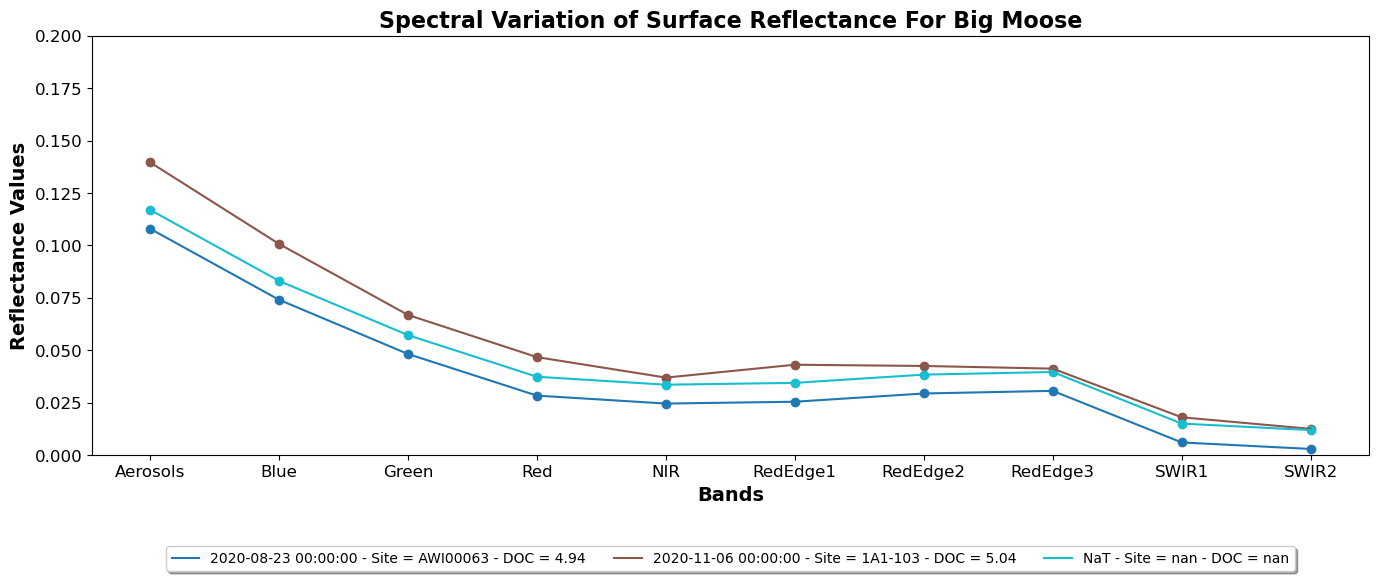

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Select the columns for bands and corresponding reflectance values
bands = ['Aerosols', 'Blue', 'Green', 'Red', 'NIR',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'SWIR1', 'SWIR2']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Define a color palette for the lines
color_palette = plt.cm.tab10(np.linspace(0, 1, len(filtered_bigMooseTwo)))

# Iterate over each row in the DataFrame
for i, (index, row) in enumerate(filtered_bigMooseTwo.iterrows()):
    # Extract the reflectance values for the current row
    reflectance_values = row[bands].values
    
    # Format the legend label including date, siteID, and DOC_MG_L value
    legend_label = f'{row["DATE_SMP"]} - Site = {row["SITE_ID"]} - DOC = {row["DOC_MG_L"]:.2f}'
    
    
    # Plot the reflectance values for the current row as a single line
    ax.plot(reflectance_values, color=color_palette[i], linestyle='-', label=legend_label)  # Format DOC to 2 decimal places
    
    # Plot scatter points for the reflectance values
    ax.scatter(range(len(bands)), reflectance_values, color=color_palette[i], marker='o')

# Set labels and title with increased fontsize
ax.set_xlabel('Bands', fontsize=14, fontweight='bold')
ax.set_ylabel('Reflectance Values', fontsize=14, fontweight='bold')
ax.set_title('Spectral Variation of Surface Reflectance For Big Moose', fontsize=16, fontweight='bold')

# Define custom labels for bands
custom_band_labels = ['Aerosols', 'Blue', 'Green', 'Red', 'NIR',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'SWIR1', 'SWIR2']

# Set x-axis ticks and labels to use custom band labels
ax.set_xticks(range(len(bands)))
ax.set_xticklabels(custom_band_labels)

# Increase fontsize for tick labels
ax.tick_params(axis='both', which='major', labelsize=12)


# Show the legend for lines below x-axis
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=3)

# Show the plot
plt.tight_layout()
plt.ylim(0, 0.2)
plt.show()


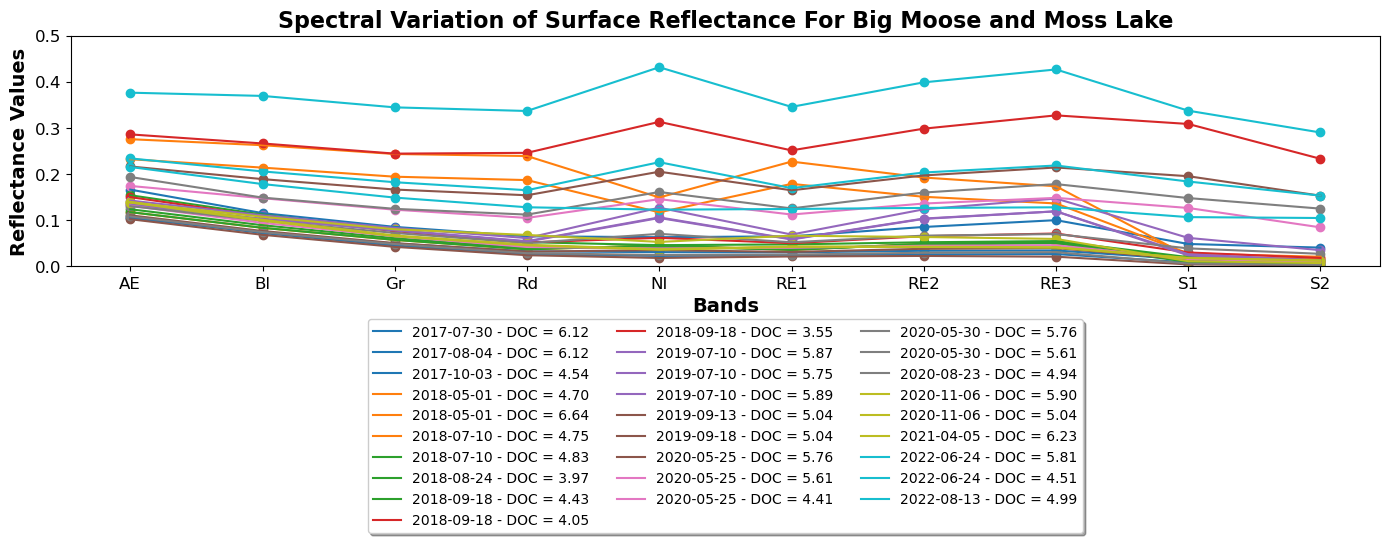

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Select the columns for bands and corresponding reflectance values
bands = ['Aerosols', 'Blue', 'Green', 'Red', 'NIR',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'SWIR1', 'SWIR2']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Define a color palette for the lines
color_palette = plt.cm.tab10(np.linspace(0, 1, len(df_BIG_MOSS_lakes_ALTM_AWI)))

# Iterate over each row in the DataFrame
for i, (index, row) in enumerate(df_BIG_MOSS_lakes_ALTM_AWI.iterrows()):
    # Extract the reflectance values for the current row
    reflectance_values = row[bands].values
    
    # Format the legend label including date, siteID, and DOC_MG_L value
    legend_label = f'{row["DATE_SMP"]} - DOC = {row["DOC_MG_L"]:.2f}'
    
    # Plot the reflectance values for the current row as a single line
    ax.plot(reflectance_values, color=color_palette[i], linestyle='-', label=legend_label)  # Format DOC to 2 decimal places
    
    # Plot scatter points for the reflectance values
    ax.scatter(range(len(bands)), reflectance_values, color=color_palette[i], marker='o')

# Set labels and title with increased fontsize
ax.set_xlabel('Bands', fontsize=14, fontweight='bold')
ax.set_ylabel('Reflectance Values', fontsize=14, fontweight='bold')
ax.set_title('Spectral Variation of Surface Reflectance For Big Moose and Moss Lake', fontsize=16, fontweight='bold')

# Define custom labels for bands
custom_band_labels = ['AE', 'Bl', 'Gr', 'Rd', 'NI', 'RE1', 'RE2', 'RE3', 'S1', 'S2']

# Set x-axis ticks and labels to use custom band labels
ax.set_xticks(range(len(bands)))
ax.set_xticklabels(custom_band_labels)

# Increase fontsize for tick labels
ax.tick_params(axis='both', which='major', labelsize=12)


# Show the legend for lines below x-axis
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=3)

# Show the plot
plt.tight_layout()
plt.ylim(0, 0.5)
plt.show()


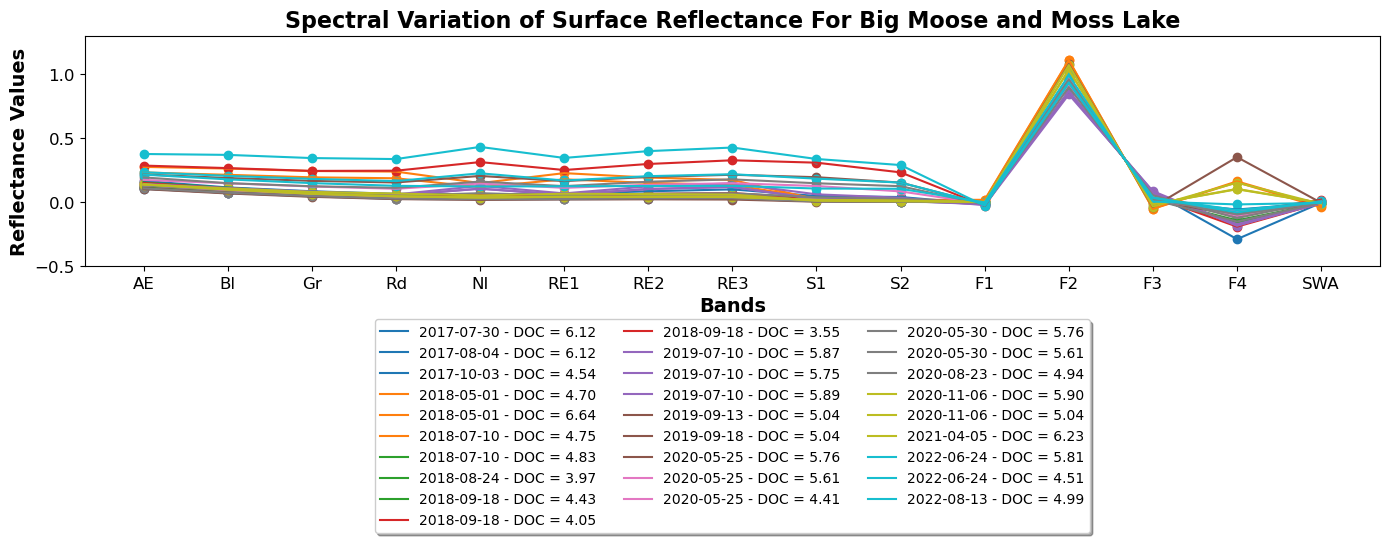

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Select the columns for bands and corresponding reflectance values
bands = ['Aerosols', 'Blue', 'Green', 'Red', 'NIR',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'SWIR1', 'SWIR2','DOC_Formula_input1','DOC_Formula_input2',
        'DOC_Formula_input3', 'DOC_Formula_input4', 'shortwave_infrared_adjusted']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Define a color palette for the lines
color_palette = plt.cm.tab10(np.linspace(0, 1, len(df_BIG_MOSS_lakes_ALTM_AWI)))

# Iterate over each row in the DataFrame
for i, (index, row) in enumerate(df_BIG_MOSS_lakes_ALTM_AWI.iterrows()):
    # Extract the reflectance values for the current row
    reflectance_values = row[bands].values
    
    # Format the legend label including date, siteID, and DOC_MG_L value
    legend_label = f'{row["DATE_SMP"]} - DOC = {row["DOC_MG_L"]:.2f}'
    
    # Plot the reflectance values for the current row as a single line
    ax.plot(reflectance_values, color=color_palette[i], linestyle='-', label=legend_label)  # Format DOC to 2 decimal places
    
    # Plot scatter points for the reflectance values
    ax.scatter(range(len(bands)), reflectance_values, color=color_palette[i], marker='o')

# Set labels and title with increased fontsize
ax.set_xlabel('Bands', fontsize=14, fontweight='bold')
ax.set_ylabel('Reflectance Values', fontsize=14, fontweight='bold')
ax.set_title('Spectral Variation of Surface Reflectance For Big Moose and Moss Lake', fontsize=16, fontweight='bold')

# Define custom labels for bands
custom_band_labels = ['AE', 'Bl', 'Gr', 'Rd', 'NI', 'RE1', 'RE2', 'RE3', 'S1', 'S2', 'F1', 'F2', 'F3', 'F4', 'SWA']

# Set x-axis ticks and labels to use custom band labels
ax.set_xticks(range(len(bands)))
ax.set_xticklabels(custom_band_labels)

# Increase fontsize for tick labels
ax.tick_params(axis='both', which='major', labelsize=12)


# Show the legend for lines below x-axis
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=3)

# Show the plot
plt.tight_layout()
plt.ylim(-.5, 1.3)
plt.show()


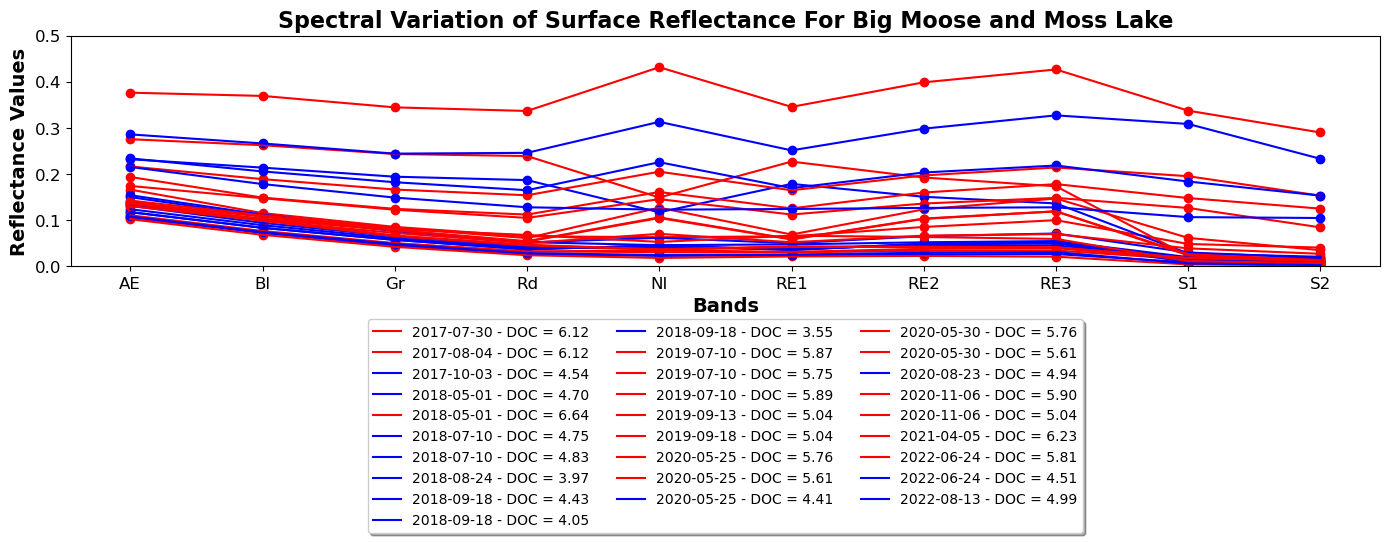

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Select the columns for bands and corresponding reflectance values
bands = ['Aerosols', 'Blue', 'Green', 'Red', 'NIR',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'SWIR1', 'SWIR2']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Define a color palette for the lines
color_palette = plt.cm.tab10(np.linspace(0, 1, len(df_BIG_MOSS_lakes_ALTM_AWI)))

# Iterate over each row in the DataFrame
for i, (index, row) in enumerate(df_BIG_MOSS_lakes_ALTM_AWI.iterrows()):
    # Extract the reflectance values for the current row
    reflectance_values = row[bands].values
    
    # Format the legend label including date, siteID, and DOC_MG_L value
    legend_label = f'{row["DATE_SMP"]} - DOC = {row["DOC_MG_L"]:.2f}'
    
    # Determine the color based on DOC_MG_L value
    if row["DOC_MG_L"] < 5:
        line_color = 'blue'
    else:
        line_color = 'red'
    
    # Plot the reflectance values for the current row as a single line
    ax.plot(reflectance_values, color=line_color, linestyle='-', label=legend_label)  # Format DOC to 2 decimal places
    
    # Plot scatter points for the reflectance values
    ax.scatter(range(len(bands)), reflectance_values, color=line_color, marker='o')

# Set labels and title with increased fontsize
ax.set_xlabel('Bands', fontsize=14, fontweight='bold')
ax.set_ylabel('Reflectance Values', fontsize=14, fontweight='bold')
ax.set_title('Spectral Variation of Surface Reflectance For Big Moose and Moss Lake', fontsize=16, fontweight='bold')

# Define custom labels for bands
custom_band_labels = ['AE', 'Bl', 'Gr', 'Rd', 'NI', 'RE1', 'RE2', 'RE3', 'S1', 'S2']

# Set x-axis ticks and labels to use custom band labels
ax.set_xticks(range(len(bands)))
ax.set_xticklabels(custom_band_labels)

# Increase fontsize for tick labels
ax.tick_params(axis='both', which='major', labelsize=12)


# Show the legend for lines below x-axis
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=3)

# Show the plot
plt.tight_layout()
plt.ylim(0, 0.5)
plt.show()


In [37]:
df_BIG_MOSS_lakes_ALTM_AWI

,DATE_SMP,SITE_ID,SITE_NAME,DOC_MG_L,DATE,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,Green,...,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2,DOC_Formula_input1,DOC_Formula_input2,DOC_Formula_input3,DOC_Formula_input4,shortwave_infrared_adjusted
0,2017-07-30,1A1-103,Big Moose Lake,6.117400,2017-08-02,6.8,0.104340,0.073986,0.0,0.049407,...,0.030190,0.033679,0.034309,0.014992,0.010288,-0.000631,0.981611,0.009280,-0.056971,-0.004838
1,2017-08-04,1A1-103,Big Moose Lake,6.117400,2017-08-02,6.8,0.166181,0.115279,0.0,0.085413,...,0.064974,0.085232,0.100016,0.048381,0.040542,-0.014784,0.852185,0.079806,-0.288200,-0.004692
2,2017-10-03,1A1-109,Moss Lake,4.544700,2017-10-04,5.7,0.107261,0.072062,0.0,0.045155,...,0.023873,0.025914,0.026538,0.008374,0.004578,-0.000624,0.976481,0.011900,-0.097351,-0.004490
3,2018-05-01,1A1-109,Moss Lake,4.696000,2018-05-02,5.7,0.232080,0.213861,0.0,0.194193,...,0.178573,0.150652,0.136254,0.027898,0.020646,0.014398,1.105671,-0.050184,0.162785,-0.028362
4,2018-05-01,1A1-103,Big Moose Lake,6.637400,2018-05-02,6.8,0.275463,0.262460,0.0,0.243358,...,0.226914,0.192381,0.173441,0.022142,0.016198,0.018940,1.109202,-0.051774,0.156362,-0.040444
5,2018-07-10,1A1-106,Dart Lake,4.748500,2018-07-10,7.3,0.117350,0.083353,0.0,0.057276,...,0.035410,0.048871,0.052440,0.016848,0.012359,-0.003569,0.931946,0.035225,-0.163412,-0.005908
6,2018-07-10,1A1-106,Dart Lake,4.826500,2018-07-12,7.3,0.117350,0.083353,0.0,0.057276,...,0.035410,0.048871,0.052440,0.016848,0.012359,-0.003569,0.931946,0.035225,-0.163412,-0.005908
7,2018-08-24,AWI00063,Big Moose Lake,3.970000,2018-08-25,24.5,0.123650,0.089056,0.0,0.060929,...,0.036952,0.046888,0.050004,0.009385,0.004401,-0.003116,0.937688,0.032158,-0.164325,-0.008775
10,2018-09-18,1A1-103,Big Moose Lake,4.428200,2018-09-18,6.8,0.154041,0.112095,0.0,0.077893,...,0.047492,0.052081,0.054702,0.019869,0.013117,-0.002621,0.952081,0.024548,-0.141731,-0.008260
8,2018-09-18,1A1-106,Dart Lake,4.045100,2018-09-18,7.3,0.149953,0.108477,0.0,0.076219,...,0.050095,0.065218,0.071111,0.029973,0.018195,-0.005893,0.917136,0.043223,-0.190525,-0.006405


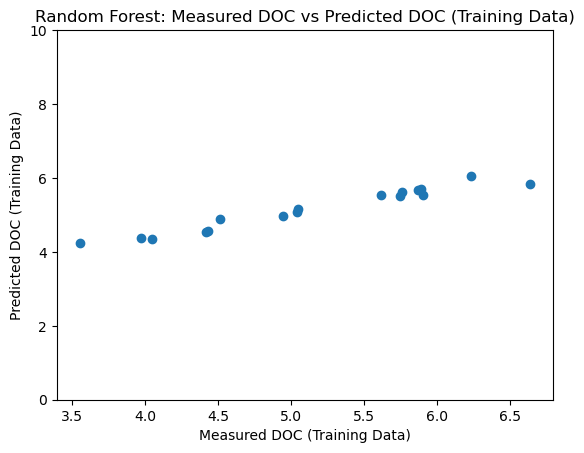

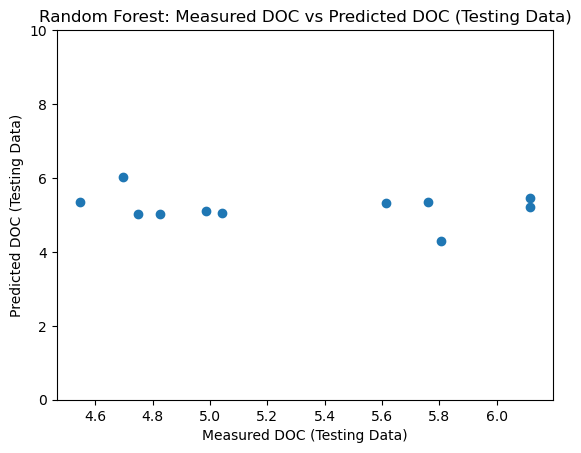

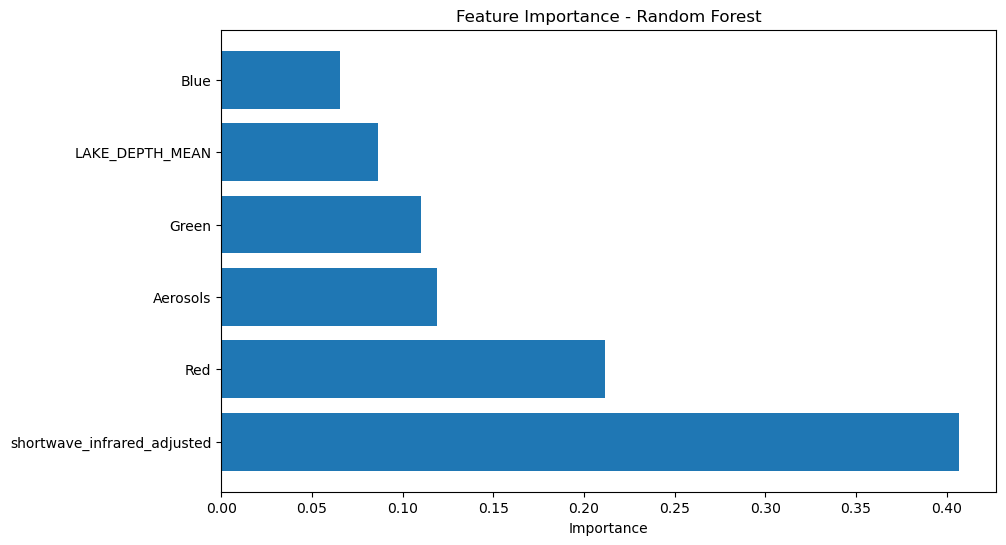

*************Model Evaluation Metrics***************
R^2: -0.7875751576480363
MSE: 0.5738663777962263
RMSE: 0.7575396872746841
MAE: 0.5908780506944482


In [36]:
################# RANDOM FOREST #######################
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler

# Assuming 'DATE_SMP' is the column representing the time series component
df_BIG_MOSS_lakes_ALTM_AWI['DATE_SMP'] = pd.to_datetime(df_BIG_MOSS_lakes_ALTM_AWI['DATE_SMP'])


# Preparing the training data
# X = df_BIG_MOSS_lakes_ALTM_AWI[['Aerosols', 'Blue', 'Green', 'Red',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR', 'SWIR1',
#             'SWIR2']]  # Features

# X = df_BIG_MOSS_lakes_ALTM_AWI[['Aerosols', 'Blue', 'Green', 'Red',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR', 'SWIR1',
#             'SWIR2','DOC_Formula_input1', 'DOC_Formula_input2', 'DOC_Formula_input3', 'DOC_Formula_input4', 'shortwave_infrared_adjusted',
#                                 'LAKE_DEPTH_MEAN']]  # Features

X = df_BIG_MOSS_lakes_ALTM_AWI[['Aerosols', 'Blue', 'Green', 'Red',
                                'LAKE_DEPTH_MEAN','shortwave_infrared_adjusted']]  # Features

#, 'LAKE_DEPTH_MEAN'
# y = df_BIG_MOSS_lakes_ALTM_AWI['SITE_ID']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = df_BIG_MOSS_lakes_ALTM_AWI.groupby('SITE_ID')

min_samples = 2  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    # X_lake = lake_group[['Aerosols', 'Blue', 'Green', 'Red',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR', 'SWIR1',
    #         'SWIR2','DOC_Formula_input1', 'DOC_Formula_input2', 'DOC_Formula_input3', 'DOC_Formula_input4','shortwave_infrared_adjusted','LAKE_DEPTH_MEAN']]
    X_lake = lake_group[['Aerosols', 'Blue', 'Green', 'Red', 'LAKE_DEPTH_MEAN','shortwave_infrared_adjusted']]
    
    y_lake = lake_group['DOC_MG_L']
   

    if len(lake_group) >= min_samples:

        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, min_samples_split=2)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

# Initialize the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Fit the Random Forest model
random_forest_model.fit(X_train, y_train)

# Predict DOC values for the testing data
y_pred_test = random_forest_model.predict(X_test)

# Create DataFrames for the training and testing data with all bands and the predicted values
data_train = X_train.copy()
data_train['DOC_MG_L'] = y_train
data_train['predicted_DOC'] = random_forest_model.predict(X_train)

data_test = X_test.copy()
data_test['DOC_MG_L'] = y_test
data_test['predicted_DOC'] = y_pred_test

# Plot the scatter plot for training data
plt.scatter(data_train['DOC_MG_L'], data_train['predicted_DOC'])
plt.xlabel('Measured DOC (Training Data)')
plt.ylabel('Predicted DOC (Training Data)')
plt.title('Random Forest: Measured DOC vs Predicted DOC (Training Data)')
plt.ylim(0,10)
plt.show()

# Plot the scatter plot for testing data
plt.scatter(data_test['DOC_MG_L'], data_test['predicted_DOC'])
plt.xlabel('Measured DOC (Testing Data)')
plt.ylabel('Predicted DOC (Testing Data)')
plt.title('Random Forest: Measured DOC vs Predicted DOC (Testing Data)')
plt.ylim(0,10)
plt.show()

# Feature Importance for Random Forest
feature_importances = random_forest_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()

# Model Evaluation
r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
mae = mean_absolute_error(y_test, y_pred_test)

# Display the model evaluation metrics
print("*************Model Evaluation Metrics***************")
print(f'R^2: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
         

In [25]:
# Use the trained Random Forest model to predict DOC values for the entire DataFrame
df_BIG_MOSS_lakes_ALTM_AWI['Predicted_DOC_MG_L'] = random_forest_model.predict(df_BIG_MOSS_lakes_ALTM_AWI[['DOC_Formula_input1', 'DOC_Formula_input2', 'DOC_Formula_input3', 'DOC_Formula_input4','LAKE_DEPTH_MEAN']])

# Display the DataFrame with the predicted DOC values
df_BIG_MOSS_lakes_ALTM_AWI

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- LAKE_DEPTH_MEAN
Feature names seen at fit time, yet now missing:
- Aerosols
- Blue
- Green
- NIR
- Red
- ...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming df_BIG_MOSS_lakes_ALTM_AWI is your DataFrame
# Extract the columns for plotting
DOC_MG_L = df_BIG_MOSS_lakes_ALTM_AWI['DOC_MG_L']
Predicted_DOC_MG_L = df_BIG_MOSS_lakes_ALTM_AWI['Predicted_DOC_MG_L']

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data
ax.scatter(Predicted_DOC_MG_L, DOC_MG_L, label='Predicted_DOC_MG_L vs DOC_MG_L')

# Add labels and title
ax.set_xlabel('Predicted_DOC_MG_L')
ax.set_ylabel('DOC_MG_L')
ax.set_title('Comparison of Predicted_DOC_MG_L and DOC_MG_L')

# Add legend
ax.legend()

# Calculate R^2
r_squared = r2_score(DOC_MG_L, Predicted_DOC_MG_L)
print("Coefficient of r^2 (R^2):", r_squared)

# Show the plot
plt.show()


MAPPING PURPOSE

In [1]:
import ee
import geemap
import pandas as pd

ee.Authenticate()

# Initialize Earth Engine
ee.Initialize()

Map = geemap.Map()

S2_BANDS = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B11', 'B12', 'QA60']
STD_NAMES = ['Aerosols', 'Blue', 'Green', 'Red',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR', 'SWIR1',
            'SWIR2', 'Cloudmask']

# Define the function to mask clouds and cloud shadows from Sentinel-2 imagery
def maskS2clouds(image):
    qa = image.select('QA60')
    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11

    # Create the cloud mask
    cloudMask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))

    # Apply the cloud mask to the image
    maskedImage = image.updateMask(cloudMask)

    return maskedImage

# Define the function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=20).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# Loop through each lake in the DataFrame
for index, row in filtered_df_AWI_ALTM.iterrows():
    # Extract lake information
    pondId = row['SITE_ID']
    pondname = row['SITE_NAME']
    date = row['DATE_SMP']
    doc = row['DOC_MG_L']
    

 
    # Create a 2-day window around the current date
    date_window_start = date - pd.Timedelta(days=3)
    date_window_end = date + pd.Timedelta(days=3)

    # print(date_window_start)
    # print(date_window_end)

    # Create a point geometry for the lake
    lake_point = ee.Geometry.Point(row['LONGITUDE'], row['LATITUDE'])

    # Create a 100-meter buffered box around the lake point
    lake_bbox = lake_point.buffer(80)

    # Retrieve Sentinel-2 images within the bounding box and filter by date
    s2 = ee.ImageCollection("COPERNICUS/S2_SR") \
        .filterBounds(lake_bbox) \
        .filter(ee.Filter.calendarRange(2015, 2024, 'year')) \
        .filter(ee.Filter.calendarRange(6, 9, 'month')) \
        .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10)) \
        .filterDate(date_window_start, date_window_end) \
        .map(maskS2clouds) \
        .select(S2_BANDS, STD_NAMES)

    # Map the reflectance function over the Sentinel-2 ImageCollection
    map_reflectance = s2.map(lambda img: reflectance(img, lake_bbox))

    # Resample the image to 20 meters
    map_resampled = map_reflectance.map(lambda img: img.reproject(crs=img.projection(), scale=20))

    # Reduce the mapped image collection to get reflectance values for the lake
    list_reflectance = map_resampled.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v/10000 for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)
    


    # Add lake information to DataFrame
    df_reflectance['SITE_ID'] = pondId
    df_reflectance['SITE_NAME'] = pondname
    df_reflectance['DOC_MG_L'] = doc
    df_reflectance['DATE'] = date

   
   


    # Add the DataFrame to the list
    dfs.append(df_reflectance)

# Concatenate all DataFrames into a single DataFrame
df_BIG_MOSS_lakes_ALTM_AWI = pd.concat(dfs, ignore_index=True)

df_BIG_MOSS_lakes_ALTM_AWI['DOC_Formula_input1'] = df_BIG_MOSS_lakes_ALTM_AWI['RedEdge2'] - df_BIG_MOSS_lakes_ALTM_AWI['RedEdge3']
df_BIG_MOSS_lakes_ALTM_AWI['DOC_Formula_input2'] = df_BIG_MOSS_lakes_ALTM_AWI['RedEdge2'] / df_BIG_MOSS_lakes_ALTM_AWI['RedEdge3']
df_BIG_MOSS_lakes_ALTM_AWI['DOC_Formula_input3'] = (df_BIG_MOSS_lakes_ALTM_AWI['RedEdge3'] - df_BIG_MOSS_lakes_ALTM_AWI['RedEdge2']) / (df_BIG_MOSS_lakes_ALTM_AWI['RedEdge2'] + df_BIG_MOSS_lakes_ALTM_AWI['RedEdge3'])
df_BIG_MOSS_lakes_ALTM_AWI['DOC_Formula_input4'] = df_BIG_MOSS_lakes_ALTM_AWI['Aerosols'] * ((1 / df_BIG_MOSS_lakes_ALTM_AWI['RedEdge3']) - (1 / df_BIG_MOSS_lakes_ALTM_AWI['RedEdge2']))

# Calculate the minimum value within the visible and near-infrared bands
df_BIG_MOSS_lakes_ALTM_AWI['min_vis_nir'] = df_BIG_MOSS_lakes_ALTM_AWI[['Blue', 'Green', 'Red', 'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR']].min(axis=1)

# Subtract the minimum value from Band 11
df_BIG_MOSS_lakes_ALTM_AWI['shortwave_infrared_adjusted'] = df_BIG_MOSS_lakes_ALTM_AWI['SWIR1'] - df_BIG_MOSS_lakes_ALTM_AWI['min_vis_nir']

df_BIG_MOSS_lakes_ALTM_AWI['shortwave_infrared_adjusted'] /= np.pi

# Drop the intermediate column 'min_vis_nir' if needed
df_BIG_MOSS_lakes_ALTM_AWI.drop(columns=['min_vis_nir'], inplace=True)


# Sort the DataFrame by 'DATE_SMP' in ascending order
df_BIG_MOSS_lakes_ALTM_AWI.sort_values(by='DATE_SMP', inplace=True)

# Display the DataFrame
df_BIG_MOSS_lakes_ALTM_AWI

NameError: name 'filtered_df_AWI_ALTM' is not defined

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import ee
import geemap
Map= geemap.Map()

# Initialize Earth Engine
ee.Initialize()

S2_BANDS = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B11', 'B12', 'QA60']
STD_NAMES = ['Aerosols', 'Blue', 'Green', 'Red',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR', 'SWIR1',
            'SWIR2', 'Cloudmask']


#lake = ee.FeatureCollection('projects/ee-mazard/assets/BigMooseLake');
#lake = ee.FeatureCollection('projects/ee-mazarderakhsh/assets/Moss-lake');
lake = ee.FeatureCollection('projects/ee-mazarderakhsh/assets/DartLake')

 


# Define the function to mask clouds and cloud shadows from Sentinel-2 imagery
def maskS2clouds(image):
    qa = image.select('QA60')
    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11

    # Create the cloud mask
    cloudMask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))

    # Apply the cloud mask to the image
    maskedImage = image.updateMask(cloudMask)

    return maskedImage.clip(lake)

# Define the function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=20).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)


def reflectance_median(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.median(), geometry=lake, scale=20).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# 58	1A1-109	2015-02-04	4.397457	Moss Lake	43.784042	-74.852539
# 17	1A1-103	2015-02-04	6.327517	Big Moose Lake	43.819986	-74.853690

# 133	AWI00065	2022-07-15	4.925000	Moss Lake	43.785021	-74.848347
# 125	AWI00063	2022-07-24	5.272000	Big Moose Lake	43.834914	-74.835959

# 2017-07-30	1A1-103	Big Moose Lake	6.1174	2017-08-02

# Create a point geometry for the lake
lake_point = ee.Geometry.Point(-74.853690, 43.819986)


# Create a 100-meter buffered box around the lake point
lake_bbox = lake_point.buffer(100).bounds()

# 2018-05-01 6.637400238 1A1-103
# 2018-08-24 3.97 AWI00063
# 2018-09-18  4.428199917 1A1-103
# 2019-07-10 5.88829999 1A1-103
# 2020-11-06  5.042799969 1A1-103
# 2021-02-04 6.499599775 1A1-103
# 2022-06-24 5.806 AWI00063

# 2019-07-10	
# 2019-09-18	
# Define the date range
date_start = '2019-06-01'
date_end = '2019-10-30' 
# 2022-08-13	

# 1A1-103	Big Moose Lake	6.117400	2017-08-02	

# Convert date strings to EE date objects
date_start = ee.Date(date_start)
date_end = ee.Date(date_end)

# Retrieve Sentinel-2 images within the bounding box and filter by date
s2 = ee.ImageCollection("COPERNICUS/S2_SR") \
    .filterBounds(lake) \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 5)) \
    .filterDate(date_start, date_end) \
    .map(maskS2clouds) \
    .select(S2_BANDS, STD_NAMES)

# Map the reflectance function over the Sentinel-2 ImageCollection
s2 = s2.map(lambda img: reflectance_median(img, lake))

# Clip the image collection to the lake geometry
s2_clipped = s2.map(lambda image: image.clip(lake))

# Initialize the map
Map = geemap.Map()

# # Add the clipped Sentinel-2 image to the map in RGB visualization
# Map.addLayer(s2_clipped, {'bands': ['Red', 'Green', 'Blue'], 'min': 0, 'max': 1000}, 'Sentinel-2 RGB (Clipped)')
# Map.addLayer(s2, {'bands': ['Red', 'Green', 'Blue'], 'min': 0, 'max': 1000}, 'Sentinel-2 RGB Refl(NOT Clipped)')

# Map.addLayer(s2_clipped, {'bands': ['NIR', 'Red', 'Green'], 'min': 0, 'max': 1000}, 'Sentinel-2 NRG (Clipped)')
# Map.addLayer(s2, {'bands': ['NIR', 'Red', 'Green'], 'min': 0, 'max': 1000}, 'Sentinel-2 NRG (NOT Clipped)')

# Map.addLayer(s2_clipped, {'bands': ['Aerosols', 'Red', 'Green'], 'min': 0, 'max': 1000}, 'Sentinel-2 ARG (Clipped)')
# Map.addLayer(s2, {'bands': ['Aerosols', 'Red', 'Green'], 'min': 0, 'max': 1000}, 'Sentinel-2 ARG (NOT Clipped)')

# # Add the clipped Sentinel-2 image to the map with shuffled bands in SWIR visualization
# Map.addLayer(s2_clipped, {'bands': ['SWIR1', 'NIR', 'Red'], 'min': 0, 'max': 1000}, 'Sentinel-2 SWIR (Clipped)')

# # Add the Sentinel-2 image without clipping with shuffled bands in SWIR visualization
# Map.addLayer(s2, {'bands': ['SWIR1', 'NIR', 'Red'], 'min': 0, 'max': 1000}, 'Sentinel-2 SWIR (NOT Clipped)')

# # Add the clipped Sentinel-2 image with shuffled bands in Red Edge visualization
# Map.addLayer(s2_clipped, {'bands': ['RedEdge1', 'RedEdge2', 'RedEdge3'], 'min': 0, 'max': 1000}, 'Sentinel-2 Red Edge (Clipped)')

# # Add the Sentinel-2 image without clipping with shuffled bands in Red Edge visualization
# Map.addLayer(s2, {'bands': ['RedEdge1', 'RedEdge2', 'RedEdge3'], 'min': 0, 'max': 1000}, 'Sentinel-2 Red Edge (NOT Clipped)')

# # Add the clipped Sentinel-2 image with shuffled bands in Aerosol visualization
# Map.addLayer(s2_clipped, {'bands': ['Aerosols', 'Red', 'Blue'], 'min': 0, 'max': 1000}, 'Sentinel-2 Aerosol (Clipped)')

# # Add the Sentinel-2 image without clipping with shuffled bands in Aerosol visualization
# Map.addLayer(s2, {'bands': ['Aerosols', 'Red', 'Blue'], 'min': 0, 'max': 1000}, 'Sentinel-2 Aerosol (NOT Clipped)')

Map.addLayer(s2, {'bands': ['RedEdge1', 'RedEdge2', 'Aerosols'], 'min': 0, 'max': 100}, 'Sentinel-2 Aerosol (NOT Clipped)')


# Set latitude and longitude values for specified SITE_ID ------------ ALTM 
latitude_ALTM_DARTLake = 43.79548
longitude_ALTM_DARTLake = -74.86409


lake_point_ALTM_DARTLake=  ee.Geometry.Point(longitude_ALTM_DARTLake, latitude_ALTM_DARTLake)

lake_bbox_ALTM_DARTLake = lake_point_ALTM_DARTLake.buffer(80).bounds()



# Map.addLayer(lake_bbox_AWI_MossLake)
# Map.addLayer(lake_bbox_ALTM_MossLake)

Map.addLayer(lake_point_ALTM_DARTLake, {'color': 'blue', 'shape': 'square', 'size': 40}, 'Lake Point ALTM')

Map.centerObject(lake_point_ALTM_DARTLake, 16)



# # Set latitude and longitude values for specified SITE_ID ------------ AWI
# latitude_AWI_MossLake = 43.7850205
# longitude_AWI_MossLake = -74.8483467

	
# # Set latitude and longitude values for specified SITE_ID ------------ ALTM 
# latitude_ALTM_MossLake = 43.784041537077364
# longitude_ALTM_MossLake = -74.85253910144142


# lake_point_AWI_MossLake=  ee.Geometry.Point(longitude_AWI_MossLake, latitude_AWI_MossLake)
# lake_point_ALTM_MossLake=  ee.Geometry.Point(longitude_ALTM_MossLake, latitude_ALTM_MossLake)

# lake_bbox_AWI_MossLake = lake_point_AWI_MossLake.buffer(80).bounds()
# lake_bbox_ALTM_MossLake = lake_point_ALTM_MossLake.buffer(80).bounds()



# # Map.addLayer(lake_bbox_AWI_MossLake)
# # Map.addLayer(lake_bbox_ALTM_MossLake)

# Map.addLayer(lake_point_AWI_MossLake, {'color': 'red', 'size': 40}, 'Lake Point AWI')
# Map.addLayer(lake_point_ALTM_MossLake, {'color': 'blue', 'shape': 'square', 'size': 40}, 'Lake Point ALTM')

# Map.centerObject(lake_point_AWI_MossLake, 16)
# Map.centerObject(lake_point_ALTM_MossLake, 16)




# # Set latitude and longitude values for specified SITE_ID ------------ AWI
# latitude_AWI_BigMooseLake = 43.8349136
# longitude_AWI_BigMooseLake = -74.8359591

# # Set latitude and longitude values for specified SITE_ID ------------ ALTM 
# latitude_ALTM_BigMooseLake = 43.819986046
# longitude_ALTM_BigMooseLake = -74.85369

# lake_point_AWI=  ee.Geometry.Point(longitude_AWI_BigMooseLake, latitude_AWI_BigMooseLake)
# lake_point_ALTM=  ee.Geometry.Point(longitude_ALTM_BigMooseLake, latitude_ALTM_BigMooseLake)

# lake_bbox_AWI = lake_point_AWI.buffer(100).bounds()
# lake_bbox_ALTM = lake_point_ALTM.buffer(100).bounds()


# Map.addLayer(lake_point_AWI, {'color': 'red'}, 'Lake Point AWI')  # Red color
# Map.addLayer(lake_point_ALTM, {'color': 'blue', 'shape': 'square'}, 'Lake Point ALTM')  # Blue color with square shape


# # Map.addLayer(lake_point_AWI)
# # Map.addLayer(lake_point_ALTM)

# Map.centerObject(lake_point_AWI, 16)
# Map.centerObject(lake_point_ALTM, 16)


# S2_BANDS = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B11', 'B12', 'QA60']
# STD_NAMES = ['Aerosols', 'Blue', 'Green', 'Red',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR', 'SWIR1',
#             'SWIR2', 'Cloudmask']


# Center the map on the lake point
Map.centerObject(lake, 16)

# Display the map
Map


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import ee
import geemap
Map= geemap.Map()

# Initialize Earth Engine
ee.Initialize()

S2_BANDS = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B11', 'B12', 'QA60']
STD_NAMES = ['Aerosols', 'Blue', 'Green', 'Red',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR', 'SWIR1',
            'SWIR2', 'Cloudmask']

# Define the function to mask clouds and cloud shadows from Sentinel-2 imagery
def maskS2clouds(image):
    qa = image.select('QA60')
    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11

    # Create the cloud mask
    cloudMask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))

    # Apply the cloud mask to the image
    maskedImage = image.updateMask(cloudMask)

    return maskedImage

# Define the function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=20).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)


# 133	AWI00065	2022-07-15	4.925000	Moss Lake	43.785021	-74.848347
# 125	AWI00063	2022-07-24	5.272000	Big Moose Lake	43.834914	-74.835959

# Create a point geometry for the lake
lake_point = ee.Geometry.Point(-74.835959, 43.834914)


# Create a 100-meter buffered box around the lake point
lake_bbox = lake_point.buffer(100).bounds()

# 2018-05-01 6.637400238 1A1-103
# 2018-08-24 3.97 AWI00063
# 2018-09-18  4.428199917 1A1-103
# 2019-07-10 5.88829999 1A1-103
# 2020-11-06  5.042799969 1A1-103
# 2021-02-04 6.499599775 1A1-103
# 2022-06-24 5.806 AWI00063


# Define the date range
date_start = '2022-06-22'
date_end = '2022-06-25' 

# Convert date strings to EE date objects
date_start = ee.Date(date_start)
date_end = ee.Date(date_end)

# Retrieve Sentinel-2 images within the bounding box and filter by date
s2 = ee.ImageCollection("COPERNICUS/S2") \
    .filterBounds(lake_bbox) \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 50)) \
    .filterDate(date_start, date_end) \
    .map(maskS2clouds) \
    .select(S2_BANDS, STD_NAMES)

# Map the reflectance function over the Sentinel-2 ImageCollection
s2 = s2.map(lambda img: reflectance(img, lake_bbox))

# Clip the image collection to the lake geometry
s2_clipped = s2.map(lambda image: image.clip(lake_bbox))

# Initialize the map
Map = geemap.Map()

# Add the clipped Sentinel-2 image to the map in RGB visualization
Map.addLayer(s2_clipped, {'bands': ['Red', 'Green', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 RGB (Clipped)')
# Map.addLayer(s2, {'bands': ['Red', 'Green', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 RGB Refl(NOT Clipped)')

# Map.addLayer(s2_clipped, {'bands': ['NIR', 'Red', 'Green'], 'min': 0, 'max': 3000}, 'Sentinel-2 NRG (Clipped)')
# Map.addLayer(s2, {'bands': ['NIR', 'Red', 'Green'], 'min': 0, 'max': 3000}, 'Sentinel-2 NRG (NOT Clipped)')

# Map.addLayer(s2_clipped, {'bands': ['Aerosols', 'Red', 'Green'], 'min': 0, 'max': 3000}, 'Sentinel-2 ARG (Clipped)')
# Map.addLayer(s2, {'bands': ['Aerosols', 'Red', 'Green'], 'min': 0, 'max': 3000}, 'Sentinel-2 ARG (NOT Clipped)')

# # Add the clipped Sentinel-2 image to the map with shuffled bands in SWIR visualization
# Map.addLayer(s2_clipped, {'bands': ['SWIR1', 'NIR', 'Red'], 'min': 0, 'max': 3000}, 'Sentinel-2 SWIR (Clipped)')

# # Add the Sentinel-2 image without clipping with shuffled bands in SWIR visualization
# Map.addLayer(s2, {'bands': ['SWIR1', 'NIR', 'Red'], 'min': 0, 'max': 3000}, 'Sentinel-2 SWIR (NOT Clipped)')

# # Add the clipped Sentinel-2 image with shuffled bands in Red Edge visualization
# Map.addLayer(s2_clipped, {'bands': ['RedEdge1', 'RedEdge2', 'RedEdge3'], 'min': 0, 'max': 3000}, 'Sentinel-2 Red Edge (Clipped)')

# # Add the Sentinel-2 image without clipping with shuffled bands in Red Edge visualization
# Map.addLayer(s2, {'bands': ['RedEdge1', 'RedEdge2', 'RedEdge3'], 'min': 0, 'max': 3000}, 'Sentinel-2 Red Edge (NOT Clipped)')

# # Add the clipped Sentinel-2 image with shuffled bands in Aerosol visualization
# Map.addLayer(s2_clipped, {'bands': ['Aerosols', 'Red', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 Aerosol (Clipped)')

# # Add the Sentinel-2 image without clipping with shuffled bands in Aerosol visualization
# Map.addLayer(s2, {'bands': ['Aerosols', 'Red', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 Aerosol (NOT Clipped)')


# Center the map on the lake point
Map.centerObject(lake_point, 16)

# Display the map
Map


Map(center=[43.834914, -74.835959], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Sea…

In [32]:
import ee
from geemap import Map

# Initialize Earth Engine
ee.Initialize()

# Define the parameters
START_DATE = ee.Date('2022-06-22')
END_DATE = ee.Date('2022-06-25')
MAX_CLOUD_PROBABILITY = 65
lake_point = ee.Geometry.Point(-74.835959, 43.834914)

# Load Sentinel-2 surface reflectance and cloud probability datasets
s2Sr = ee.ImageCollection('COPERNICUS/S2')
s2Clouds = ee.ImageCollection('COPERNICUS/S2_CLOUD_PROBABILITY')

# Define functions for masking clouds and edges
def maskClouds(img):
    clouds = img.get('cloud_mask').select(['probability'])
    isNotCloud = clouds.lt(MAX_CLOUD_PROBABILITY)
    return img.updateMask(isNotCloud)


def maskEdges(s2_img):
    return s2_img.updateMask(
        s2_img.select('B8A').mask().updateMask(s2_img.select('B9').mask()))

# Filter input collections by desired data range and region
criteria = ee.Filter.And(
    ee.Filter.bounds(lake_point),
    ee.Filter.date(START_DATE, END_DATE)
)
s2Sr = s2Sr.filter(criteria).map(maskEdges)
s2Clouds = s2Clouds.filter(criteria)

# Apply cloud mask by joining the collections based on the timestamp
s2SrWithCloudMask = ee.Join.saveFirst('cloud_mask').apply(
    s2Sr, s2Clouds, ee.Filter.equals(leftField='system:index', rightField='system:index'))

# Apply cloud mask and calculate median
s2CloudMasked = s2SrWithCloudMask.map(maskClouds).median()

# Define visualization parameters
rgbVis = {'min': 0, 'max': 3000, 'bands': ['B4', 'B3', 'B2']}

# Create a map
Map = geemap.Map()

# Add the layer to the map
Map.addLayer(
    s2CloudMasked, rgbVis,
    'S2 SR masked at {}%'.format(MAX_CLOUD_PROBABILITY),
    True
)

# Center the map on the lake point
Map.centerObject(lake_point, 12)

# Display the map
Map


AttributeError: 'ComputedObject' object has no attribute 'select'

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import ee
import geemap
Map= geemap.Map()

# Initialize Earth Engine
ee.Initialize()

S2_BANDS = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B11', 'B12', 'QA60']
STD_NAMES = ['Aerosols', 'Blue', 'Green', 'Red',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR', 'SWIR1',
            'SWIR2', 'Cloudmask']

# Define the function to mask clouds and cloud shadows from Sentinel-2 imagery
def maskS2clouds(image):
    qa = image.select('QA60')
    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11

    # Create the cloud mask
    cloudMask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))

    # Apply the cloud mask to the image
    maskedImage = image.updateMask(cloudMask)

    return maskedImage

def apply_cld_shdw_mask(img):
    # Subset the cloudmask band and invert it so clouds/shadow are 0, else 1.
    not_cld_shdw = img.select('Cloudmask').Not()

    # Subset reflectance bands and update their masks, return the result.
    return img.select('B.*').updateMask(not_cld_shdw)


def add_cld_shdw_mask(img):
    # Add cloud component bands.
    img_cloud = add_cloud_bands(img)

    # Add cloud shadow component bands.
    img_cloud_shadow = add_shadow_bands(img_cloud)

    # Combine cloud and shadow mask, set cloud and shadow as value 1, else 0.
    is_cld_shdw = img_cloud_shadow.select('clouds').add(img_cloud_shadow.select('shadows')).gt(0)

    # Remove small cloud-shadow patches and dilate remaining pixels by BUFFER input.
    # 20 m scale is for speed, and assumes clouds don't require 10 m precision.
    is_cld_shdw = (is_cld_shdw.focalMin(2).focalMax(BUFFER*2/20)
        .reproject(**{'crs': img.select([0]).projection(), 'scale': 20})
        .rename('cloudmask'))

    # Add the final cloud-shadow mask to the image.
    return img_cloud_shadow.addBands(is_cld_shdw)

# Define the function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=20).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)


# 133	AWI00065	2022-07-15	4.925000	Moss Lake	43.785021	-74.848347
# 125	AWI00063	2022-07-24	5.272000	Big Moose Lake	43.834914	-74.835959

# Create a point geometry for the lake
lake_point = ee.Geometry.Point(-74.835959, 43.834914)


# Create a 100-meter buffered box around the lake point
lake_bbox = lake_point.buffer(100).bounds()

# 2018-05-01 6.637400238 1A1-103
# 2018-08-24 3.97 AWI00063
# 2018-09-18  4.428199917 1A1-103
# 2019-07-10 5.88829999 1A1-103
# 2020-11-06  5.042799969 1A1-103
# 2021-02-04 6.499599775 1A1-103
# 2022-06-24 5.806 AWI00063


# Define the date range
date_start = '2022-06-22'
date_end = '2022-06-25' 

# Convert date strings to EE date objects
date_start = ee.Date(date_start)
date_end = ee.Date(date_end)

# Retrieve Sentinel-2 images within the bounding box and filter by date
s2 = ee.ImageCollection("COPERNICUS/S2") \
    .filterBounds(lake_bbox) \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 50)) \
    .filterDate(date_start, date_end) \
    .map(maskS2clouds) \
    .select(S2_BANDS, STD_NAMES)\
    .map(apply_cld_shdw_mask) \
    # .map(add_cld_shdw_mask)

# Map the reflectance function over the Sentinel-2 ImageCollection
s2 = s2.map(lambda img: reflectance(img, lake_bbox))

# Clip the image collection to the lake geometry
s2_clipped = s2.map(lambda image: image.clip(lake_bbox))

# Initialize the map
Map = geemap.Map()

# Add the clipped Sentinel-2 image to the map in RGB visualization
Map.addLayer(s2_clipped, {'bands': ['Blue', 'Blue', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 RGB (Clipped)')
Map.addLayer(s2, {'bands': ['Blue', 'Blue', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 RGB Refl(NOT Clipped)')

# Map.addLayer(s2_clipped, {'bands': ['NIR', 'Red', 'Green'], 'min': 0, 'max': 3000}, 'Sentinel-2 NRG (Clipped)')
# Map.addLayer(s2, {'bands': ['NIR', 'Red', 'Green'], 'min': 0, 'max': 3000}, 'Sentinel-2 NRG (NOT Clipped)')

# Map.addLayer(s2_clipped, {'bands': ['Aerosols', 'Red', 'Green'], 'min': 0, 'max': 3000}, 'Sentinel-2 ARG (Clipped)')
# Map.addLayer(s2, {'bands': ['Aerosols', 'Red', 'Green'], 'min': 0, 'max': 3000}, 'Sentinel-2 ARG (NOT Clipped)')

# # Add the clipped Sentinel-2 image to the map with shuffled bands in SWIR visualization
# Map.addLayer(s2_clipped, {'bands': ['SWIR1', 'NIR', 'Red'], 'min': 0, 'max': 3000}, 'Sentinel-2 SWIR (Clipped)')

# # Add the Sentinel-2 image without clipping with shuffled bands in SWIR visualization
# Map.addLayer(s2, {'bands': ['SWIR1', 'NIR', 'Red'], 'min': 0, 'max': 3000}, 'Sentinel-2 SWIR (NOT Clipped)')

# # Add the clipped Sentinel-2 image with shuffled bands in Red Edge visualization
# Map.addLayer(s2_clipped, {'bands': ['RedEdge1', 'RedEdge2', 'RedEdge3'], 'min': 0, 'max': 3000}, 'Sentinel-2 Red Edge (Clipped)')

# # Add the Sentinel-2 image without clipping with shuffled bands in Red Edge visualization
# Map.addLayer(s2, {'bands': ['RedEdge1', 'RedEdge2', 'RedEdge3'], 'min': 0, 'max': 3000}, 'Sentinel-2 Red Edge (NOT Clipped)')

# # Add the clipped Sentinel-2 image with shuffled bands in Aerosol visualization
# Map.addLayer(s2_clipped, {'bands': ['Aerosols', 'Red', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 Aerosol (Clipped)')

# # Add the Sentinel-2 image without clipping with shuffled bands in Aerosol visualization
# Map.addLayer(s2, {'bands': ['Aerosols', 'Red', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 Aerosol (NOT Clipped)')


# Center the map on the lake point
Map.centerObject(lake_point, 16)

# Display the map
Map


Map(center=[43.834914, -74.835959], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Sea…

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import ee
import geemap
Map= geemap.Map()

# Initialize Earth Engine
ee.Initialize()

S2_BANDS = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B11', 'B12', 'QA60']
STD_NAMES = ['Aerosols', 'Blue', 'Green', 'Red',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR', 'SWIR1',
            'SWIR2', 'Cloudmask']

# Define the function to mask clouds and cloud shadows from Sentinel-2 imagery
def maskS2clouds(image):
    qa = image.select('QA60')
    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11

    # Create the cloud mask
    cloudMask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))

    # Apply the cloud mask to the image
    maskedImage = image.updateMask(cloudMask)

    return maskedImage

def apply_cld_shdw_mask(img):
    # Subset the cloudmask band and invert it so clouds/shadow are 0, else 1.
    not_cld_shdw = img.select('Cloudmask').Not()

    # Subset reflectance bands and update their masks, return the result.
    return img.select('B.*').updateMask(not_cld_shdw)

# Define the function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=20).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)


# 133	AWI00065	2022-07-15	4.925000	Moss Lake	43.785021	-74.848347
# 125	AWI00063	2022-07-24	5.272000	Big Moose Lake	43.834914	-74.835959

# Create a point geometry for the lake
lake_point = ee.Geometry.Point(-74.835959, 43.834914)


# Create a 100-meter buffered box around the lake point
lake_bbox = lake_point.buffer(100).bounds()

# 2018-05-01 6.637400238 1A1-103
# 2018-08-24 3.97 AWI00063
# 2018-09-18  4.428199917 1A1-103
# 2019-07-10 5.88829999 1A1-103
# 2020-11-06  5.042799969 1A1-103
# 2021-02-04 6.499599775 1A1-103
# 2022-06-24 5.806 AWI00063


# Define the date range
date_start = '2022-06-22'
date_end = '2022-06-25' 

# Convert date strings to EE date objects
date_start = ee.Date(date_start)
date_end = ee.Date(date_end)

# Retrieve Sentinel-2 images within the bounding box and filter by date
s2 = ee.ImageCollection("COPERNICUS/S2") \
    .filterBounds(lake_bbox) \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 50)) \
    .filterDate(date_start, date_end) \
    .map(maskS2clouds) \
    .select(S2_BANDS, STD_NAMES)

# Map the reflectance function over the Sentinel-2 ImageCollection
s2 = s2.map(lambda img: reflectance(img, lake_bbox))

# Clip the image collection to the lake geometry
s2_clipped = s2.map(lambda image: image.clip(lake_bbox))

# Initialize the map
Map = geemap.Map()

# Add the clipped Sentinel-2 image to the map in RGB visualization
Map.addLayer(s2_clipped, {'bands': ['Blue', 'Blue', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 RGB (Clipped) without cloudless')
Map.addLayer(s2, {'bands': ['Blue', 'Blue', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 RGB Refl(NOT Clipped)  without cloudless')

# Map.addLayer(s2_clipped, {'bands': ['NIR', 'Red', 'Green'], 'min': 0, 'max': 3000}, 'Sentinel-2 NRG (Clipped)')
# Map.addLayer(s2, {'bands': ['NIR', 'Red', 'Green'], 'min': 0, 'max': 3000}, 'Sentinel-2 NRG (NOT Clipped)')

# Map.addLayer(s2_clipped, {'bands': ['Aerosols', 'Red', 'Green'], 'min': 0, 'max': 3000}, 'Sentinel-2 ARG (Clipped)')
# Map.addLayer(s2, {'bands': ['Aerosols', 'Red', 'Green'], 'min': 0, 'max': 3000}, 'Sentinel-2 ARG (NOT Clipped)')

# # Add the clipped Sentinel-2 image to the map with shuffled bands in SWIR visualization
# Map.addLayer(s2_clipped, {'bands': ['SWIR1', 'NIR', 'Red'], 'min': 0, 'max': 3000}, 'Sentinel-2 SWIR (Clipped)')

# # Add the Sentinel-2 image without clipping with shuffled bands in SWIR visualization
# Map.addLayer(s2, {'bands': ['SWIR1', 'NIR', 'Red'], 'min': 0, 'max': 3000}, 'Sentinel-2 SWIR (NOT Clipped)')

# # Add the clipped Sentinel-2 image with shuffled bands in Red Edge visualization
# Map.addLayer(s2_clipped, {'bands': ['RedEdge1', 'RedEdge2', 'RedEdge3'], 'min': 0, 'max': 3000}, 'Sentinel-2 Red Edge (Clipped)')

# # Add the Sentinel-2 image without clipping with shuffled bands in Red Edge visualization
# Map.addLayer(s2, {'bands': ['RedEdge1', 'RedEdge2', 'RedEdge3'], 'min': 0, 'max': 3000}, 'Sentinel-2 Red Edge (NOT Clipped)')

# # Add the clipped Sentinel-2 image with shuffled bands in Aerosol visualization
# Map.addLayer(s2_clipped, {'bands': ['Aerosols', 'Red', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 Aerosol (Clipped)')

# # Add the Sentinel-2 image without clipping with shuffled bands in Aerosol visualization
# Map.addLayer(s2, {'bands': ['Aerosols', 'Red', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 Aerosol (NOT Clipped)')


# Center the map on the lake point
Map.centerObject(lake_point, 16)

# Display the map
Map


Map(center=[43.834914, -74.835959], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Sea…

In [2]:
df_1 = pd.read_csv("elsID.csv")	
df_2 = pd.read_csv("adklakes3.csv", usecols=['els_lakeid', 'SAREA', 'MEANDEPTH', 'MAXDEPTH', 'LAKENAME_emap', 'PONDNAME'])
merged_df1_df2 = pd.merge(df_1, df_2, on=['els_lakeid'])
merged_df1_df2

,els_lakeid,PONDNAME,LAKENAME_emap,SAREA,MAXDEPTH,MEANDEPTH
0,1A1-102,HEART LAKE,NaN,10.7,16.8,5.1
1,1A1-102,HEART LAKE,NaN,10.7,16.8,5.1
2,1A1-102,HEART LAKE,NaN,10.7,16.8,5.1
3,1A1-102,HEART LAKE,NaN,10.7,16.8,5.1
4,1A1-102,HEART LAKE,NaN,10.7,16.8,5.1
...,...,...,...,...,...,...
72,1A1-052,ARBUTUS LAKE,ARBUTUS POND,48.2,7.9,2.8
73,1A1-052,ARBUTUS LAKE,ARBUTUS POND,48.2,7.9,2.8
74,1A1-052,ARBUTUS LAKE,ARBUTUS POND,48.2,7.9,2.8
75,1A1-052,ARBUTUS LAKE,ARBUTUS POND,48.2,7.9,2.8


In [4]:
# Get unique els_lakeid values
unique_els_lakeid_df = merged_df1_df2.drop_duplicates(subset=['els_lakeid'])
unique_els_lakeid_df

,els_lakeid,PONDNAME,LAKENAME_emap,SAREA,MAXDEPTH,MEANDEPTH
0,1A1-102,HEART LAKE,NaN,10.7,16.8,5.1
12,1A1-110,LAKE RONDAXE,NaN,90.5,10.1,3.0
24,1A1-103,BIG MOOSE LAKE,NaN,512.5,21.3,6.8
36,1A2-077,CLEAR POND,NaN,70.4,24.4,9.2
47,1A1-106,DART LAKE,NaN,51.8,17.7,7.3
59,1A1-109,MOSS LAKE,NaN,45.7,15.2,5.7
70,1A1-052,ARBUTUS LAKE,ARBUTUS POND,48.2,7.9,2.8


In [5]:
unique_els_lakeid = merged_df1_df2['els_lakeid'].unique()
unique_els_lakeid

array(['1A1-102', '1A1-110', '1A1-103', '1A2-077', '1A1-106', '1A1-109',
       '1A1-052'], dtype=object)

In [7]:
import pandas as pd

# Read the CSV files
df_LTM = pd.read_excel("LTM_Data_2023_3_9.xlsx", usecols=['SITE_ID', 'DATE_SMP','DOC_MG_L'])

# Filter based on specific SITE_IDs
site_ids = ['1A1-102', '1A1-110', '1A1-103', '1A2-077', '1A1-106', '1A1-109', '1A1-052']
filtered_df = df_LTM[df_LTM['SITE_ID'].isin(site_ids)]
filtered_df

,SITE_ID,DATE_SMP,DOC_MG_L
86,1A1-052,1989-10-01,5.000000
87,1A1-102,1982-12-13,4.900000
88,1A1-102,1983-07-25,3.700000
89,1A1-102,1983-10-03,2.900000
90,1A1-102,1986-06-18,2.800000
...,...,...,...
38328,1A1-110,2018-09-25,3.682900
38335,1A1-103,2019-04-02,6.400300
38336,1A1-106,2019-05-20,5.993100
38346,1A1-103,2019-11-14,7.429081


In [8]:
import pandas as pd

# Assuming DATE_SMP is a datetime column
filtered_df['DATE_SMP'] = pd.to_datetime(filtered_df['DATE_SMP'])

# Filter based on conditions
filtered_df = filtered_df[
    (filtered_df['DATE_SMP'].dt.month.isin([6, 7, 8])) &  # Months June, July, August
    (filtered_df['DATE_SMP'].dt.year.between(1984, 1987))  # Years 1984 to 1987
]


In [9]:
filtered_df

,SITE_ID,DATE_SMP,DOC_MG_L
90,1A1-102,1986-06-18,2.8
109,1A1-110,1987-06-30,3.2
1311,1A1-103,1984-07-25,2.7
2555,1A2-077,1984-08-22,2.8
3810,1A1-110,1984-08-23,2.9
...,...,...,...
35299,1A1-102,1987-08-30,2.9
35302,1A1-106,1984-07-25,2.7
35304,1A1-106,1987-06-30,3.5
37798,1A1-106,1985-08-20,2.0


In [10]:
# Calculate average DOC for each SITE_ID
avg_doc_by_site = filtered_df.groupby('SITE_ID')['DOC_MG_L'].mean()

# Display the result
avg_doc_by_site

SITE_ID
1A1-052    4.790909
1A1-102    3.166667
1A1-103    3.266667
1A1-106    3.000000
1A1-109    3.591667
1A1-110    3.150000
1A2-077    3.145455
Name: DOC_MG_L, dtype: float64

In [1]:
# import pandas as pd

# # Read the CSV files
# df_1 = pd.read_csv("lagoes_adk_modified.csv")
# df_2 = pd.read_csv("adk80sKEY.csv")

# # Replace non-integer values in 'Permanent_' column with NaN
# df_2['Permanent_'] = pd.to_numeric(df_2['Permanent_'], errors='coerce')

# # Merge df_1 and df_2
# merged_df1_df2 = pd.merge(df_1, df_2, on=['Permanent_'])

# # Read the CSV file adklakes3.csv and select specific columns
# df_3 = pd.read_csv("adklakes3.csv", usecols=['SAREA', 'PONDNO'])

# # Merge merged_df1_df2 with df_3
# merged_df1_df2_df3 = pd.merge(merged_df1_df2, df_3, on=['PONDNO'], how='left')

# # Display the merged DataFrame
# merged_df1_df2_df3

,0,lagoslakeid,sampledate,Unnamed: 3,chla,colort,doc,secchi,Permanent_,nhd_lat,nhd_long,lagosname1,meandepth,maxdepth,PONDNO,SAREA
0,4,100953,10/7/86,NaN,0.800,2.0,2.200,7.8,131844984,43.712164,-74.798791,LIMEKILN LAK,6.1,21.9,040826,NaN
1,4590,100953,1/15/09,NaN,0.854,25.0,3.903,NaN,131844984,43.712164,-74.798791,LIMEKILN LAK,6.1,21.9,040826,NaN
2,4591,100953,2/11/09,NaN,0.682,15.0,3.606,NaN,131844984,43.712164,-74.798791,LIMEKILN LAK,6.1,21.9,040826,NaN
3,4592,100953,3/11/09,NaN,0.675,25.0,3.758,NaN,131844984,43.712164,-74.798791,LIMEKILN LAK,6.1,21.9,040826,NaN
4,4593,100953,4/15/09,NaN,1.850,20.0,3.076,NaN,131844984,43.712164,-74.798791,LIMEKILN LAK,6.1,21.9,040826,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14337,17548,46086,7/30/85,NaN,NaN,25.0,NaN,NaN,131841905,43.891725,-74.738990,UNNAMED POND,3.0,8.0,040773,NaN
14338,17549,73980,7/30/85,NaN,NaN,40.0,NaN,NaN,131841136,43.981970,-74.716435,MUD POND,2.0,7.0,040548,NaN
14339,17550,95868,7/30/85,NaN,NaN,100.0,NaN,NaN,132437223,43.878375,-74.526344,UNNAMED POND,1.0,1.2,060297,NaN
14340,17551,127591,8/27/85,NaN,NaN,80.0,NaN,NaN,131845846,43.608904,-74.707987,UNNAMED POND,1.0,2.0,040864A,1.4


In [2]:
# merged_df1_df2_df3['sampledate'] = pd.to_datetime(merged_df1_df2_df3['sampledate'])

# # Filter for the specified months and years
# filtered_df = merged_df1_df2_df3[
#     (
#         (merged_df1_df2_df3['sampledate'].dt.month.isin([6, 7, 8]))  # Filter for June, July, and August
#         & (merged_df1_df2_df3['sampledate'].dt.year.isin([1984, 1985, 1986]))  # Filter for years 1984, 1985, and 1986
#     )
# ]

# # Sort the DataFrame by 'sampledate'
# filtered_df_sorted = filtered_df.sort_values(by='sampledate')


# filtered_df

C:\Users\Faculty\AppData\Local\Temp\ipykernel_14612\105376617.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df1_df2_df3['sampledate'] = pd.to_datetime(merged_df1_df2_df3['sampledate'])


,0,lagoslakeid,sampledate,Unnamed: 3,chla,colort,doc,secchi,Permanent_,nhd_lat,nhd_long,lagosname1,meandepth,maxdepth,PONDNO,SAREA
216,15402,100953,1985-07-22,NaN,NaN,5.0,2.7,NaN,131844984,43.712164,-74.798791,LIMEKILN LAK,6.1,21.9,040826,NaN
238,28,117429,1986-06-09,NaN,2.5,30.0,4.8,2.4,131846419,43.591768,-75.118169,OTTER LAKE,NaN,2.5,040926,NaN
240,5262,117429,1986-07-28,NaN,2.5,33.0,5.4,2.2,131846419,43.591768,-75.118169,OTTER LAKE,NaN,2.5,040926,NaN
243,17129,117429,1985-07-30,NaN,NaN,40.0,6.6,NaN,131846419,43.591768,-75.118169,OTTER LAKE,NaN,2.5,040926,NaN
364,1569,6892,1986-07-30,NaN,1.5,3.0,2.1,8.0,133098723,44.156777,-75.044921,STAR LAKE,NaN,13.0,040281,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14337,17548,46086,1985-07-30,NaN,NaN,25.0,NaN,NaN,131841905,43.891725,-74.738990,UNNAMED POND,3.0,8.0,040773,NaN
14338,17549,73980,1985-07-30,NaN,NaN,40.0,NaN,NaN,131841136,43.981970,-74.716435,MUD POND,2.0,7.0,040548,NaN
14339,17550,95868,1985-07-30,NaN,NaN,100.0,NaN,NaN,132437223,43.878375,-74.526344,UNNAMED POND,1.0,1.2,060297,NaN
14340,17551,127591,1985-08-27,NaN,NaN,80.0,NaN,NaN,131845846,43.608904,-74.707987,UNNAMED POND,1.0,2.0,040864A,1.4


In [3]:
# # Define the file path where you want to save the Excel file
# file_path = "lagoes_data_surfaceArea.xlsx"

# # Export the DataFrame to Excel
# filtered_df.to_excel(file_path, index=False)

# print("DataFrame exported to Excel successfully.")


DataFrame exported to Excel successfully.


In [4]:
# import pandas as pd

# # Count unique values in 'lagoslakeid', 'PONDNO', and 'SAREA' columns
# unique_lagoslakeid_count_1 = df_1['lagoslakeid'].nunique()
# unique_pondno_count_1 = df_2['PONDNO'].nunique()
# unique_Pondno__count_2 = df_3['PONDNO'].nunique()

# unique_sarea_count_1 = df_3['SAREA'].count()

# # Display the counts
# print("Unique values in 'lagoslakeid':", unique_lagoslakeid_count_1)
# print("Unique values in 'PONDNO':", unique_pondno_count_1)
# print("Unique values in 'Permanent':", unique_Pondno__count_2)

# print("Unique values in 'SAREA':", unique_sarea_count_1)


Unique values in 'lagoslakeid': 1326
Unique values in 'PONDNO': 1218
Unique values in 'Permanent': 1478
Unique values in 'SAREA': 1478


In [5]:
# import pandas as pd

# # Count unique values in 'lagoslakeid', 'PONDNO', and 'SAREA' columns
# unique_lagoslakeid_count = filtered_df['lagoslakeid'].nunique()
# unique_pondno_count = filtered_df['PONDNO'].nunique()
# unique_Permanent__count = filtered_df['Permanent_'].nunique()

# unique_sarea_count = filtered_df['SAREA'].count()

# # Display the counts
# print("Unique values in 'lagoslakeid':", unique_lagoslakeid_count)
# print("Unique values in 'PONDNO':", unique_pondno_count)
# print("Unique values in 'Permanent':", unique_Permanent__count)

# print("Unique values in 'SAREA':", unique_sarea_count)


Unique values in 'lagoslakeid': 999
Unique values in 'PONDNO': 998
Unique values in 'Permanent': 999
Unique values in 'SAREA': 76


In [6]:
# avg_june_july_aug_values = filtered_df[['doc', 'colort', 'secchi', 'chla']].mean()

# # Create a new DataFrame to store the average values
# avg_june_july_aug_df = pd.DataFrame(avg_june_july_aug_values, columns=['Average'])
# avg_june_july_aug_df

,Average
doc,6.952882
colort,53.720111
secchi,2.666667
chla,2.234898


In [2]:
import pandas as pd


# Read the Excel file
data_excel = pd.read_excel("LTM_Data_2023_3_9.xlsx", usecols=lambda x: x != 'PROGRAM_ID')
data_excel_site = pd.read_excel("Site_Information_2022_8_1.xlsx", usecols=['SITE_ID', 'PROGRAM_ID', 'SITE_NAME','LAKE_DEPTH_MEAN'])

data_second_sheet_COORD = pd.read_excel("ALTM-50-stations.xlsx",
                                 sheet_name='updated station coordinates', usecols=['SITE_ID', 'LATDD', 'LONDD','LATDD_CENT','LONDD_CENT','SITE_NAME'])

# Merge the two DataFrames based on the common column 'SITE_ID'
merged_data_excel = pd.merge(data_excel, data_excel_site, on=['SITE_ID'])
merged_data_combined = pd.merge(merged_data_excel, data_second_sheet_COORD, on=['SITE_ID', 'SITE_NAME'])

data_modified = merged_data_combined.drop(columns=['SAMPLE_LOCATION'])


#pd.set_option('display.max_rows', None)
# Display the merged DataFrame
(data_modified)


,SITE_ID,DATE_SMP,month,SAMPLE_TYPE,WATERBODY_TYPE,SAMPLE_DEPTH,TIME_SMP,ANC_UEQ_L,CA_UEQ_L,CHL_A_UG_L,...,SIO2_MG_L,SO4_UEQ_L,WTEMP_DEG_C,PROGRAM_ID,SITE_NAME,LAKE_DEPTH_MEAN,LATDD,LONDD,LATDD_CENT,LONDD_CENT
0,040850,1997-09-22,9.0,Annual,Lake,NaN,NaN,21.400,71.400000,NaN,...,0.280000,96.000000,NaN,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
1,040850,1997-09-22,9.0,Annual,Lake,NaN,NaN,21.400,71.400000,NaN,...,0.280000,96.000000,NaN,LTM_ME,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
2,040850,1995-03-02,3.0,Regular,Lake,0.5,1215,12.190,94.311000,NaN,...,1.660000,133.328000,NaN,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
3,040850,1995-03-02,3.0,Regular,Lake,0.5,1215,12.190,94.311000,NaN,...,1.660000,133.328000,NaN,LTM_ME,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
4,040850,1996-08-19,8.0,Regular,Lake,0.5,1125,15.870,82.335000,NaN,...,1.360000,85.904000,NaN,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17863,1A3-048,2011-05-18,5.0,Regular,Lake,0.0,1100,13.562,59.071321,3.147251,...,4.770097,64.848160,NaN,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172
17864,1A3-048,2015-06-10,6.0,Regular,Lake,0.0,1420,28.060,58.276713,NaN,...,4.777790,51.449910,NaN,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172
17865,1A3-048,2016-07-14,7.0,Regular,Lake,0.0,1124,62.806,73.456692,2.690754,...,2.433176,61.076059,NaN,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172
17866,1A3-048,2016-09-15,9.0,Regular,Lake,0.0,1040,45.320,64.110173,2.027353,...,3.361868,45.375210,NaN,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172


In [3]:
data_modified= data_modified[data_modified['SITE_ID'] == '1A1-103']
data_modified['DATE_SMP'] = pd.to_datetime(data_modified['DATE_SMP'])

# Filter rows where 'DATE_SMP' is greater than a specific date in 2015
data_modified = data_modified[data_modified['DATE_SMP'] > '2015-01-01']

data_modified

,SITE_ID,DATE_SMP,month,SAMPLE_TYPE,WATERBODY_TYPE,SAMPLE_DEPTH,TIME_SMP,ANC_UEQ_L,CA_UEQ_L,CHL_A_UG_L,...,SIO2_MG_L,SO4_UEQ_L,WTEMP_DEG_C,PROGRAM_ID,SITE_NAME,LAKE_DEPTH_MEAN,LATDD,LONDD,LATDD_CENT,LONDD_CENT
2924,1A1-103,2019-09-04,9.0,Regular,Lake,0.0,10:50,21.122396,74.935051,NaN,...,2.207981,37.574200,NaN,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646
2925,1A1-103,2021-05-04,5.0,Regular,Lake,0.0,10:15,49.000217,66.873634,1.050000,...,4.196834,41.137402,NaN,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646
2936,1A1-103,2020-11-05,11.0,Regular,Lake,0.0,11:20,65.369179,75.149170,2.240000,...,3.251102,40.899399,NaN,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646
2962,1A1-103,2017-09-07,9.0,Regular,Lake,0.0,1129,28.600000,64.478584,4.127936,...,2.362053,41.397488,NaN,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646
2963,1A1-103,2017-11-02,11.0,Regular,Lake,NaN,11:24,16.134806,76.676277,1.040000,...,2.745837,38.545799,NaN,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646
2964,1A1-103,2020-05-28,5.0,Regular,Lake,0.0,11:10,12.083369,65.413574,1.880000,...,3.889847,38.786201,NaN,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646
2979,1A1-103,2016-02-01,2.0,Regular,Lake,0.0,1040,34.964000,76.858425,1.565247,...,4.516272,56.683466,NaN,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646
2990,1A1-103,2015-07-02,7.0,Regular,Lake,0.0,1035,25.664000,60.823709,NaN,...,3.384574,42.449404,NaN,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646
2991,1A1-103,2015-10-05,10.0,Regular,Lake,0.0,1036,37.904000,67.361307,NaN,...,2.802768,42.826844,NaN,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646
2992,1A1-103,2017-03-06,3.0,Regular,Lake,0.0,1100,8.642000,56.790791,0.251840,...,4.421633,54.088167,NaN,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646


In [4]:
AWI_ADK_Excel = pd.read_excel("AWI-ADK.xlsx", usecols=['AWI Site ID', 'AWI Waterbody ID', 'Waterbody Name', 'Sample Location',	'Latitude_AWI',	'Longitude_AWI', 'Parameter','Sample Date AWI','Reported Value','Units'])
AWI_ADK_Excel = AWI_ADK_Excel[AWI_ADK_Excel['Parameter'] == 'Dissolved Organic Carbon']

alap_data= pd.read_excel("ALAP_DATA.xlsx")
alap_data.rename(columns={'LAKE_NAME': 'Waterbody Name'}, inplace=True)
alap_data = alap_data[~alap_data.applymap(lambda x: isinstance(x, (str, bytes)) and '-' in x).any(axis=1)]

merged_alap_adk_excel = pd.merge(AWI_ADK_Excel, alap_data, on=['Waterbody Name'])
merged_alap_adk_excel.rename(columns={'AWI Waterbody ID': 'SITE_ID' }, inplace=True)
merged_alap_adk_excel.rename(columns={'Waterbody Name': 'SITE_NAME' }, inplace=True)
merged_alap_adk_excel.rename(columns={'Reported Value': 'DOC_MG_L'}, inplace=True)
merged_alap_adk_excel.rename(columns={'LAKE_DEPTH (m)': 'LAKE_DEPTH_MEAN'}, inplace=True)
merged_alap_adk_excel.rename(columns={'Sample Date AWI': 'DATE_SMP'}, inplace=True)
merged_alap_adk_excel = merged_alap_adk_excel[~merged_alap_adk_excel.applymap(lambda x: isinstance(x, (str, bytes)) and '-' in x).any(axis=1)]

alap_adk = merged_alap_adk_excel[['SITE_ID', 'DATE_SMP', 'DOC_MG_L', 'SITE_NAME', 'LAKE_DEPTH_MEAN']]

ALTM_data = data_modified[['SITE_ID', 'DATE_SMP', 'DOC_MG_L', 'SITE_NAME', 'LAKE_DEPTH_MEAN']]

ALTM_ADK_ALAP_DATA = pd.concat([ALTM_data, alap_adk], axis=0, ignore_index=True)
ALTM_ADK_ALAP_DATA.dropna(inplace=True)



In [5]:
ALTM_ADK_ALAP_DATA= ALTM_ADK_ALAP_DATA[ALTM_ADK_ALAP_DATA['SITE_NAME']=='Big Moose Lake']
ALTM_ADK_ALAP_DATA

lake_point=  ee.Geometry.Point(-74.8359591, 43.8349136)

In [6]:
# Set latitude and longitude values for specified SITE_ID
latitude = 43.8349136
longitude = -74.8359591
SITE_ID = 'AWI00063'

# Update DataFrame with latitude and longitude values for SITE_ID
ALTM_ADK_ALAP_DATA.loc[ALTM_ADK_ALAP_DATA['SITE_ID'] == SITE_ID, 'LATITUDE'] = latitude
ALTM_ADK_ALAP_DATA.loc[ALTM_ADK_ALAP_DATA['SITE_ID'] == SITE_ID, 'LONGITUDE'] = longitude
ALTM_ADK_ALAP_DATA

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,LATITUDE,LONGITUDE
0,1A1-103,2019-09-04,5.5057,Big Moose Lake,6.8,NaN,NaN
1,1A1-103,2021-05-04,6.9898,Big Moose Lake,6.8,NaN,NaN
2,1A1-103,2020-11-05,5.0428,Big Moose Lake,6.8,NaN,NaN
3,1A1-103,2017-09-07,6.1132,Big Moose Lake,6.8,NaN,NaN
4,1A1-103,2017-11-02,5.4068,Big Moose Lake,6.8,NaN,NaN
...,...,...,...,...,...,...,...
668,AWI00063,2021-07-22,6.0500,Big Moose Lake,21.3,43.834914,-74.835959
669,AWI00063,2021-08-22,6.9600,Big Moose Lake,21.3,43.834914,-74.835959
670,AWI00063,2022-06-25,5.8060,Big Moose Lake,21.3,43.834914,-74.835959
671,AWI00063,2022-07-24,5.2720,Big Moose Lake,21.3,43.834914,-74.835959


In [7]:
# Set latitude and longitude values for specified SITE_ID
latitude = 43.819986046
longitude = -74.85369
SITE_ID = '1A1-103'

# Update DataFrame with latitude and longitude values for SITE_ID
ALTM_ADK_ALAP_DATA.loc[ALTM_ADK_ALAP_DATA['SITE_ID'] == SITE_ID, 'LATITUDE'] = latitude
ALTM_ADK_ALAP_DATA.loc[ALTM_ADK_ALAP_DATA['SITE_ID'] == SITE_ID, 'LONGITUDE'] = longitude
ALTM_ADK_ALAP_DATA.sort_values(by='DATE_SMP', inplace=True)
ALTM_ADK_ALAP_DATA

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,LATITUDE,LONGITUDE
21,1A1-103,2015-01-05,6.579407,Big Moose Lake,6.8,43.819986,-74.853690
17,1A1-103,2015-02-04,6.327517,Big Moose Lake,6.8,43.819986,-74.853690
22,1A1-103,2015-03-02,5.399044,Big Moose Lake,6.8,43.819986,-74.853690
26,1A1-103,2015-04-01,5.581800,Big Moose Lake,6.8,43.819986,-74.853690
54,1A1-103,2015-05-04,5.158986,Big Moose Lake,6.8,43.819986,-74.853690
...,...,...,...,...,...,...,...
669,AWI00063,2021-08-22,6.960000,Big Moose Lake,21.3,43.834914,-74.835959
16,1A1-103,2021-09-02,7.912200,Big Moose Lake,6.8,43.819986,-74.853690
670,AWI00063,2022-06-25,5.806000,Big Moose Lake,21.3,43.834914,-74.835959
671,AWI00063,2022-07-24,5.272000,Big Moose Lake,21.3,43.834914,-74.835959


In [8]:
import ee
import geemap
import pandas as pd

# Initialize Earth Engine
ee.Initialize()

Map = geemap.Map()

S2_BANDS = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B11', 'B12', 'QA60']
STD_NAMES = ['Aerosols', 'Blue', 'Green', 'Red',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR', 'SWIR1',
            'SWIR2', 'Cloudmask']

# Define the function to mask clouds and cloud shadows from Sentinel-2 imagery
def maskS2clouds(image):
    qa = image.select('QA60')
    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11

    # Create the cloud mask
    cloudMask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))

    # Apply the cloud mask to the image
    maskedImage = image.updateMask(cloudMask)

    return maskedImage

# Define the function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=20).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# Loop through each lake in the DataFrame
for index, row in ALTM_ADK_ALAP_DATA.iterrows():
    # Extract lake information
    pondId = row['SITE_ID']
    pondname = row['SITE_NAME']
    date = row['DATE_SMP']
    doc = row['DOC_MG_L']
    depth_mean = row['LAKE_DEPTH_MEAN']

    # # Convert date to datetime object
    # date = pd.to_datetime(date)
    
    # Create a 2-day window around the current date
    date_window_start = date - pd.Timedelta(days=2)
    date_window_end = date + pd.Timedelta(days=2)

    # print(date_window_start)
    # print(date_window_end)

    # Create a point geometry for the lake
    lake_point = ee.Geometry.Point(row['LONGITUDE'], row['LATITUDE'])

    # Create a 100-meter buffered box around the lake point
    lake_bbox = lake_point.buffer(100)

    # Retrieve Sentinel-2 images within the bounding box and filter by date
    s2 = ee.ImageCollection("COPERNICUS/S2") \
        .filterBounds(lake_bbox) \
        .filter(ee.Filter.calendarRange(2015, 2024, 'year')) \
        .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 50)) \
        .filterDate(date_window_start, date_window_end) \
        .map(maskS2clouds) \
        .select(S2_BANDS, STD_NAMES)

    # Map the reflectance function over the Sentinel-2 ImageCollection
    map_reflectance = s2.map(lambda img: reflectance(img, lake_bbox))

    # Resample the image to 20 meters
    map_resampled = map_reflectance.map(lambda img: img.reproject(crs=img.projection(), scale=20))

    # Reduce the mapped image collection to get reflectance values for the lake
    list_reflectance = map_resampled.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v/10000 for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)

    # Add lake information to DataFrame
    df_reflectance['SITE_ID'] = pondId
    df_reflectance['SITE_NAME'] = pondname
    df_reflectance['DOC_MG_L'] = doc
    df_reflectance['DATE'] = date
    df_reflectance['LAKE_DEPTH_MEAN'] = depth_mean

    # Add the DataFrame to the list
    dfs.append(df_reflectance)

# Concatenate all DataFrames into a single DataFrame
df_all_lakes_ALTM = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes_ALTM.sort_values(by='DATE_SMP', inplace=True)

# Drop rows with NaN values
# df_all_lakes_ALTM.dropna(inplace=True)

# Display the DataFrame
df_all_lakes_ALTM

,DATE_SMP,reflectance,SITE_ID,SITE_NAME,DOC_MG_L,DATE,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,Green,NIR,Red,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2
0,2018-05-01,NaN,1A1-103,Big Moose Lake,6.6374,2018-05-02,6.8,0.275481,0.262953,0.0,0.244067,0.148379,0.239292,0.226754,0.191746,0.172493,0.022159,0.016290
1,2018-08-24,NaN,AWI00063,Big Moose Lake,3.9700,2018-08-25,21.3,0.123631,0.089050,0.0,0.060922,0.042039,0.038908,0.036966,0.046952,0.050128,0.009339,0.004387
2,2018-09-18,NaN,1A1-103,Big Moose Lake,4.4282,2018-09-18,6.8,0.155299,0.112448,0.0,0.078446,0.046946,0.053131,0.048368,0.053360,0.056266,0.021281,0.014237
3,2019-04-01,NaN,1A1-103,Big Moose Lake,6.4003,2019-04-02,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-07-10,NaN,1A1-103,Big Moose Lake,5.8883,2019-07-09,6.8,0.143029,0.109808,0.0,0.084605,0.129226,0.062598,0.070910,0.128059,0.152604,0.066176,0.038262
5,2019-07-25,NaN,AWI00063,Big Moose Lake,5.5800,2019-07-27,21.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-11-06,NaN,1A1-103,Big Moose Lake,5.0428,2020-11-05,6.8,0.139650,0.100570,0.0,0.066742,0.037018,0.046639,0.042999,0.042406,0.041140,0.017948,0.012524
7,2021-02-04,NaN,1A1-103,Big Moose Lake,6.4996,2021-02-03,6.8,0.729785,0.750687,0.0,0.711773,0.797245,0.798242,0.824692,0.834328,0.831375,0.089317,0.089374
8,2022-06-24,NaN,AWI00063,Big Moose Lake,5.8060,2022-06-25,21.3,0.378280,0.371238,0.0,0.345411,0.430660,0.336750,0.345219,0.396659,0.422891,0.334810,0.285209


In [9]:
df_all_lakes_ALTM_1 = df_all_lakes_ALTM.drop(columns=['reflectance'], axis=1)
df_all_lakes_ALTM_1.dropna(inplace=True)

df_all_lakes_ALTM_1

,DATE_SMP,SITE_ID,SITE_NAME,DOC_MG_L,DATE,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,Green,NIR,Red,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2
0,2018-05-01,1A1-103,Big Moose Lake,6.6374,2018-05-02,6.8,0.275481,0.262953,0.0,0.244067,0.148379,0.239292,0.226754,0.191746,0.172493,0.022159,0.016290
1,2018-08-24,AWI00063,Big Moose Lake,3.9700,2018-08-25,21.3,0.123631,0.089050,0.0,0.060922,0.042039,0.038908,0.036966,0.046952,0.050128,0.009339,0.004387
2,2018-09-18,1A1-103,Big Moose Lake,4.4282,2018-09-18,6.8,0.155299,0.112448,0.0,0.078446,0.046946,0.053131,0.048368,0.053360,0.056266,0.021281,0.014237
4,2019-07-10,1A1-103,Big Moose Lake,5.8883,2019-07-09,6.8,0.143029,0.109808,0.0,0.084605,0.129226,0.062598,0.070910,0.128059,0.152604,0.066176,0.038262
6,2020-11-06,1A1-103,Big Moose Lake,5.0428,2020-11-05,6.8,0.139650,0.100570,0.0,0.066742,0.037018,0.046639,0.042999,0.042406,0.041140,0.017948,0.012524
7,2021-02-04,1A1-103,Big Moose Lake,6.4996,2021-02-03,6.8,0.729785,0.750687,0.0,0.711773,0.797245,0.798242,0.824692,0.834328,0.831375,0.089317,0.089374
8,2022-06-24,AWI00063,Big Moose Lake,5.8060,2022-06-25,21.3,0.378280,0.371238,0.0,0.345411,0.430660,0.336750,0.345219,0.396659,0.422891,0.334810,0.285209


In [10]:
# Define a function to set column values based on SITE_ID
def set_column_value(row):
    if row['SITE_ID'] == '1A1-103':
        return 'ALTM'
    elif row['SITE_ID'] == 'AWI00063':
        return 'AWI'
    else:
        return None  # or any default value you prefer

# Apply the function to create a new column 'TYPE'
df_all_lakes_ALTM_1['TYPE'] = df_all_lakes_ALTM_1.apply(set_column_value, axis=1)

# Filter rows where SITE_ID is '1A1-103' and set the value of 'TYPE' to 'ALTM'
df_all_lakes_ALTM_1.loc[df_all_lakes_ALTM_1['SITE_ID'] == '1A1-103', 'TYPE'] = 'ALTM'

# Filter rows where SITE_ID is 'AWI00063' and set the value of 'TYPE' to 'AWI'
df_all_lakes_ALTM_1.loc[df_all_lakes_ALTM_1['SITE_ID'] == 'AWI00063', 'TYPE'] = 'AWI'

# Display the DataFrame
df_all_lakes_ALTM_1

,DATE_SMP,SITE_ID,SITE_NAME,DOC_MG_L,DATE,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,Green,NIR,Red,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2,TYPE
0,2018-05-01,1A1-103,Big Moose Lake,6.6374,2018-05-02,6.8,0.275481,0.262953,0.0,0.244067,0.148379,0.239292,0.226754,0.191746,0.172493,0.022159,0.016290,ALTM
1,2018-08-24,AWI00063,Big Moose Lake,3.9700,2018-08-25,21.3,0.123631,0.089050,0.0,0.060922,0.042039,0.038908,0.036966,0.046952,0.050128,0.009339,0.004387,AWI
2,2018-09-18,1A1-103,Big Moose Lake,4.4282,2018-09-18,6.8,0.155299,0.112448,0.0,0.078446,0.046946,0.053131,0.048368,0.053360,0.056266,0.021281,0.014237,ALTM
4,2019-07-10,1A1-103,Big Moose Lake,5.8883,2019-07-09,6.8,0.143029,0.109808,0.0,0.084605,0.129226,0.062598,0.070910,0.128059,0.152604,0.066176,0.038262,ALTM
6,2020-11-06,1A1-103,Big Moose Lake,5.0428,2020-11-05,6.8,0.139650,0.100570,0.0,0.066742,0.037018,0.046639,0.042999,0.042406,0.041140,0.017948,0.012524,ALTM
7,2021-02-04,1A1-103,Big Moose Lake,6.4996,2021-02-03,6.8,0.729785,0.750687,0.0,0.711773,0.797245,0.798242,0.824692,0.834328,0.831375,0.089317,0.089374,ALTM
8,2022-06-24,AWI00063,Big Moose Lake,5.8060,2022-06-25,21.3,0.378280,0.371238,0.0,0.345411,0.430660,0.336750,0.345219,0.396659,0.422891,0.334810,0.285209,AWI


In [11]:
# df_all_lakes_ALTM_1.to_excel('bigMooseLake_unique_dates_fourDays.xlsx', index=False)


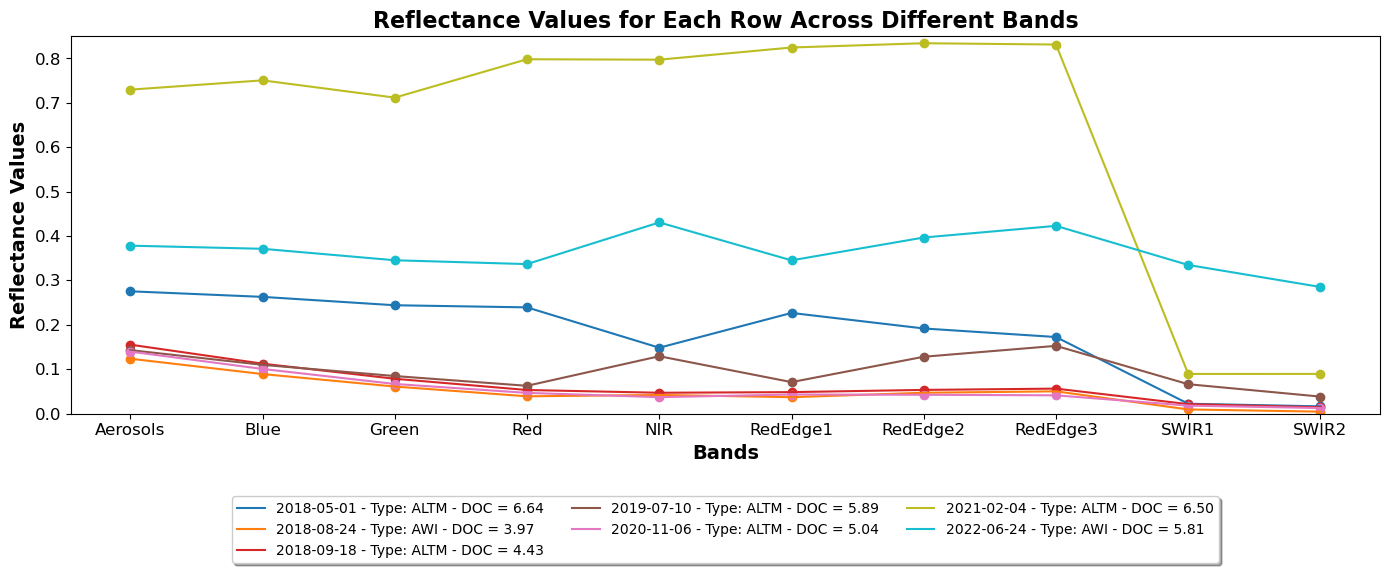

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Select the columns for bands and corresponding reflectance values
bands = ['Aerosols', 'Blue', 'Green', 'Red', 'NIR',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'SWIR1', 'SWIR2']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Define a color palette for the lines
color_palette = plt.cm.tab10(np.linspace(0, 1, len(df_all_lakes_ALTM_1)))

# Iterate over each row in the DataFrame
for i, (index, row) in enumerate(df_all_lakes_ALTM_1.iterrows()):
    # Extract the reflectance values for the current row
    reflectance_values = row[bands].values
    
    # Format the legend label including date, siteID, and DOC_MG_L value
    legend_label = f'{row["DATE_SMP"]} - Type: {row["TYPE"]} - DOC = {row["DOC_MG_L"]:.2f}'
    
    # Plot the reflectance values for the current row as a single line
    ax.plot(reflectance_values, color=color_palette[i], linestyle='-', label=legend_label)  # Format DOC to 2 decimal places
    
    # Plot scatter points for the reflectance values
    ax.scatter(range(len(bands)), reflectance_values, color=color_palette[i], marker='o')

# Set labels and title with increased fontsize
ax.set_xlabel('Bands', fontsize=14, fontweight='bold')
ax.set_ylabel('Reflectance Values', fontsize=14, fontweight='bold')
ax.set_title('Reflectance Values for Each Row Across Different Bands', fontsize=16, fontweight='bold')

# Set x-axis ticks and labels to be the band names
ax.set_xticks(range(len(bands)))
ax.set_xticklabels(bands)

# Increase fontsize for tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Show the legend for lines below x-axis
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=3)

# Show the plot
plt.tight_layout()
plt.ylim(0, 0.85)
plt.show()


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import ee
import geemap
Map= geemap.Map()

# Initialize Earth Engine
ee.Initialize()

S2_BANDS = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B11', 'B12', 'QA60']
STD_NAMES = ['Aerosols', 'Blue', 'Green', 'Red',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR', 'SWIR1',
            'SWIR2', 'Cloudmask']

# Define the function to mask clouds and cloud shadows from Sentinel-2 imagery
def maskS2clouds(image):
    qa = image.select('QA60')
    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11

    # Create the cloud mask
    cloudMask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))

    # Apply the cloud mask to the image
    maskedImage = image.updateMask(cloudMask)

    return maskedImage

# Define the function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=20).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)




# Create a point geometry for the lake
lake_point = ee.Geometry.Point(-74.853690, 43.819986)

# Create a 100-meter buffered box around the lake point
lake_bbox = lake_point.buffer(100).bounds()

# 2018-05-01 6.637400238 1A1-103
# 2018-08-24 3.97 AWI00063
# 2018-09-18  4.428199917 1A1-103
# 2019-07-10 5.88829999 1A1-103
# 2020-11-06  5.042799969 1A1-103
# 2021-02-04 6.499599775 1A1-103
# 2022-06-24 5.806 AWI00063


# Define the date range
date_start = '2018-04-30'
date_end = '2018-05-03'  # 2018-05-01 DOC= 6.6374

# Convert date strings to EE date objects
date_start = ee.Date(date_start)
date_end = ee.Date(date_end)

# Retrieve Sentinel-2 images within the bounding box and filter by date
s2 = ee.ImageCollection("COPERNICUS/S2") \
    .filterBounds(lake_bbox) \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 25)) \
    .filterDate(date_start, date_end) \
    .map(maskS2clouds) \
    .select(S2_BANDS, STD_NAMES)

# Map the reflectance function over the Sentinel-2 ImageCollection
s2 = s2.map(lambda img: reflectance(img, lake_bbox))

# Clip the image collection to the lake geometry
s2_clipped = s2.map(lambda image: image.clip(lake_bbox))

# Initialize the map
Map = geemap.Map()

# Add the clipped Sentinel-2 image to the map in RGB visualization
Map.addLayer(s2_clipped, {'bands': ['Red', 'Green', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 RGB (Clipped)')
Map.addLayer(s2, {'bands': ['Red', 'Green', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 RGB Refl(NOT Clipped)')

Map.addLayer(s2_clipped, {'bands': ['NIR', 'Red', 'Green'], 'min': 0, 'max': 3000}, 'Sentinel-2 NRG (Clipped)')
Map.addLayer(s2, {'bands': ['NIR', 'Red', 'Green'], 'min': 0, 'max': 3000}, 'Sentinel-2 NRG (NOT Clipped)')

Map.addLayer(s2_clipped, {'bands': ['Aerosols', 'Red', 'Green'], 'min': 0, 'max': 3000}, 'Sentinel-2 ARG (Clipped)')
Map.addLayer(s2, {'bands': ['Aerosols', 'Red', 'Green'], 'min': 0, 'max': 3000}, 'Sentinel-2 ARG (NOT Clipped)')

# Add the clipped Sentinel-2 image to the map with shuffled bands in SWIR visualization
Map.addLayer(s2_clipped, {'bands': ['SWIR1', 'NIR', 'Red'], 'min': 0, 'max': 3000}, 'Sentinel-2 SWIR (Clipped)')

# Add the Sentinel-2 image without clipping with shuffled bands in SWIR visualization
Map.addLayer(s2, {'bands': ['SWIR1', 'NIR', 'Red'], 'min': 0, 'max': 3000}, 'Sentinel-2 SWIR (NOT Clipped)')

# Add the clipped Sentinel-2 image with shuffled bands in Red Edge visualization
Map.addLayer(s2_clipped, {'bands': ['RedEdge1', 'RedEdge2', 'RedEdge3'], 'min': 0, 'max': 3000}, 'Sentinel-2 Red Edge (Clipped)')

# Add the Sentinel-2 image without clipping with shuffled bands in Red Edge visualization
Map.addLayer(s2, {'bands': ['RedEdge1', 'RedEdge2', 'RedEdge3'], 'min': 0, 'max': 3000}, 'Sentinel-2 Red Edge (NOT Clipped)')

# Add the clipped Sentinel-2 image with shuffled bands in Aerosol visualization
Map.addLayer(s2_clipped, {'bands': ['Aerosols', 'Red', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 Aerosol (Clipped)')

# Add the Sentinel-2 image without clipping with shuffled bands in Aerosol visualization
Map.addLayer(s2, {'bands': ['Aerosols', 'Red', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 Aerosol (NOT Clipped)')


# Center the map on the lake point
Map.centerObject(lake_point, 16)

# Display the map
Map


Map(center=[43.819986, -74.85369], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Sear…

In [14]:
# Get the number of images in the ImageCollection
num_images = s2.size().getInfo()
print("Number of images:", num_images)

# Get the dates of the images
dates = s2.aggregate_array('system:time_start').getInfo()
print("Dates of the images:")
for date in dates:
    print(ee.Date(date).format('YYYY-MM-dd').getInfo())


Number of images: 1
Dates of the images:
2018-05-01


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import ee
import geemap
Map= geemap.Map()

# Initialize Earth Engine
ee.Initialize()

S2_BANDS = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B11', 'B12', 'QA60']
STD_NAMES = ['Aerosols', 'Blue', 'Green', 'Red',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR', 'SWIR1',
            'SWIR2', 'Cloudmask']

# Define the function to mask clouds and cloud shadows from Sentinel-2 imagery
def maskS2clouds(image):
    qa = image.select('QA60')
    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11

    # Create the cloud mask
    cloudMask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))

    # Apply the cloud mask to the image
    maskedImage = image.updateMask(cloudMask)

    return maskedImage

# Define the function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=20).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)




# Create a point geometry for the lake
lake_point = ee.Geometry.Point(-74.853690, 43.819986)

# Create a 100-meter buffered box around the lake point
lake_bbox = lake_point.buffer(100).bounds()

# Define the date range
date_start = '2018-08-23'
date_end = '2018-08-25'  # DOC= 3.9700	2018-08-24

# Convert date strings to EE date objects
date_start = ee.Date(date_start)
date_end = ee.Date(date_end)

# Retrieve Sentinel-2 images within the bounding box and filter by date
s2_1 = ee.ImageCollection("COPERNICUS/S2") \
    .filterBounds(lake_bbox) \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 50)) \
    .filterDate(date_start, date_end) \
    .map(maskS2clouds) \
    .select(S2_BANDS, STD_NAMES)

# Map the reflectance function over the Sentinel-2 ImageCollection
s2_1 = s2_1.map(lambda img: reflectance(img, lake_bbox))

# Clip the image collection to the lake geometry
s2_clipped = s2_1.map(lambda image: image.clip(lake_bbox))

# Initialize the map
Map = geemap.Map()

# Add the clipped Sentinel-2 image to the map in RGB visualization
Map.addLayer(s2_clipped, {'bands': ['Red', 'Green', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 RGB (Clipped)')
Map.addLayer(s2_1, {'bands': ['Red', 'Green', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 RGB Refl(NOT Clipped)')

Map.addLayer(s2_clipped, {'bands': ['NIR', 'Red', 'Green'], 'min': 0, 'max': 3000}, 'Sentinel-2 NRG (Clipped)')
Map.addLayer(s2_1, {'bands': ['NIR', 'Red', 'Green'], 'min': 0, 'max': 3000}, 'Sentinel-2 NRG (NOT Clipped)')

Map.addLayer(s2_clipped, {'bands': ['Aerosols', 'Red', 'Green'], 'min': 0, 'max': 3000}, 'Sentinel-2 ARG (Clipped)')
Map.addLayer(s2_1, {'bands': ['Aerosols', 'Red', 'Green'], 'min': 0, 'max': 3000}, 'Sentinel-2 ARG (NOT Clipped)')

# Add the clipped Sentinel-2 image to the map with shuffled bands in SWIR visualization
Map.addLayer(s2_clipped, {'bands': ['SWIR1', 'NIR', 'Red'], 'min': 0, 'max': 3000}, 'Sentinel-2 SWIR (Clipped - Shuffled)')

# Add the Sentinel-2 image without clipping with shuffled bands in SWIR visualization
Map.addLayer(s2_1, {'bands': ['SWIR1', 'NIR', 'Red'], 'min': 0, 'max': 3000}, 'Sentinel-2 SWIR (NOT Clipped - Shuffled)')

# Add the clipped Sentinel-2 image with shuffled bands in Red Edge visualization
Map.addLayer(s2_clipped, {'bands': ['RedEdge1', 'RedEdge2', 'RedEdge3'], 'min': 0, 'max': 3000}, 'Sentinel-2 Red Edge (Clipped - Shuffled)')

# Add the Sentinel-2 image without clipping with shuffled bands in Red Edge visualization
Map.addLayer(s2_1, {'bands': ['RedEdge1', 'RedEdge2', 'RedEdge3'], 'min': 0, 'max': 3000}, 'Sentinel-2 Red Edge (NOT Clipped - Shuffled)')

# Add the clipped Sentinel-2 image with shuffled bands in Aerosol visualization
Map.addLayer(s2_clipped, {'bands': ['Aerosols', 'Red', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 Aerosol (Clipped - Shuffled)')

# Add the Sentinel-2 image without clipping with shuffled bands in Aerosol visualization
Map.addLayer(s2_1, {'bands': ['Aerosols', 'Red', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 Aerosol (NOT Clipped - Shuffled)')

# Add the clipped Sentinel-2 image to the map with shuffled bands in SWIR visualization
Map.addLayer(s2_clipped, {'bands': ['SWIR1', 'NIR', 'Red'], 'min': 0, 'max': 3000}, 'Sentinel-2 SWIR (Clipped)')

# Add the Sentinel-2 image without clipping with shuffled bands in SWIR visualization
Map.addLayer(s2_1, {'bands': ['SWIR1', 'NIR', 'Red'], 'min': 0, 'max': 3000}, 'Sentinel-2 SWIR (NOT Clipped)')

# Add the clipped Sentinel-2 image with shuffled bands in Red Edge visualization
Map.addLayer(s2_clipped, {'bands': ['RedEdge1', 'RedEdge2', 'RedEdge3'], 'min': 0, 'max': 3000}, 'Sentinel-2 Red Edge (Clipped)')

# Add the Sentinel-2 image without clipping with shuffled bands in Red Edge visualization
Map.addLayer(s2_1, {'bands': ['RedEdge1', 'RedEdge2', 'RedEdge3'], 'min': 0, 'max': 3000}, 'Sentinel-2 Red Edge (NOT Clipped)')

# Add the clipped Sentinel-2 image with shuffled bands in Aerosol visualization
Map.addLayer(s2_clipped, {'bands': ['Aerosols', 'Red', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 Aerosol (Clipped)')

# Add the Sentinel-2 image without clipping with shuffled bands in Aerosol visualization
Map.addLayer(s2_1, {'bands': ['Aerosols', 'Red', 'Blue'], 'min': 0, 'max': 3000}, 'Sentinel-2 Aerosol (NOT Clipped)')



# Center the map on the lake point
Map.centerObject(lake_point, 16)

# Display the map
Map


In [16]:
import ee
import geemap
import pandas as pd

# Initialize Earth Engine
ee.Initialize()

Map = geemap.Map()


S2_BANDS = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B11', 'B12', 'QA60']
STD_NAMES = ['Aerosols', 'Blue', 'Green', 'Red',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR', 'SWIR1',
            'SWIR2', 'Cloudmask']

# Define the function to mask clouds and cloud shadows from Sentinel-2 imagery
def maskS2clouds(image):
    qa = image.select('QA60')
    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11

    # Create the cloud mask
    cloudMask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))

    # Apply the cloud mask to the image
    maskedImage = image.updateMask(cloudMask)

    return maskedImage


# Define the function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=20).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# Loop through each lake in the DataFrame
for index, row in ALTM_ADK_ALAP_DATA.iterrows():
    # Extract lake information
    pondId = row['SITE_ID']
    pondname = row['SITE_NAME']
    date = row['DATE_SMP']
    doc = row['DOC_MG_L']
    depth_mean = row['LAKE_DEPTH_MEAN']

    df_all_lakes_ALTM['DATE_SMP'] = pd.to_datetime(df_all_lakes_ALTM['DATE_SMP'])
    ALTM_ADK_ALAP_DATA['DATE_SMP'] = pd.to_datetime(ALTM_ADK_ALAP_DATA['DATE_SMP'])

    ALTM_ADK_ALAP_DATA.sort_values('DATE_SMP', inplace=True)
    df_all_lakes_ALTM.sort_values('DATE_SMP', inplace=True)

    # Create a 2-day window around the current date
    date_window_start = date - pd.Timedelta(days=3)
    date_window_end = date + pd.Timedelta(days=3)

    # Create a point geometry for the lake
    # lake_point = ee.Geometry.Point(-74.85378870496741, 43.820318956445064)
    # lake_point = ee.Geometry.Point(-74.85694061002162, 43.82139228666019)
    # lake_point = ee.Geometry.Point(-74.84646, 43.83221)
    lake_point=  ee.Geometry.Point(-74.83668927420271, 43.83446293404302)


    # Create a 100-meter buffered box around the lake point
    # lake_bbox = lake_point.buffer(100).bounds()
    lake_bbox = lake_point.buffer(100)

    # Retrieve Sentinel-2 images within the bounding box
    s2 = ee.ImageCollection("COPERNICUS/S2") \
        .filterBounds(lake_bbox) \
        .filter(ee.Filter.calendarRange(2015, 2024, 'year')) \
        .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 50)) \
        .filterDate(date_window_start, date_window_end) \
        .map(maskS2clouds) \
        .select(S2_BANDS, STD_NAMES)

    # Map the reflectance function over the Sentinel-2 ImageCollection
    map_reflectance = s2.map(lambda img: reflectance(img, lake_bbox))

    # Resample the image to 20 meters
    map_resampled = map_reflectance.map(lambda img: img.reproject(crs=img.projection(), scale=20))

    # Reduce the mapped image collection to get reflectance values for the lake
    list_reflectance = map_resampled.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v/10000 for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)

    # Add lake information to DataFrame
    df_reflectance['SITE_ID'] = pondId
    df_reflectance['SITE_NAME'] = pondname
    df_reflectance['DOC_MG_L'] = doc
    df_reflectance['DATE'] = date
    df_reflectance['LAKE_DEPTH_MEAN'] = depth_mean

    # Add the DataFrame to the list
    dfs.append(df_reflectance)

# Concatenate all DataFrames into a single DataFrame
df_all_lakes_ALTM = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes_ALTM.sort_values(by='DATE_SMP', inplace=True)

# Drop rows with NaN values
df_all_lakes_ALTM.dropna(inplace=True)


In [6]:
import ee
import geemap
import pandas as pd

# Initialize Earth Engine
ee.Initialize()

Map = geemap.Map()


S2_BANDS = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B11', 'B12', 'QA60']
STD_NAMES = ['Aerosols', 'Blue', 'Green', 'Red',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR', 'SWIR1',
            'SWIR2', 'Cloudmask']

# Define the function to mask clouds and cloud shadows from Sentinel-2 imagery
def maskS2clouds(image):
    qa = image.select('QA60')
    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11

    # Create the cloud mask
    cloudMask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))

    # Apply the cloud mask to the image
    maskedImage = image.updateMask(cloudMask)

    return maskedImage


# Define the function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=20).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# Loop through each lake in the DataFrame
for index, row in ALTM_ADK_ALAP_DATA.iterrows():
    # Extract lake information
    pondId = row['SITE_ID']
    pondname = row['SITE_NAME']
    longitude = row['LONGITUDE']
    latitude = row['LATITUDE']
	
    # # Create a 2-day window around the current date
    # date_window_start = date - pd.Timedelta(days=17)
    # date_window_end = date + pd.Timedelta(days=17)


    
    lake_point=  ee.Geometry.Point(longitude, latitude)


    # Create a 100-meter buffered box around the lake point
    # lake_bbox = lake_point.buffer(100).bounds()
    lake_bbox = lake_point.buffer(100).bounds()

    # Retrieve Sentinel-2 images within the bounding box
    s2 = ee.ImageCollection("COPERNICUS/S2_HARMONIZED") \
        .filterBounds(lake_bbox) \
        .filter(ee.Filter.calendarRange(2015, 2024, 'year')) \
        .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 50)) \
        .map(maskS2clouds) \
        .select(S2_BANDS, STD_NAMES)

    # Map the reflectance function over the Sentinel-2 ImageCollection
    map_reflectance = s2.map(lambda img: reflectance(img, lake_bbox))

    # Resample the image to 20 meters
    map_resampled = map_reflectance.map(lambda img: img.reproject(crs=img.projection(), scale=20))

    # Reduce the mapped image collection to get reflectance values for the lake
    list_reflectance = map_resampled.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v/10000 for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)

    # Add lake information to DataFrame
    df_reflectance['SITE_ID'] = pondId
    df_reflectance['SITE_NAME'] = pondname
    

    # Add the DataFrame to the list
    dfs.append(df_reflectance)

# Concatenate all DataFrames into a single DataFrame
df_all_lakes_ALTM = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes_ALTM.sort_values(by='DATE_SMP', inplace=True)

# Drop rows with NaN values
df_all_lakes_ALTM.dropna(inplace=True)


In [7]:
df_all_lakes_ALTM

,DATE_SMP,Aerosols,Blue,Cloudmask,Green,NIR,Red,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2,SITE_ID,SITE_NAME
5071,2016-03-22,0.468781,0.482461,0.0,0.458863,0.483809,0.491056,0.497971,0.505363,0.499364,0.114786,0.099726,1A1-103,Big Moose Lake
3888,2016-03-22,0.468781,0.482461,0.0,0.458863,0.483809,0.491056,0.497971,0.505363,0.499364,0.114786,0.099726,1A1-103,Big Moose Lake
8451,2016-03-22,0.468781,0.482461,0.0,0.458863,0.483809,0.491056,0.497971,0.505363,0.499364,0.114786,0.099726,1A1-103,Big Moose Lake
3212,2016-03-22,0.468781,0.482461,0.0,0.458863,0.483809,0.491056,0.497971,0.505363,0.499364,0.114786,0.099726,1A1-103,Big Moose Lake
7775,2016-03-22,0.468781,0.482461,0.0,0.458863,0.483809,0.491056,0.497971,0.505363,0.499364,0.114786,0.099726,1A1-103,Big Moose Lake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,2023-12-21,0.139434,0.094904,0.0,0.055672,0.019913,0.034099,0.029842,0.026965,0.023609,0.003590,0.002255,1A1-103,Big Moose Lake
4731,2023-12-21,0.139434,0.094904,0.0,0.055672,0.019913,0.034099,0.029842,0.026965,0.023609,0.003590,0.002255,1A1-103,Big Moose Lake
6928,2023-12-21,0.139434,0.094904,0.0,0.055672,0.019913,0.034099,0.029842,0.026965,0.023609,0.003590,0.002255,1A1-103,Big Moose Lake
1689,2023-12-21,0.139434,0.094904,0.0,0.055672,0.019913,0.034099,0.029842,0.026965,0.023609,0.003590,0.002255,1A1-103,Big Moose Lake


In [8]:
df_all_lakes_ALTM['DATE_SMP'] = pd.to_datetime(df_all_lakes_ALTM['DATE_SMP'])
ALTM_ADK_ALAP_DATA['DATE_SMP'] = pd.to_datetime(ALTM_ADK_ALAP_DATA['DATE_SMP'])

ALTM_ADK_ALAP_DATA.sort_values('DATE_SMP', inplace=True)
df_all_lakes_ALTM.sort_values('DATE_SMP', inplace=True)


merged_data_3DAYS = pd.merge_asof(ALTM_ADK_ALAP_DATA, df_all_lakes_ALTM, on='DATE_SMP', by=['SITE_NAME', 'SITE_ID'] , tolerance=pd.Timedelta(days=3))

# Drop rows where the 'Reflectance' column is null
merged_data_3DAYS = merged_data_3DAYS.dropna(subset=['Blue'])

# Display the updated DataFrame
merged_data_3DAYS

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,Green,NIR,Red,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2
31,1A1-103,2017-08-02,6.1174,Big Moose Lake,6.8,0.099087,0.066703,0.0,0.041374,0.018868,0.023707,0.020945,0.022978,0.023130,0.004833,0.002444
38,1A1-103,2018-05-02,6.6374,Big Moose Lake,6.8,0.280535,0.268131,0.0,0.249423,0.155892,0.245906,0.234965,0.200407,0.181098,0.019837,0.014396
40,AWI00063,2018-08-25,3.9700,Big Moose Lake,21.3,0.123661,0.088888,0.0,0.060859,0.041902,0.038797,0.036807,0.046772,0.050046,0.009226,0.004237
41,1A1-103,2018-09-18,4.4282,Big Moose Lake,6.8,0.185221,0.140870,0.0,0.108239,0.097137,0.087413,0.085371,0.100936,0.109942,0.069677,0.048835
50,AWI00063,2019-09-16,5.0400,Big Moose Lake,21.3,0.110564,0.076262,0.0,0.050181,0.035160,0.031775,0.031307,0.038193,0.039864,0.015547,0.009940
55,AWI00063,2020-08-26,4.9400,Big Moose Lake,21.3,0.108310,0.074409,0.0,0.048429,0.024986,0.028619,0.025714,0.029711,0.031216,0.006262,0.003002
66,AWI00063,2022-06-25,5.8060,Big Moose Lake,21.3,0.224756,0.200743,0.0,0.173759,0.223166,0.160636,0.166105,0.201125,0.220225,0.159495,0.128389


In [ ]:
# merged_data_3DAYS['DOC_Formula_input1'] = merged_data_3DAYS['RedEdge2'] - merged_data_3DAYS['RedEdge3']
# merged_data_3DAYS['DOC_Formula_input2'] = merged_data_3DAYS['RedEdge2'] / merged_data_3DAYS['RedEdge3']
# merged_data_3DAYS['DOC_Formula_input3'] = (merged_data_3DAYS['RedEdge3'] - merged_data_3DAYS['RedEdge2']) / (merged_data_3DAYS['RedEdge2'] + merged_data_3DAYS['RedEdge3'])
# merged_data_3DAYS['DOC_Formula_input4'] = merged_data_3DAYS['Aerosols'] * ((1/merged_data_3DAYS['RedEdge3']) - (1/merged_data_3DAYS['RedEdge2'])) 


In [9]:
merged_data_3DAYS['DOC_Formula_input1'] = merged_data_3DAYS['RedEdge2'] - merged_data_3DAYS['RedEdge3']
merged_data_3DAYS

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,Green,NIR,Red,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2,DOC_Formula_input1
31,1A1-103,2017-08-02,6.1174,Big Moose Lake,6.8,0.099087,0.066703,0.0,0.041374,0.018868,0.023707,0.020945,0.022978,0.023130,0.004833,0.002444,-0.000152
38,1A1-103,2018-05-02,6.6374,Big Moose Lake,6.8,0.280535,0.268131,0.0,0.249423,0.155892,0.245906,0.234965,0.200407,0.181098,0.019837,0.014396,0.019309
40,AWI00063,2018-08-25,3.9700,Big Moose Lake,21.3,0.123661,0.088888,0.0,0.060859,0.041902,0.038797,0.036807,0.046772,0.050046,0.009226,0.004237,-0.003274
41,1A1-103,2018-09-18,4.4282,Big Moose Lake,6.8,0.185221,0.140870,0.0,0.108239,0.097137,0.087413,0.085371,0.100936,0.109942,0.069677,0.048835,-0.009006
50,AWI00063,2019-09-16,5.0400,Big Moose Lake,21.3,0.110564,0.076262,0.0,0.050181,0.035160,0.031775,0.031307,0.038193,0.039864,0.015547,0.009940,-0.001671
55,AWI00063,2020-08-26,4.9400,Big Moose Lake,21.3,0.108310,0.074409,0.0,0.048429,0.024986,0.028619,0.025714,0.029711,0.031216,0.006262,0.003002,-0.001505
66,AWI00063,2022-06-25,5.8060,Big Moose Lake,21.3,0.224756,0.200743,0.0,0.173759,0.223166,0.160636,0.166105,0.201125,0.220225,0.159495,0.128389,-0.019100


In [10]:
merged_data_3DAYS['DOC_Formula_input2'] = merged_data_3DAYS['RedEdge2'] / merged_data_3DAYS['RedEdge3']
merged_data_3DAYS

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,Green,NIR,Red,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2,DOC_Formula_input1,DOC_Formula_input2
31,1A1-103,2017-08-02,6.1174,Big Moose Lake,6.8,0.099087,0.066703,0.0,0.041374,0.018868,0.023707,0.020945,0.022978,0.023130,0.004833,0.002444,-0.000152,0.993435
38,1A1-103,2018-05-02,6.6374,Big Moose Lake,6.8,0.280535,0.268131,0.0,0.249423,0.155892,0.245906,0.234965,0.200407,0.181098,0.019837,0.014396,0.019309,1.106621
40,AWI00063,2018-08-25,3.9700,Big Moose Lake,21.3,0.123661,0.088888,0.0,0.060859,0.041902,0.038797,0.036807,0.046772,0.050046,0.009226,0.004237,-0.003274,0.934572
41,1A1-103,2018-09-18,4.4282,Big Moose Lake,6.8,0.185221,0.140870,0.0,0.108239,0.097137,0.087413,0.085371,0.100936,0.109942,0.069677,0.048835,-0.009006,0.918083
50,AWI00063,2019-09-16,5.0400,Big Moose Lake,21.3,0.110564,0.076262,0.0,0.050181,0.035160,0.031775,0.031307,0.038193,0.039864,0.015547,0.009940,-0.001671,0.958085
55,AWI00063,2020-08-26,4.9400,Big Moose Lake,21.3,0.108310,0.074409,0.0,0.048429,0.024986,0.028619,0.025714,0.029711,0.031216,0.006262,0.003002,-0.001505,0.951785
66,AWI00063,2022-06-25,5.8060,Big Moose Lake,21.3,0.224756,0.200743,0.0,0.173759,0.223166,0.160636,0.166105,0.201125,0.220225,0.159495,0.128389,-0.019100,0.913270


In [11]:
merged_data_3DAYS['DOC_Formula_input3'] = (merged_data_3DAYS['RedEdge3'] - merged_data_3DAYS['RedEdge2']) / (merged_data_3DAYS['RedEdge2'] + merged_data_3DAYS['RedEdge3'])
merged_data_3DAYS

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,Green,NIR,Red,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2,DOC_Formula_input1,DOC_Formula_input2,DOC_Formula_input3
31,1A1-103,2017-08-02,6.1174,Big Moose Lake,6.8,0.099087,0.066703,0.0,0.041374,0.018868,0.023707,0.020945,0.022978,0.023130,0.004833,0.002444,-0.000152,0.993435,0.003293
38,1A1-103,2018-05-02,6.6374,Big Moose Lake,6.8,0.280535,0.268131,0.0,0.249423,0.155892,0.245906,0.234965,0.200407,0.181098,0.019837,0.014396,0.019309,1.106621,-0.050613
40,AWI00063,2018-08-25,3.9700,Big Moose Lake,21.3,0.123661,0.088888,0.0,0.060859,0.041902,0.038797,0.036807,0.046772,0.050046,0.009226,0.004237,-0.003274,0.934572,0.033821
41,1A1-103,2018-09-18,4.4282,Big Moose Lake,6.8,0.185221,0.140870,0.0,0.108239,0.097137,0.087413,0.085371,0.100936,0.109942,0.069677,0.048835,-0.009006,0.918083,0.042708
50,AWI00063,2019-09-16,5.0400,Big Moose Lake,21.3,0.110564,0.076262,0.0,0.050181,0.035160,0.031775,0.031307,0.038193,0.039864,0.015547,0.009940,-0.001671,0.958085,0.021406
55,AWI00063,2020-08-26,4.9400,Big Moose Lake,21.3,0.108310,0.074409,0.0,0.048429,0.024986,0.028619,0.025714,0.029711,0.031216,0.006262,0.003002,-0.001505,0.951785,0.024703
66,AWI00063,2022-06-25,5.8060,Big Moose Lake,21.3,0.224756,0.200743,0.0,0.173759,0.223166,0.160636,0.166105,0.201125,0.220225,0.159495,0.128389,-0.019100,0.913270,0.045331


In [12]:
merged_data_3DAYS['DOC_Formula_input4'] = merged_data_3DAYS['Aerosols'] * ((1/merged_data_3DAYS['RedEdge3']) - (1/merged_data_3DAYS['RedEdge2'])) 
merged_data_3DAYS

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,Green,NIR,Red,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2,DOC_Formula_input1,DOC_Formula_input2,DOC_Formula_input3,DOC_Formula_input4
31,1A1-103,2017-08-02,6.1174,Big Moose Lake,6.8,0.099087,0.066703,0.0,0.041374,0.018868,0.023707,0.020945,0.022978,0.023130,0.004833,0.002444,-0.000152,0.993435,0.003293,-0.028310
38,1A1-103,2018-05-02,6.6374,Big Moose Lake,6.8,0.280535,0.268131,0.0,0.249423,0.155892,0.245906,0.234965,0.200407,0.181098,0.019837,0.014396,0.019309,1.106621,-0.050613,0.149251
40,AWI00063,2018-08-25,3.9700,Big Moose Lake,21.3,0.123661,0.088888,0.0,0.060859,0.041902,0.038797,0.036807,0.046772,0.050046,0.009226,0.004237,-0.003274,0.934572,0.033821,-0.172988
41,1A1-103,2018-09-18,4.4282,Big Moose Lake,6.8,0.185221,0.140870,0.0,0.108239,0.097137,0.087413,0.085371,0.100936,0.109942,0.069677,0.048835,-0.009006,0.918083,0.042708,-0.150321
50,AWI00063,2019-09-16,5.0400,Big Moose Lake,21.3,0.110564,0.076262,0.0,0.050181,0.035160,0.031775,0.031307,0.038193,0.039864,0.015547,0.009940,-0.001671,0.958085,0.021406,-0.121340
55,AWI00063,2020-08-26,4.9400,Big Moose Lake,21.3,0.108310,0.074409,0.0,0.048429,0.024986,0.028619,0.025714,0.029711,0.031216,0.006262,0.003002,-0.001505,0.951785,0.024703,-0.175769
66,AWI00063,2022-06-25,5.8060,Big Moose Lake,21.3,0.224756,0.200743,0.0,0.173759,0.223166,0.160636,0.166105,0.201125,0.220225,0.159495,0.128389,-0.019100,0.913270,0.045331,-0.096920


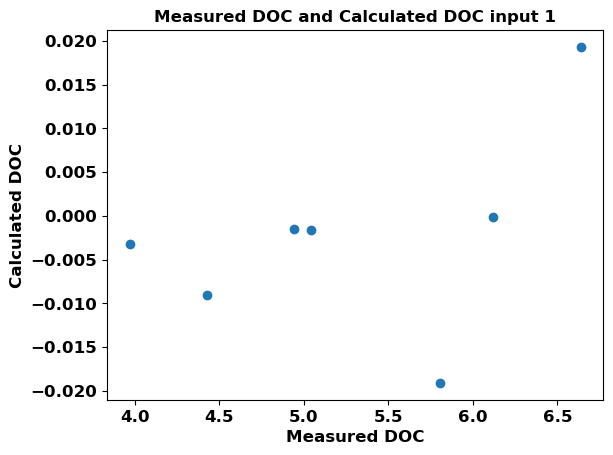

In [13]:
import matplotlib.pyplot as plt

# Assuming 'DOC_MG_L' is the column name in df_all_lakes
plt.scatter(merged_data_3DAYS['DOC_MG_L'], merged_data_3DAYS['DOC_Formula_input1'])

# Increase font size and make text bold
plt.xlabel('Measured DOC', fontsize=12, fontweight='bold')
plt.ylabel('Calculated DOC', fontsize=12, fontweight='bold')
plt.title('Measured DOC and Calculated DOC input 1', fontsize=12, fontweight='bold')

# Make numbers on axes bold
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()


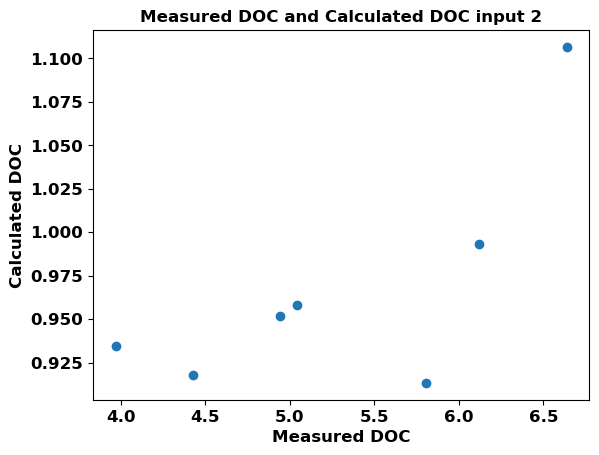

In [14]:
import matplotlib.pyplot as plt

# Assuming 'DOC_MG_L' is the column name in df_all_lakes
plt.scatter(merged_data_3DAYS['DOC_MG_L'], merged_data_3DAYS['DOC_Formula_input2'])

# Increase font size and make text bold
plt.xlabel('Measured DOC', fontsize=12, fontweight='bold')
plt.ylabel('Calculated DOC', fontsize=12, fontweight='bold')
plt.title('Measured DOC and Calculated DOC input 2', fontsize=12, fontweight='bold')

# Make numbers on axes bold
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()


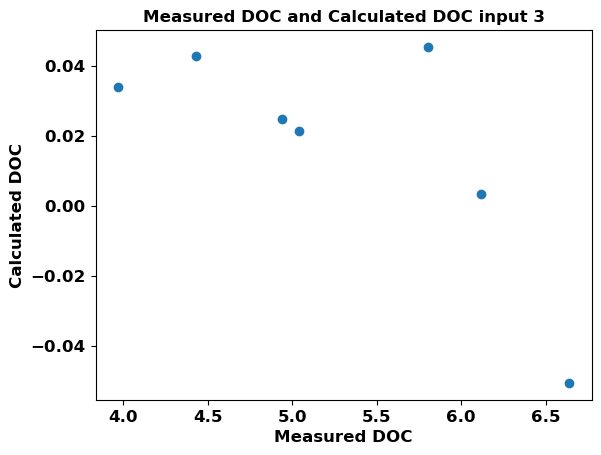

In [15]:
import matplotlib.pyplot as plt

# Assuming 'DOC_MG_L' is the column name in df_all_lakes
plt.scatter(merged_data_3DAYS['DOC_MG_L'], merged_data_3DAYS['DOC_Formula_input3'])

# Increase font size and make text bold
plt.xlabel('Measured DOC', fontsize=12, fontweight='bold')
plt.ylabel('Calculated DOC', fontsize=12, fontweight='bold')
plt.title('Measured DOC and Calculated DOC input 3', fontsize=12, fontweight='bold')

# Make numbers on axes bold
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()


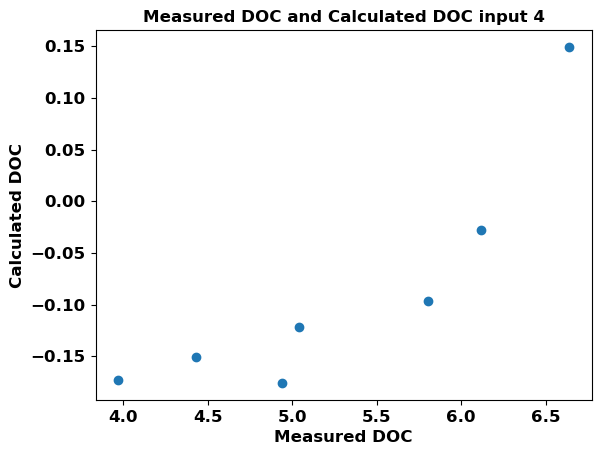

In [16]:
import matplotlib.pyplot as plt

# Assuming 'DOC_MG_L' is the column name in df_all_lakes
plt.scatter(merged_data_3DAYS['DOC_MG_L'], merged_data_3DAYS['DOC_Formula_input4'])

# Increase font size and make text bold
plt.xlabel('Measured DOC', fontsize=12, fontweight='bold')
plt.ylabel('Calculated DOC', fontsize=12, fontweight='bold')
plt.title('Measured DOC and Calculated DOC input 4', fontsize=12, fontweight='bold')

# Make numbers on axes bold
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()


In [13]:
# # Export the DataFrame to an Excel file
# merged_data_3DAYS.to_excel('bigMooseLake_unique_dates_threeDays.xlsx', index=False)


In [17]:
df_all_lakes_ALTM['DATE_SMP'] = pd.to_datetime(df_all_lakes_ALTM['DATE_SMP'])
ALTM_ADK_ALAP_DATA['DATE_SMP'] = pd.to_datetime(ALTM_ADK_ALAP_DATA['DATE_SMP'])

ALTM_ADK_ALAP_DATA.sort_values('DATE_SMP', inplace=True)
df_all_lakes_ALTM.sort_values('DATE_SMP', inplace=True)


merged_data_15DAYS = pd.merge_asof(ALTM_ADK_ALAP_DATA, df_all_lakes_ALTM, on='DATE_SMP', by=['SITE_NAME', 'SITE_ID'] , tolerance=pd.Timedelta(days=15))

# Drop rows where the 'Reflectance' column is null
merged_data_15DAYS = merged_data_15DAYS.dropna(subset=['Blue'])

# Display the updated DataFrame
merged_data_15DAYS

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,Green,NIR,Red,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2
15,1A1-103,2016-04-04,5.145200,Big Moose Lake,6.8,0.468781,0.482461,0.0,0.458863,0.483809,0.491056,0.497971,0.505363,0.499364,0.114786,0.099726
18,1A1-103,2016-07-05,4.512500,Big Moose Lake,6.8,0.109671,0.077909,0.0,0.052077,0.029977,0.033985,0.030867,0.033681,0.034086,0.014439,0.010040
19,1A1-103,2016-08-01,4.420100,Big Moose Lake,6.8,0.127648,0.094860,0.0,0.069390,0.069081,0.045686,0.047628,0.074048,0.081074,0.012170,0.004786
20,1A1-103,2016-09-07,5.252900,Big Moose Lake,6.8,0.122604,0.091817,0.0,0.067328,0.063312,0.051519,0.051696,0.064225,0.069207,0.046039,0.032604
31,1A1-103,2017-08-02,6.117400,Big Moose Lake,6.8,0.099087,0.066703,0.0,0.041374,0.018868,0.023707,0.020945,0.022978,0.023130,0.004833,0.002444
33,1A1-103,2017-10-12,5.503600,Big Moose Lake,6.8,0.107693,0.072630,0.0,0.045189,0.020625,0.026532,0.024215,0.024772,0.023903,0.006579,0.003627
34,1A1-103,2017-11-02,5.406800,Big Moose Lake,6.8,0.108457,0.072832,0.0,0.043812,0.014110,0.025351,0.021632,0.019066,0.017599,0.003539,0.001617
38,1A1-103,2018-05-02,6.637400,Big Moose Lake,6.8,0.280535,0.268131,0.0,0.249423,0.155892,0.245906,0.234965,0.200407,0.181098,0.019837,0.014396
39,1A1-103,2018-07-25,4.912800,Big Moose Lake,6.8,0.102414,0.071245,0.0,0.046469,0.024206,0.028448,0.025131,0.028093,0.028086,0.009177,0.009269
40,AWI00063,2018-08-25,3.970000,Big Moose Lake,21.3,0.123661,0.088888,0.0,0.060859,0.041902,0.038797,0.036807,0.046772,0.050046,0.009226,0.004237


In [18]:
merged_data_15DAYS['DOC_Formula_input1'] = merged_data_15DAYS['RedEdge2'] - merged_data_15DAYS['RedEdge3']
merged_data_15DAYS

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,Green,NIR,Red,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2,DOC_Formula_input1
15,1A1-103,2016-04-04,5.145200,Big Moose Lake,6.8,0.468781,0.482461,0.0,0.458863,0.483809,0.491056,0.497971,0.505363,0.499364,0.114786,0.099726,0.005999
18,1A1-103,2016-07-05,4.512500,Big Moose Lake,6.8,0.109671,0.077909,0.0,0.052077,0.029977,0.033985,0.030867,0.033681,0.034086,0.014439,0.010040,-0.000405
19,1A1-103,2016-08-01,4.420100,Big Moose Lake,6.8,0.127648,0.094860,0.0,0.069390,0.069081,0.045686,0.047628,0.074048,0.081074,0.012170,0.004786,-0.007026
20,1A1-103,2016-09-07,5.252900,Big Moose Lake,6.8,0.122604,0.091817,0.0,0.067328,0.063312,0.051519,0.051696,0.064225,0.069207,0.046039,0.032604,-0.004982
31,1A1-103,2017-08-02,6.117400,Big Moose Lake,6.8,0.099087,0.066703,0.0,0.041374,0.018868,0.023707,0.020945,0.022978,0.023130,0.004833,0.002444,-0.000152
33,1A1-103,2017-10-12,5.503600,Big Moose Lake,6.8,0.107693,0.072630,0.0,0.045189,0.020625,0.026532,0.024215,0.024772,0.023903,0.006579,0.003627,0.000869
34,1A1-103,2017-11-02,5.406800,Big Moose Lake,6.8,0.108457,0.072832,0.0,0.043812,0.014110,0.025351,0.021632,0.019066,0.017599,0.003539,0.001617,0.001467
38,1A1-103,2018-05-02,6.637400,Big Moose Lake,6.8,0.280535,0.268131,0.0,0.249423,0.155892,0.245906,0.234965,0.200407,0.181098,0.019837,0.014396,0.019309
39,1A1-103,2018-07-25,4.912800,Big Moose Lake,6.8,0.102414,0.071245,0.0,0.046469,0.024206,0.028448,0.025131,0.028093,0.028086,0.009177,0.009269,0.000007
40,AWI00063,2018-08-25,3.970000,Big Moose Lake,21.3,0.123661,0.088888,0.0,0.060859,0.041902,0.038797,0.036807,0.046772,0.050046,0.009226,0.004237,-0.003274


In [21]:
merged_data_15DAYS['DOC_Formula_input2'] = merged_data_15DAYS['RedEdge2'] / merged_data_15DAYS['RedEdge3']
merged_data_15DAYS

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,Green,NIR,Red,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2,DOC_Formula_input1,DOC_Formula_input2
15,1A1-103,2016-04-04,5.145200,Big Moose Lake,6.8,0.468781,0.482461,0.0,0.458863,0.483809,0.491056,0.497971,0.505363,0.499364,0.114786,0.099726,0.005999,1.012014
18,1A1-103,2016-07-05,4.512500,Big Moose Lake,6.8,0.109671,0.077909,0.0,0.052077,0.029977,0.033985,0.030867,0.033681,0.034086,0.014439,0.010040,-0.000405,0.988112
19,1A1-103,2016-08-01,4.420100,Big Moose Lake,6.8,0.127648,0.094860,0.0,0.069390,0.069081,0.045686,0.047628,0.074048,0.081074,0.012170,0.004786,-0.007026,0.913336
20,1A1-103,2016-09-07,5.252900,Big Moose Lake,6.8,0.122604,0.091817,0.0,0.067328,0.063312,0.051519,0.051696,0.064225,0.069207,0.046039,0.032604,-0.004982,0.928012
31,1A1-103,2017-08-02,6.117400,Big Moose Lake,6.8,0.099087,0.066703,0.0,0.041374,0.018868,0.023707,0.020945,0.022978,0.023130,0.004833,0.002444,-0.000152,0.993435
33,1A1-103,2017-10-12,5.503600,Big Moose Lake,6.8,0.107693,0.072630,0.0,0.045189,0.020625,0.026532,0.024215,0.024772,0.023903,0.006579,0.003627,0.000869,1.036368
34,1A1-103,2017-11-02,5.406800,Big Moose Lake,6.8,0.108457,0.072832,0.0,0.043812,0.014110,0.025351,0.021632,0.019066,0.017599,0.003539,0.001617,0.001467,1.083361
38,1A1-103,2018-05-02,6.637400,Big Moose Lake,6.8,0.280535,0.268131,0.0,0.249423,0.155892,0.245906,0.234965,0.200407,0.181098,0.019837,0.014396,0.019309,1.106621
39,1A1-103,2018-07-25,4.912800,Big Moose Lake,6.8,0.102414,0.071245,0.0,0.046469,0.024206,0.028448,0.025131,0.028093,0.028086,0.009177,0.009269,0.000007,1.000252
40,AWI00063,2018-08-25,3.970000,Big Moose Lake,21.3,0.123661,0.088888,0.0,0.060859,0.041902,0.038797,0.036807,0.046772,0.050046,0.009226,0.004237,-0.003274,0.934572


In [23]:
merged_data_15DAYS['DOC_Formula_input3'] = (merged_data_15DAYS['RedEdge3'] - merged_data_15DAYS['RedEdge2']) / (merged_data_15DAYS['RedEdge2'] + merged_data_15DAYS['RedEdge3'])
merged_data_15DAYS

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,Green,NIR,Red,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2,DOC_Formula_input1,DOC_Formula_input2,DOC_Formula_input3
15,1A1-103,2016-04-04,5.145200,Big Moose Lake,6.8,0.468781,0.482461,0.0,0.458863,0.483809,0.491056,0.497971,0.505363,0.499364,0.114786,0.099726,0.005999,1.012014,-0.005971
18,1A1-103,2016-07-05,4.512500,Big Moose Lake,6.8,0.109671,0.077909,0.0,0.052077,0.029977,0.033985,0.030867,0.033681,0.034086,0.014439,0.010040,-0.000405,0.988112,0.005979
19,1A1-103,2016-08-01,4.420100,Big Moose Lake,6.8,0.127648,0.094860,0.0,0.069390,0.069081,0.045686,0.047628,0.074048,0.081074,0.012170,0.004786,-0.007026,0.913336,0.045295
20,1A1-103,2016-09-07,5.252900,Big Moose Lake,6.8,0.122604,0.091817,0.0,0.067328,0.063312,0.051519,0.051696,0.064225,0.069207,0.046039,0.032604,-0.004982,0.928012,0.037338
31,1A1-103,2017-08-02,6.117400,Big Moose Lake,6.8,0.099087,0.066703,0.0,0.041374,0.018868,0.023707,0.020945,0.022978,0.023130,0.004833,0.002444,-0.000152,0.993435,0.003293
33,1A1-103,2017-10-12,5.503600,Big Moose Lake,6.8,0.107693,0.072630,0.0,0.045189,0.020625,0.026532,0.024215,0.024772,0.023903,0.006579,0.003627,0.000869,1.036368,-0.017859
34,1A1-103,2017-11-02,5.406800,Big Moose Lake,6.8,0.108457,0.072832,0.0,0.043812,0.014110,0.025351,0.021632,0.019066,0.017599,0.003539,0.001617,0.001467,1.083361,-0.040013
38,1A1-103,2018-05-02,6.637400,Big Moose Lake,6.8,0.280535,0.268131,0.0,0.249423,0.155892,0.245906,0.234965,0.200407,0.181098,0.019837,0.014396,0.019309,1.106621,-0.050613
39,1A1-103,2018-07-25,4.912800,Big Moose Lake,6.8,0.102414,0.071245,0.0,0.046469,0.024206,0.028448,0.025131,0.028093,0.028086,0.009177,0.009269,0.000007,1.000252,-0.000126
40,AWI00063,2018-08-25,3.970000,Big Moose Lake,21.3,0.123661,0.088888,0.0,0.060859,0.041902,0.038797,0.036807,0.046772,0.050046,0.009226,0.004237,-0.003274,0.934572,0.033821


In [25]:
merged_data_15DAYS['DOC_Formula_input4'] = merged_data_15DAYS['Aerosols'] * ((1/merged_data_15DAYS['RedEdge3']) - (1/merged_data_15DAYS['RedEdge2'])) 
merged_data_15DAYS

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,Green,NIR,Red,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2,DOC_Formula_input1,DOC_Formula_input2,DOC_Formula_input3,DOC_Formula_input4
15,1A1-103,2016-04-04,5.145200,Big Moose Lake,6.8,0.468781,0.482461,0.0,0.458863,0.483809,0.491056,0.497971,0.505363,0.499364,0.114786,0.099726,0.005999,1.012014,-0.005971,0.011144
18,1A1-103,2016-07-05,4.512500,Big Moose Lake,6.8,0.109671,0.077909,0.0,0.052077,0.029977,0.033985,0.030867,0.033681,0.034086,0.014439,0.010040,-0.000405,0.988112,0.005979,-0.038709
19,1A1-103,2016-08-01,4.420100,Big Moose Lake,6.8,0.127648,0.094860,0.0,0.069390,0.069081,0.045686,0.047628,0.074048,0.081074,0.012170,0.004786,-0.007026,0.913336,0.045295,-0.149396
20,1A1-103,2016-09-07,5.252900,Big Moose Lake,6.8,0.122604,0.091817,0.0,0.067328,0.063312,0.051519,0.051696,0.064225,0.069207,0.046039,0.032604,-0.004982,0.928012,0.037338,-0.137423
31,1A1-103,2017-08-02,6.117400,Big Moose Lake,6.8,0.099087,0.066703,0.0,0.041374,0.018868,0.023707,0.020945,0.022978,0.023130,0.004833,0.002444,-0.000152,0.993435,0.003293,-0.028310
33,1A1-103,2017-10-12,5.503600,Big Moose Lake,6.8,0.107693,0.072630,0.0,0.045189,0.020625,0.026532,0.024215,0.024772,0.023903,0.006579,0.003627,0.000869,1.036368,-0.017859,0.158105
34,1A1-103,2017-11-02,5.406800,Big Moose Lake,6.8,0.108457,0.072832,0.0,0.043812,0.014110,0.025351,0.021632,0.019066,0.017599,0.003539,0.001617,0.001467,1.083361,-0.040013,0.474195
38,1A1-103,2018-05-02,6.637400,Big Moose Lake,6.8,0.280535,0.268131,0.0,0.249423,0.155892,0.245906,0.234965,0.200407,0.181098,0.019837,0.014396,0.019309,1.106621,-0.050613,0.149251
39,1A1-103,2018-07-25,4.912800,Big Moose Lake,6.8,0.102414,0.071245,0.0,0.046469,0.024206,0.028448,0.025131,0.028093,0.028086,0.009177,0.009269,0.000007,1.000252,-0.000126,0.000920
40,AWI00063,2018-08-25,3.970000,Big Moose Lake,21.3,0.123661,0.088888,0.0,0.060859,0.041902,0.038797,0.036807,0.046772,0.050046,0.009226,0.004237,-0.003274,0.934572,0.033821,-0.172988


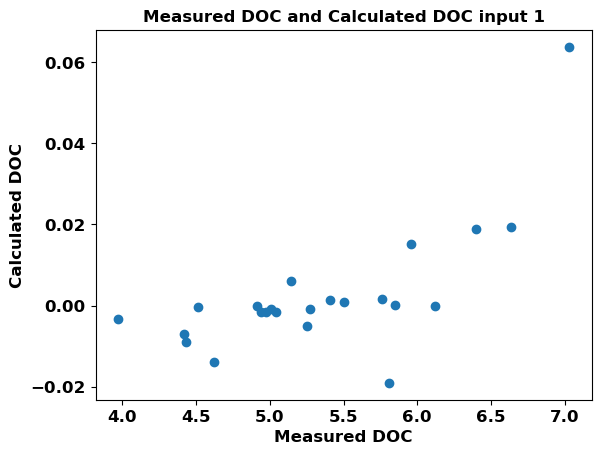

In [20]:
import matplotlib.pyplot as plt

# Assuming 'DOC_MG_L' is the column name in df_all_lakes
plt.scatter(merged_data_15DAYS['DOC_MG_L'], merged_data_15DAYS['DOC_Formula_input1'])

# Increase font size and make text bold
plt.xlabel('Measured DOC', fontsize=12, fontweight='bold')
plt.ylabel('Calculated DOC', fontsize=12, fontweight='bold')
plt.title('Measured DOC and Calculated DOC input 1', fontsize=12, fontweight='bold')

# Make numbers on axes bold
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()


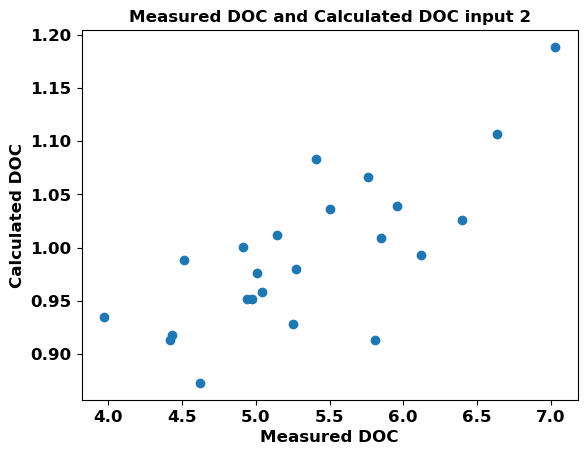

In [22]:
import matplotlib.pyplot as plt

# Assuming 'DOC_MG_L' is the column name in df_all_lakes
plt.scatter(merged_data_15DAYS['DOC_MG_L'], merged_data_15DAYS['DOC_Formula_input2'])

# Increase font size and make text bold
plt.xlabel('Measured DOC', fontsize=12, fontweight='bold')
plt.ylabel('Calculated DOC', fontsize=12, fontweight='bold')
plt.title('Measured DOC and Calculated DOC input 2', fontsize=12, fontweight='bold')

# Make numbers on axes bold
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()


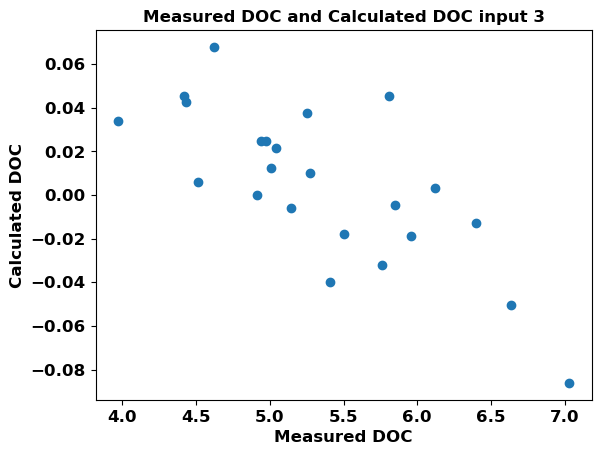

In [24]:
import matplotlib.pyplot as plt

# Assuming 'DOC_MG_L' is the column name in df_all_lakes
plt.scatter(merged_data_15DAYS['DOC_MG_L'], merged_data_15DAYS['DOC_Formula_input3'])

# Increase font size and make text bold
plt.xlabel('Measured DOC', fontsize=12, fontweight='bold')
plt.ylabel('Calculated DOC', fontsize=12, fontweight='bold')
plt.title('Measured DOC and Calculated DOC input 3', fontsize=12, fontweight='bold')

# Make numbers on axes bold
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()


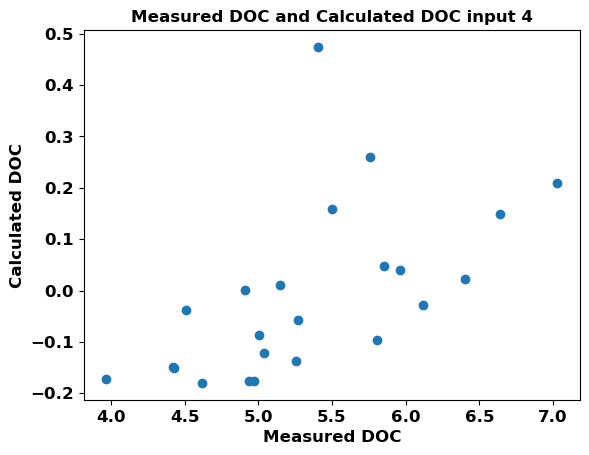

In [26]:
import matplotlib.pyplot as plt

# Assuming 'DOC_MG_L' is the column name in df_all_lakes
plt.scatter(merged_data_15DAYS['DOC_MG_L'], merged_data_15DAYS['DOC_Formula_input4'])

# Increase font size and make text bold
plt.xlabel('Measured DOC', fontsize=12, fontweight='bold')
plt.ylabel('Calculated DOC', fontsize=12, fontweight='bold')
plt.title('Measured DOC and Calculated DOC input 4', fontsize=12, fontweight='bold')

# Make numbers on axes bold
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()


In [8]:
# # Drop duplicates from the 'DATE_SMP' column
# df_all_lakes_ALTM_unique_dates = df_all_lakes_ALTM['DATE_SMP'].drop_duplicates().reset_index(drop=True)

# # Display the unique dates
# print("Unique dates:")
# print(df_all_lakes_ALTM_unique_dates)

# # Store unique dates in an Excel file
# excel_file_path = 'bigMooseLakeunique_dates.xlsx'
# df_all_lakes_ALTM_unique_dates.to_excel(excel_file_path, index=False)
# print(f"Unique dates have been saved to {excel_file_path}")


Unique dates:
0      2016-03-22
1      2016-06-10
2      2016-06-30
3      2016-07-20
4      2016-08-09
          ...    
128    2023-09-27
129    2023-10-02
130    2023-11-11
131    2023-11-16
132    2023-12-21
Name: DATE_SMP, Length: 133, dtype: object
Unique dates have been saved to bigMooseLake_unique_dates.xlsx


In [10]:
# WITH THREE Dimport ee
import geemap
import pandas as pd

# Initialize Earth Engine
ee.Initialize()

Map = geemap.Map()


S2_BANDS = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B11', 'B12', 'QA60']
STD_NAMES = ['Aerosols', 'Blue', 'Green', 'Red',  'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR', 'SWIR1',
            'SWIR2', 'Cloudmask']

# Define the function to mask clouds and cloud shadows from Sentinel-2 imagery
def maskS2clouds(image):
    qa = image.select('QA60')
    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11

    # Create the cloud mask
    cloudMask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))

    # Apply the cloud mask to the image
    maskedImage = image.updateMask(cloudMask)

    return maskedImage


# Define the function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=20).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# Loop through each lake in the DataFrame
for index, row in ALTM_ADK_ALAP_DATA.iterrows():
    # Extract lake information
    pondId = row['SITE_ID']
    pondname = row['SITE_NAME']
    date = row['DATE_SMP']
    doc = row['DOC_MG_L']
    depth_mean = row['LAKE_DEPTH_MEAN']

    # Create a 2-day window around the current date
    date_window_start = date - pd.Timedelta(days=3)
    date_window_end = date + pd.Timedelta(days=3)

    # Create a point geometry for the lake
    # lake_point = ee.Geometry.Point(-74.85378870496741, 43.820318956445064)
    # lake_point = ee.Geometry.Point(-74.85694061002162, 43.82139228666019)
    # lake_point = ee.Geometry.Point(-74.84646, 43.83221)
    lake_point=  ee.Geometry.Point(-74.83668927420271, 43.83446293404302)


    # Create a 100-meter buffered box around the lake point
    # lake_bbox = lake_point.buffer(100).bounds()
    lake_bbox = lake_point.buffer(100)

    # Retrieve Sentinel-2 images within the bounding box
    s2 = ee.ImageCollection("COPERNICUS/S2_HARMONIZED") \
        .filterBounds(lake_bbox) \
        .filter(ee.Filter.calendarRange(2015, 2024, 'year')) \
        .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 50)) \
        .filterDate(date_window_start, date_window_end) \
        .map(maskS2clouds) \
        .select(S2_BANDS, STD_NAMES)

    # Map the reflectance function over the Sentinel-2 ImageCollection
    map_reflectance = s2.map(lambda img: reflectance(img, lake_bbox))

    # Resample the image to 20 meters
    map_resampled = map_reflectance.map(lambda img: img.reproject(crs=img.projection(), scale=20))

    # Reduce the mapped image collection to get reflectance values for the lake
    list_reflectance = map_resampled.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v/10000 for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)

    # Add lake information to DataFrame
    df_reflectance['SITE_ID'] = pondId
    df_reflectance['SITE_NAME'] = pondname
    df_reflectance['DOC_MG_L'] = doc
    df_reflectance['DATE'] = date
    df_reflectance['LAKE_DEPTH_MEAN'] = depth_mean

    # Add the DataFrame to the list
    dfs.append(df_reflectance)

# Concatenate all DataFrames into a single DataFrame
df_all_lakes_ALTM = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes_ALTM.sort_values(by='DATE_SMP', inplace=True)

# Drop rows with NaN values
df_all_lakes_ALTM.dropna(inplace=True)


In [11]:
df_all_lakes_ALTM

,DATE_SMP,reflectance,SITE_ID,SITE_NAME,DOC_MG_L,DATE,LAKE_DEPTH_MEAN,Aerosols,Blue,Cloudmask,Green,NIR,Red,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2


In [41]:
import ee
import geemap
import pandas as pd

# Initialize Earth Engine
ee.Initialize()

Map = geemap.Map()

lake_point = ee.Geometry.Point(-74.83668927420271, 43.83446293404302)

S2_BANDS = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B11', 'B12', 'QA60']
STD_NAMES = ['Aerosols', 'Blue', 'Green', 'Red', 'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR', 'SWIR1',
             'SWIR2', 'Cloudmask']

# Define the function to mask clouds and cloud shadows from Sentinel-2 imagery
def maskS2clouds(image):
    qa = image.select('QA60')
    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11

    # Create the cloud mask
    cloudMask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))

    # Apply the cloud mask to the image
    maskedImage = image.updateMask(cloudMask).divide(10000)

    return maskedImage


# Define the function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    # Extract date from system:index
    date_str = ee.String(ee.Image(img).get('system:index')).slice(0, 15)
    year = ee.Number.parse(date_str.slice(0, 4))
    month = ee.Number.parse(date_str.slice(4, 6))

    # Set the system time to the start of the month
    system_time_start = ee.Date.fromYMD(year, month, 1)

    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=20).select(STD_NAMES)

    return img.set('system:time_start', system_time_start).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# Loop through each lake in the DataFrame
for index, row in ALTM_ADK_ALAP_DATA.iterrows():
    # Extract lake information
    pondId = row['SITE_ID']
    pondname = row['SITE_NAME']
    date = row['DATE_SMP']
    doc = row['DOC_MG_L']
    depth_mean = row['LAKE_DEPTH_MEAN']

    # Create a 2-day window around the current date
    date_window_start = date - pd.Timedelta(days=15)
    date_window_end = date + pd.Timedelta(days=15)

    # Create a point geometry for the lake
    lake_point = ee.Geometry.Point(-74.83668927420271, 43.83446293404302)

    # Create a 100-meter buffered box around the lake point
    lake_bbox = lake_point.buffer(200).bounds()

    # Retrieve Sentinel-2 images within the bounding box
    s2 = ee.ImageCollection("COPERNICUS/S2_HARMONIZED") \
        .filterBounds(lake_bbox) \
        .filter(ee.Filter.calendarRange(2015, 2024, 'year')) \
        .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 50)) \
        .map(maskS2clouds) \
        .select(S2_BANDS, STD_NAMES)

    # Map the reflectance function over the Sentinel-2 ImageCollection
    map_reflectance = s2.map(lambda img: reflectance(img, lake_bbox))

    # Reduce the mapped image collection to get reflectance values for the lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['system:time_start', 'reflectance']).values().get(0)

    # Convert list_reflectance to a list of dictionaries
    list_reflectance_list = list_reflectance.getInfo()

    # Extract dates and reflectance values from dictionaries
    dates = [x['system:time_start'] for x in list_reflectance_list]
    reflectance_values = [x['reflectance'] for x in list_reflectance_list]

    # Convert dates to pandas datetime objects
    df_reflectance = pd.DataFrame()
    df_reflectance['system:time_start'] = pd.to_datetime(dates)

    # Convert reflectance values to numeric and divide by 10,000
    for i, band_name in enumerate(STD_NAMES):
        df_reflectance[band_name] = [x[band_name] / 10000 for x in reflectance_values]

    # Add lake information to DataFrame
    df_reflectance['SITE_ID'] = pondId
    df_reflectance['SITE_NAME'] = pondname
    df_reflectance['DOC_MG_L'] = doc
    df_reflectance['DATE'] = date
    df_reflectance['LAKE_DEPTH_MEAN'] = depth_mean

    # Add the DataFrame to the list
    dfs.append(df_reflectance)

# Concatenate all DataFrames into a single DataFrame
df_all_lakes_ALTM_3 = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'system:time_start' in ascending order
df_all_lakes_ALTM_3.sort_values(by='system:time_start', inplace=True)

# Drop rows with NaN values
df_all_lakes_ALTM_3.dropna(inplace=True)


TypeError: list indices must be integers or slices, not str

In [46]:
import ee
import geemap
import pandas as pd
from datetime import datetime

# Initialize Earth Engine
ee.Initialize()

Map = geemap.Map()

lake_point = ee.Geometry.Point(-74.83668927420271, 43.83446293404302)

S2_BANDS = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B11', 'B12', 'QA60']
STD_NAMES = ['Aerosols', 'Blue', 'Green', 'Red', 'RedEdge1', 'RedEdge2', 'RedEdge3', 'NIR', 'SWIR1',
             'SWIR2', 'Cloudmask']

# Define the function to mask clouds and cloud shadows from Sentinel-2 imagery
def maskS2clouds(image):
    qa = image.select('QA60')
    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11

    # Create the cloud mask
    cloudMask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))

    # Apply the cloud mask to the image
    maskedImage = image.updateMask(cloudMask).divide(10000)

    return maskedImage


# Define the function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    # Extract date from system:index
    date_str = ee.String(ee.Image(img).get('system:index')).slice(0, 15)
    year = ee.Number.parse(date_str.slice(0, 4))
    month = ee.Number.parse(date_str.slice(4, 6))

    # Set the system time to the start of the month
    system_time_start = ee.Date.fromYMD(year, month, 1)

    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=20).select(STD_NAMES)

    return img.set('system:time_start', system_time_start).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# Loop through each lake in the DataFrame
for index, row in ALTM_ADK_ALAP_DATA.iterrows():
    # Extract lake information
    pondId = row['SITE_ID']
    pondname = row['SITE_NAME']
    date = row['DATE_SMP']
    doc = row['DOC_MG_L']
    depth_mean = row['LAKE_DEPTH_MEAN']

    # Create a 2-day window around the current date
    date_window_start = date - pd.Timedelta(days=15)
    date_window_end = date + pd.Timedelta(days=15)

    # Create a point geometry for the lake
    lake_point = ee.Geometry.Point(-74.83668927420271, 43.83446293404302)

    # Create a 100-meter buffered box around the lake point
    lake_bbox = lake_point.buffer(200).bounds()

    # Retrieve Sentinel-2 images within the bounding box
    s2 = ee.ImageCollection("COPERNICUS/S2_HARMONIZED") \
        .filterBounds(lake_bbox) \
        .filter(ee.Filter.calendarRange(2015, 2024, 'year')) \
        .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 50)) \
        .map(maskS2clouds) \
        .select(S2_BANDS, STD_NAMES)

    # Map the reflectance function over the Sentinel-2 ImageCollection
    map_reflectance = s2.map(lambda img: reflectance(img, lake_bbox))

    # Reduce the mapped image collection to get reflectance values for the lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['system:time_start', 'reflectance']).values().get(0)

    # Convert list_reflectance to a list of dictionaries
    list_reflectance_list = list_reflectance.getInfo()

    # Extract dates and reflectance values from dictionaries
    dates = [datetime.fromtimestamp(x['value']['value'][0] / 1000) for x in list_reflectance_list]
    reflectance_values = [x['value']['value'][1] for x in list_reflectance_list]

    # Create a DataFrame with dates and reflectance values
    df_lake = pd.DataFrame({'system:time_start': dates, 'reflectance': reflectance_values})

    # Add additional lake information to DataFrame
    df_lake['SITE_ID'] = pondId
    df_lake['SITE_NAME'] = pondname
    df_lake['DOC_MG_L'] = doc
    df_lake['DATE'] = date
    df_lake['LAKE_DEPTH_MEAN'] = depth_mean

    # Add the DataFrame to the list
    dfs.append(df_lake)

# Concatenate all DataFrames into a single DataFrame
df_all_lakes = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'system:time_start' in ascending order
df_all_lakes.sort_values(by='system:time_start', inplace=True)

# Drop rows with NaN values
df_all_lakes.dropna(inplace=True)


TypeError: list indices must be integers or slices, not str

In [29]:

# Create a point geometry for the lake
import ee
import geemap 

Map= geemap.Map()

ee.Initialize()

lake_point=  ee.Geometry.Point(-74.8359591, 43.8349136)
lake_bbox = lake_point.buffer(100).bounds()


Map.addLayer(lake_point)
Map.centerObject(lake_point, 16)
Map

Map(center=[43.8349136, -74.8359591], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=S…

In [32]:
	

# Create a point geometry for the lake
import ee
import geemap 

Map= geemap.Map()

ee.Initialize()

lake_point_2=  ee.Geometry.Point(-74.85611, 43.81687)
lake_bbox_2 = lake_point.buffer(100).bounds()



Map.addLayer(lake_point_2)
Map.centerObject(lake_point_2, 16)
Map

Map(center=[43.81687, -74.85611], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Searc…

In [33]:
# Create a point geometry for the lake
import ee
import geemap 

Map= geemap.Map()

ee.Initialize()

lake_point_3=  ee.Geometry.Point(-74.84646, 43.83221)
lake_bbox_3 = lake_point.buffer(100).bounds()



Map.addLayer(lake_point_3)
Map.centerObject(lake_point_3, 16)
Map

Map(center=[43.83221000000001, -74.84646], controls=(WidgetControl(options=['position', 'transparent_bg'], wid…

In [ ]:
df_all_lakes_ALTM_3

In [ ]:
# Create a point geometry for the lake
import ee
import geemap 

Map= geemap.Map()

ee.Initialize()

lake_point=  ee.Geometry.Point(-74.83668927420271, 43.83446293404302)
lake_bbox = lake_point.buffer(100).bounds()


Map.addLayer(lake_bbox)
Map.centerObject(lake_bbox, 16)
Map

In [8]:
# Create a point geometry for the lake
import ee
import geemap 

Map= geemap.Map()

ee.Initialize()

lake_point_1 = ee.Geometry.Point(-74.85378870496741, 43.820318956445064)
lake_point_2 = ee.Geometry.Point(-74.85694061002162, 43.82139228666019)
lake_point_3 = ee.Geometry.Point(-74.84646, 43.83221)
lake_point_4=  ee.Geometry.Point(-74.83668927420271, 43.83446293404302)
# Create a 100-meter buffered box around the lake point
# lake_bbox = lake_point.buffer(100).bounds()
# lake_bbox = lake_point.buffer(100)

In [9]:
Map.addLayer(lake_point_1)
Map.centerObject(lake_point_1, 16)
Map

Map.addLayer(lake_point_2)
Map.centerObject(lake_point_2, 16)
Map

Map.addLayer(lake_point_3)
Map.centerObject(lake_point_3, 16)
Map

Map.addLayer(lake_point_4)
Map.centerObject(lake_point_4, 16)
Map

Map(center=[43.83446293404302, -74.83668927420271], controls=(WidgetControl(options=['position', 'transparent_…

In [10]:
df_all_lakes_ALTM

,DATE_SMP,Aerosols,Blue,Cloudmask,Green,NIR,Red,RedEdge1,RedEdge2,RedEdge3,SWIR1,SWIR2,SITE_ID,SITE_NAME,DOC_MG_L,DATE,LAKE_DEPTH_MEAN
5071,2016-03-22,0.471908,0.486328,0.0,0.462914,0.487632,0.495816,0.502673,0.509823,0.503320,0.110736,0.096011,1A1-103,Big Moose Lake,5.009833,2015-11-04,6.8
3888,2016-03-22,0.471908,0.486328,0.0,0.462914,0.487632,0.495816,0.502673,0.509823,0.503320,0.110736,0.096011,1A1-103,Big Moose Lake,5.807200,2018-11-28,6.8
8451,2016-03-22,0.471908,0.486328,0.0,0.462914,0.487632,0.495816,0.502673,0.509823,0.503320,0.110736,0.096011,1A1-103,Big Moose Lake,6.117400,2017-08-02,6.8
3212,2016-03-22,0.471908,0.486328,0.0,0.462914,0.487632,0.495816,0.502673,0.509823,0.503320,0.110736,0.096011,1A1-103,Big Moose Lake,6.005103,2015-08-03,6.8
7775,2016-03-22,0.471908,0.486328,0.0,0.462914,0.487632,0.495816,0.502673,0.509823,0.503320,0.110736,0.096011,1A1-103,Big Moose Lake,6.489900,2017-01-04,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,2023-12-21,0.239449,0.194915,0.0,0.155675,0.119950,0.134047,0.129892,0.126893,0.123655,0.103568,0.102295,1A1-103,Big Moose Lake,5.252900,2016-09-07,6.8
4731,2023-12-21,0.239449,0.194915,0.0,0.155675,0.119950,0.134047,0.129892,0.126893,0.123655,0.103568,0.102295,1A1-103,Big Moose Lake,4.420100,2016-08-01,6.8
6928,2023-12-21,0.239449,0.194915,0.0,0.155675,0.119950,0.134047,0.129892,0.126893,0.123655,0.103568,0.102295,1A1-103,Big Moose Lake,5.906900,2016-01-04,6.8
1689,2023-12-21,0.239449,0.194915,0.0,0.155675,0.119950,0.134047,0.129892,0.126893,0.123655,0.103568,0.102295,1A1-103,Big Moose Lake,7.683600,2017-03-06,6.8


In [11]:

# lake_polygon = ee.Geometry.Point(-74.85378870496741, 43.820318956445064)
# lake_buffered = lake_polygon.buffer(100)
# lake_bbox = lake_buffered.bounds()


In [12]:
lake = ee.FeatureCollection('projects/ee-touhedakhanom14/assets/stations-coord')\
            .filter(ee.Filter.eq('SITE_ID', pondId))

# Check if the FeatureCollection is not empty
# Get the latitude and longitude of the station point
lat = ee.Number(lake.geometry().coordinates().get(1)).getInfo()
lon = ee.Number(lake.geometry().coordinates().get(0)).getInfo()

lake_bbox = ee.Geometry.Point(lon, lat).buffer(50).bounds()

Map.addLayer(lake_bbox, {}, 'Lake Bounding Box')

# Display the map
Map.centerObject(lake_bbox, 16)

Map

EEException: List.get: List is empty (index is 1).

In [ ]:
# lake_polygon = ee.Geometry.Point(-74.85378870496741, 43.820318956445064)
# lake_buffered = lake_polygon.buffer(100)
# lake_bbox = lake_buffered.bounds()
# # Display the bounding box on the map
# Map.addLayer(lake_bbox, {}, 'Lake Bounding Box')

# # Display the map
# Map.centerObject(lake_bbox, 16)

# Map

In [ ]:
data_excel_AWI = pd.read_excel("AWI-ADK.xlsx")
data_excel_AWI

In [ ]:
data_excel_AWI= data_excel_AWI[data_excel_AWI['AWI Waterbody ID'] == 'AWI00063']
data_excel_AWI['Sample Date AWI'] = pd.to_datetime(data_excel_AWI['Sample Date AWI'])

# Filter rows where 'DATE_SMP' is greater than a specific date in 2015
data_excel_AWI = data_excel_AWI[data_excel_AWI['Sample Date AWI'] > '2015-01-01']

data_excel_AWI

In [ ]:
# import pandas as pd

# # Assuming data_modified and data_excel_AWI are your DataFrames
# LTM_AWI = pd.concat([data_modified, data_excel_AWI])

# LTM_AWI

In [ ]:
import ee
import geemap
import pandas as pd

# Initialize Earth Engine
ee.Initialize()


# LTM
# Assuming you already have the data_modified DataFrame with 'lat' and 'lon' columns

# Extract latitude and longitude from the DataFrame
lat = data_modified['LATDD'].iloc[0]
lon = data_modified['LONDD'].iloc[0]

# Create a point geometry for the lake station
lake_point = ee.Geometry.Point(-74.85378870496741, 43.820318956445064)

# Create a buffer around the point (100 meters in this case)
lake_polygon = lake_point.buffer(100)
lake_buffered = lake_point.buffer(100)  # Buffer with 1500 meters (500 meters for each side)
lake_bbox = lake_buffered.bounds()

# Create a Map
Map = geemap.Map()

# Add the lake polygon to the map
Map.addLayer(lake_bbox, {}, 'Lake Polygon')

# Center the map on the lake polygon
Map.centerObject(lake_bbox, 16)

# Display the map
# Longitude: -74.85378870496741
# 43.821604837742356
Map
